In [ ]:
#essentials libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from scipy.stats import norm
from scipy import stats

##some adjustments on pandas dfs
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')
pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

#some tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV

##ml algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

print('Setup ok')

Setup ok


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/2023/competições/House Prices - Advances techniques LR/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/2023/competições/House Prices - Advances techniques LR/test.csv')

#Understanding DataFrame

In [ ]:
print(train_df.shape)
train_df.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
print(test_df.shape)
test_df.head()

(1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

 Train and test df's almost same size (Number of rows)

## Nas cells and duplicated columns

In [ ]:
na_train_df = {}
na_test_df = {}
for i in train_df.columns:
    if train_df[i].isnull().sum()>0:
        val_train = train_df[i].isnull().sum()
        na_train_df[i] = (val_train,round((val_train/len(train_df))*100,2))

for i in test_df.columns:
    if test_df[i].isnull().sum()>0:
        val_test = test_df[i].isnull().sum()
        na_test_df[i] = (val_test,round((val_test/len(train_df))*100,2))

train_df_na = pd.DataFrame(data = na_train_df.values(),index = na_train_df.keys(),columns=['Nas','%Nas'])
test_df_na = pd.DataFrame(data = na_test_df.values(),index = na_test_df.keys(),columns=['Nas','%Nas'])



In [ ]:
train_df_na.sort_values(by=['Nas'],ascending=False )

Nas   %Nas
PoolQC        1453  99.52
MiscFeature   1406  96.30
Alley         1369  93.77
Fence         1179  80.75
FireplaceQu    690  47.26
LotFrontage    259  17.74
GarageType      81   5.55
GarageYrBlt     81   5.55
GarageFinish    81   5.55
GarageQual      81   5.55
GarageCond      81   5.55
BsmtExposure    38   2.60
BsmtFinType2    38   2.60
BsmtFinType1    37   2.53
BsmtCond        37   2.53
BsmtQual        37   2.53
MasVnrArea       8   0.55
MasVnrType       8   0.55
Electrical       1   0.07

In [ ]:
test_df_na.sort_values(by='Nas',ascending=False)

Nas   %Nas
PoolQC        1456  99.73
MiscFeature   1408  96.44
Alley         1352  92.60
Fence         1169  80.07
FireplaceQu    730  50.00
LotFrontage    227  15.55
GarageCond      78   5.34
GarageYrBlt     78   5.34
GarageQual      78   5.34
GarageFinish    78   5.34
GarageType      76   5.21
BsmtCond        45   3.08
BsmtExposure    44   3.01
BsmtQual        44   3.01
BsmtFinType1    42   2.88
BsmtFinType2    42   2.88
MasVnrType      16   1.10
MasVnrArea      15   1.03
MSZoning         4   0.27
BsmtFullBath     2   0.14
BsmtHalfBath     2   0.14
Functional       2   0.14
Utilities        2   0.14
GarageCars       1   0.07
GarageArea       1   0.07
TotalBsmtSF      1   0.07
KitchenQual      1   0.07
BsmtUnfSF        1   0.07
BsmtFinSF2       1   0.07
BsmtFinSF1       1   0.07
Exterior2nd      1   0.07
Exterior1st      1   0.07
SaleType         1   0.07



*   PoolQC,MiscFeature,Alley and Fence has a lot of a NAS values
*   PoolQC is a quality of a pool. Looks like NaN represents a house that don't have a pool.



In [ ]:
print(train_df.duplicated().sum(),test_df.duplicated().sum())

0 0


## Dtypes columns

In [ ]:
print('Train_df dtypes:')
print(train_df.dtypes.value_counts())

Train_df dtypes:
object     43
int64      35
float64     3
dtype: int64


In [ ]:
print('Test_df dtypes:')
print(test_df.dtypes.value_counts())

Test_df dtypes:
object     43
int64      26
float64    11
dtype: int64


* Columns with same names has a differente dtypes. We have to normalize this.

### Object dtypes

In [ ]:
print(train_df.select_dtypes(include = object).shape)
train_df.select_dtypes(include = object).head()

(1460, 43)


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [ ]:
print(test_df.select_dtypes(include = object).shape)
test_df.select_dtypes(include = object).head()

(1459, 43)


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0        NAmes      Feedr       Norm     1Fam     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
2      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      StoneBr       Norm       Norm   TwnhsE     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd       None        TA        TA     CBlock       TA   
1     Wd Sdng     Wd Sdng    BrkFace        TA        TA     CBlock       TA   
2     VinylSd     VinylSd       None        TA        TA      PConc       Gd   
3     VinylSd     VinylSd    BrkFace        TA        TA      PConc       TA   
4     HdBoard     HdBoard       None        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          Rec          LwQ    GasA        TA   
1       TA           No          ALQ          Unf    GasA        TA   
2       TA           No          GLQ          Unf    GasA        Gd   
3       TA           No          GLQ          Unf    GasA        Ex   
4       TA           No          ALQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          TA        Typ         NaN     Attchd   
1          Y      SBrkr          Gd        Typ         NaN     Attchd   
2          Y      SBrkr          TA        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Attchd   
4          Y      SBrkr          Gd        Typ         NaN     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
0          Unf         TA         TA          Y    NaN  MnPrv         NaN   
1          Unf         TA         TA          Y    NaN    NaN        Gar2   
2          Fin         TA         TA          Y    NaN  MnPrv         NaN   
3          Fin         TA         TA          Y    NaN    NaN         NaN   
4          RFn         TA         TA          Y    NaN    NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD        Normal  
4       WD        Normal

### int dtype

In [ ]:
print(train_df.select_dtypes(include = int).shape)
train_df.select_dtypes(include = int).head()

(1460, 35)


Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000

In [ ]:
print(test_df.select_dtypes(include = int).shape)
test_df.select_dtypes(include = int).head()

(1459, 26)


Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1461          20    11622            5            6       1961   
1  1462          20    14267            6            6       1958   
2  1463          60    13830            5            5       1997   
3  1464          60     9978            6            6       1998   
4  1465         120     5005            8            5       1992   

   YearRemodAdd  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  FullBath  \
0          1961       896         0             0        896         1   
1          1958      1329         0             0       1329         1   
2          1998       928       701             0       1629         2   
3          1998       926       678             0       1604         2   
4          1992      1280         0             0       1280         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  WoodDeckSF  \
0         0             2             1             5           0         140   
1         1             3             1             6           0         393   
2         1             3             1             6           1         212   
3         1             3             1             7           1         360   
4         0             2             1             5           0           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            0              0          0          120         0        0   
1           36              0          0            0         0    12500   
2           34              0          0            0         0        0   
3           36              0          0            0         0        0   
4           82              0          0          144         0        0   

   MoSold  YrSold  
0       6    2010  
1       6    2010  
2       3    2010  
3       6    2010  
4       1    2010

In [ ]:
train_df.select_dtypes(include = int).describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411   
std      30.202904     20.645407   456.098091   161.319273   441.866955   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000   223.000000   
50%    1973.000000   1994.000000   383.500000     0.000000   477.500000   
75%    2000.000000   2004.000000   712.250000     0.000000   808.000000   
max    2010.000000   2010.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       1.046575      6.517808     0.613014     1.767123   472.980137   
std        0.220338      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     1.000000   334.500000   
50%        1.000000      6.000000     1.000000     2.000000   480.000000   
75%        1.000000      7.000000     1.000000     2.000000   576.000000   
max        3.000000     14.000000     3.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.00

In [ ]:
test_df.select_dtypes(include = int).describe()

Id   MSSubClass       LotArea  OverallQual  OverallCond  \
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000   
mean   2190.000000    57.378341   9819.161069     6.078821     5.553804   
std     421.321334    42.746880   4955.517327     1.436812     1.113740   
min    1461.000000    20.000000   1470.000000     1.000000     1.000000   
25%    1825.500000    20.000000   7391.000000     5.000000     5.000000   
50%    2190.000000    50.000000   9399.000000     6.000000     5.000000   
75%    2554.500000    70.000000  11517.500000     7.000000     6.000000   
max    2919.000000   190.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1459.000000   1459.000000  1459.000000  1459.000000   1459.000000   
mean   1971.357779   1983.662783  1156.534613   325.967786      3.543523   
std      30.390071     21.130467   398.165820   420.610226     44.043251   
min    1879.000000   1950.000000   407.000000     0.000000      0.000000   
25%    1953.000000   1963.000000   873.500000     0.000000      0.000000   
50%    1973.000000   1992.000000  1079.000000     0.000000      0.000000   
75%    2001.000000   2004.000000  1382.500000   676.000000      0.000000   
max    2010.000000   2010.000000  5095.000000  1862.000000   1064.000000   

         GrLivArea     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count  1459.000000  1459.000000  1459.000000   1459.000000   1459.000000   
mean   1486.045922     1.570939     0.377656      2.854010      1.042495   
std     485.566099     0.555190     0.503017      0.829788      0.208472   
min     407.000000     0.000000     0.000000      0.000000      0.000000   
25%    1117.500000     1.000000     0.000000      2.000000      1.000000   
50%    1432.000000     2.000000     0.000000      3.000000      1.000000   
75%    1721.000000     2.000000     1.000000      3.000000      1.000000   
max    5095.000000     4.000000     2.000000      6.000000      2.000000   

       TotRmsAbvGrd  Fireplaces   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   1459.000000  1459.00000  1459.000000  1459.000000    1459.000000   
mean       6.385195     0.58122    93.174777    48.313914      24.243317   
std        1.508895     0.64742   127.744882    68.883364      67.227765   
min        3.000000     0.00000     0.000000     0.000000       0.000000   
25%        5.000000     0.00000     0.000000     0.000000       0.000000   
50%        6.000000     0.00000     0.000000    28.000000       0.000000   
75%        7.000000     1.00000   168.000000    72.000000       0.000000   
max       15.000000     4.00000  1424.000000   742.000000    1012.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean      1.794380    17.064428     1.744345     58.167923     6.104181   
std      20.207842    56.609763    30.491646    630.806978     2.722432   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     4.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.000000   
max     360.000000   576.000000   800.000000  17000.000000    12.000000   

            YrSold  
count  1459.000000  
mean   2007.769705  
std       1.301740  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000

### float dtypes

In [ ]:
train_df.select_dtypes(include = 'float').head()

LotFrontage  MasVnrArea  GarageYrBlt
0         65.0       196.0       2003.0
1         80.0         0.0       1976.0
2         68.0       162.0       2001.0
3         60.0         0.0       1998.0
4         84.0       350.0       2000.0

In [ ]:
test_df.select_dtypes(include = 'float').head()

LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0         80.0         0.0       468.0       144.0      270.0        882.0   
1         81.0       108.0       923.0         0.0      406.0       1329.0   
2         74.0         0.0       791.0         0.0      137.0        928.0   
3         78.0        20.0       602.0         0.0      324.0        926.0   
4         43.0         0.0       263.0         0.0     1017.0       1280.0   

   BsmtFullBath  BsmtHalfBath  GarageYrBlt  GarageCars  GarageArea  
0           0.0           0.0       1961.0         1.0       730.0  
1           0.0           0.0       1958.0         1.0       312.0  
2           0.0           0.0       1997.0         2.0       482.0  
3           0.0           0.0       1998.0         2.0       470.0  
4           0.0           0.0       1992.0         2.0       506.0

In [ ]:
train_df.select_dtypes(include=float).describe()

LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
max     313.000000  1600.000000  2010.000000

In [ ]:
test_df.select_dtypes(include = float).describe()

LotFrontage   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1232.000000  1444.000000  1458.000000  1458.000000  1458.000000   
mean     68.580357   100.709141   439.203704    52.619342   554.294925   
std      22.376841   177.625900   455.268042   176.753926   437.260486   
min      21.000000     0.000000     0.000000     0.000000     0.000000   
25%      58.000000     0.000000     0.000000     0.000000   219.250000   
50%      67.000000     0.000000   350.500000     0.000000   460.000000   
75%      80.000000   164.000000   753.500000     0.000000   797.750000   
max     200.000000  1290.000000  4010.000000  1526.000000  2140.000000   

       TotalBsmtSF  BsmtFullBath  BsmtHalfBath  GarageYrBlt   GarageCars  \
count  1458.000000   1457.000000   1457.000000  1381.000000  1458.000000   
mean   1046.117970      0.434454      0.065202  1977.721217     1.766118   
std     442.898624      0.530648      0.252468    26.431175     0.775945   
min       0.000000      0.000000      0.000000  1895.000000     0.000000   
25%     784.000000      0.000000      0.000000  1959.000000     1.000000   
50%     988.000000      0.000000      0.000000  1979.000000     2.000000   
75%    1305.000000      1.000000      0.000000  2002.000000     2.000000   
max    5095.000000      3.000000      2.000000  2207.000000     5.000000   

        GarageArea  
count  1458.000000  
mean    472.768861  
std     217.048611  
min       0.000000  
25%     318.000000  
50%     480.000000  
75%     576.000000  
max    1488.000000

# Exploratory Data Analysis (EDA)

## SalePrice (target)

Upper Limit 340037.5


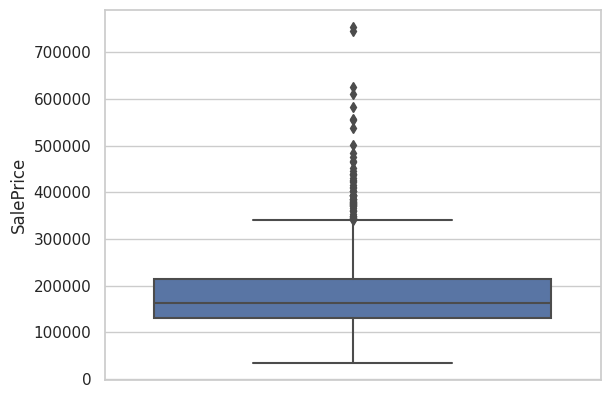

In [ ]:
# Visualizing saleprice distribution to compare with features
qr_s = train_df['SalePrice'].quantile(0.75) - train_df['SalePrice'].quantile(0.25)
up_s = train_df['SalePrice'].quantile(0.75) + qr_s*(1.5)
down_s = train_df['SalePrice'].quantile(0.25)-qr_s*(1.5)
print('Upper Limit',up_s)
sns.boxplot(data=train_df,y='SalePrice');

In [ ]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew 1.8828757597682129
kurtosis 6.536281860064529


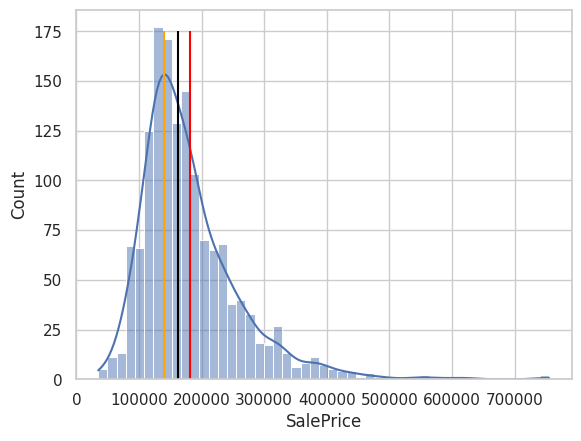

In [ ]:
print('Skew',train_df['SalePrice'].skew())
print('kurtosis',train_df['SalePrice'].kurt())
sns.histplot(train_df,x='SalePrice',kde = True)
plt.vlines(train_df['SalePrice'].mode(),0,175,color='Orange')
plt.vlines(train_df['SalePrice'].mean(),0,175,color='red')
plt.vlines(train_df['SalePrice'].median(),0,175,color='black');

* **Applying log will transform this in a normal curve(aproxi...)**

## float columns

In [ ]:
train_df.select_dtypes(include = float).describe()

LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
max     313.000000  1600.000000  2010.000000

In [ ]:
train_df[['LotFrontage','MasVnrArea','GarageYrBlt','SalePrice']].head(10)

LotFrontage  MasVnrArea  GarageYrBlt  SalePrice
0         65.0       196.0       2003.0     208500
1         80.0         0.0       1976.0     181500
2         68.0       162.0       2001.0     223500
3         60.0         0.0       1998.0     140000
4         84.0       350.0       2000.0     250000
5         85.0         0.0       1993.0     143000
6         75.0       186.0       2004.0     307000
7          NaN       240.0       1973.0     200000
8         51.0         0.0       1931.0     129900
9         50.0         0.0       1939.0     118000

* all the float columns looks good to put as a features on Ml

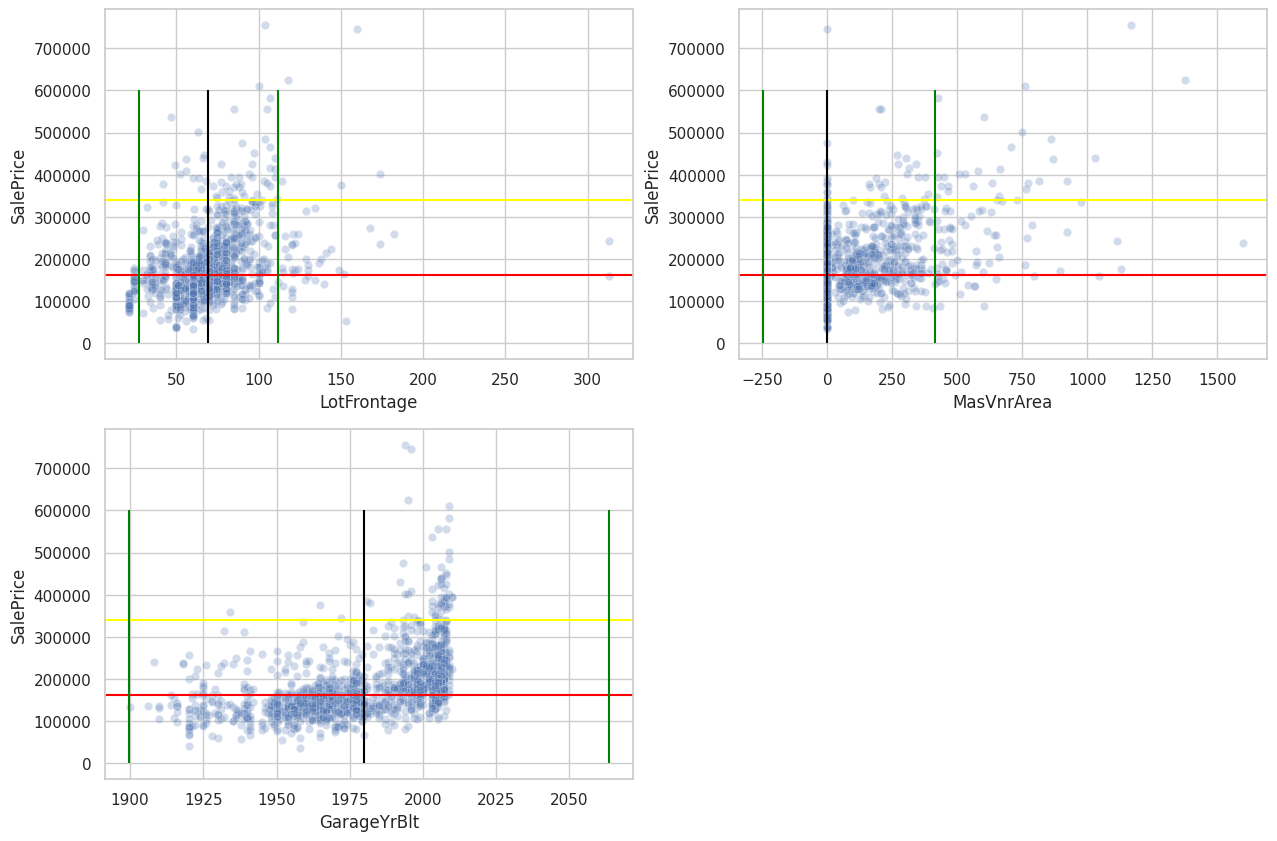

In [ ]:
#black vertical line: median feature value
#green verticals line: upper e lower limit feature value

#red horizontal line: median target value
#yellow vertical line: upper limit target value

float_columns = train_df.select_dtypes(include = float).columns
l = list(enumerate(float_columns))
plt.figure(figsize=(15,10))
for (i,j) in l:
    qr = train_df[j].quantile(0.75) - train_df[j].quantile(0.25)
    up = train_df[j].quantile(0.75) + qr*(1.5)
    down = train_df[j].quantile(0.25) - qr*(1.5)

    plt.subplot(2,2,i+1)
    sns.scatterplot(data=train_df,x=j,y='SalePrice',alpha =0.25)
    plt.axhline(train_df['SalePrice'].median(),0,500,color='red')
    plt.axhline(up_s,0,500,color='yellow')
    plt.vlines(train_df[j].median(),0,600000,color='black')
    plt.vlines(up,0,600000,color='green')
    plt.vlines(down,0,600000,color='green')

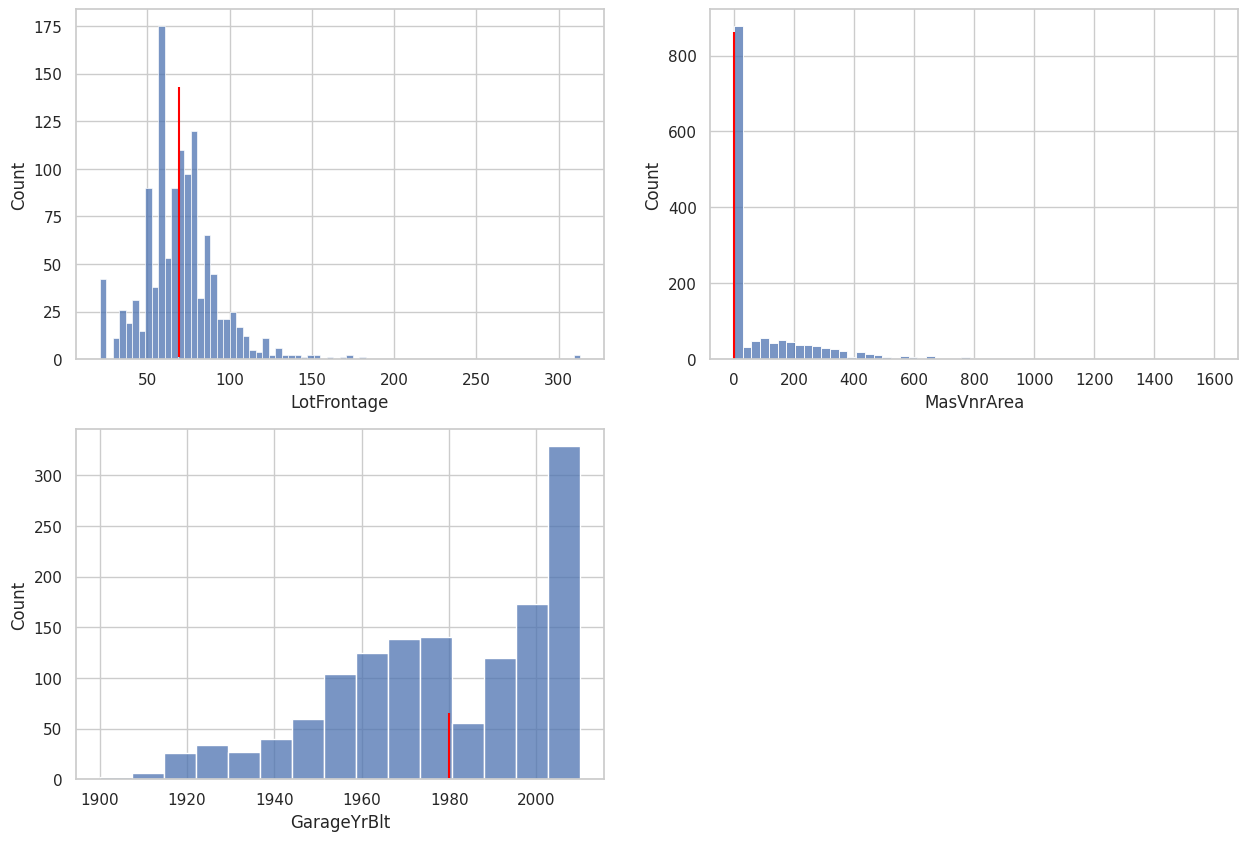

In [ ]:
#red line is median
plt.figure(figsize=(15,10))
for (i,j) in l:
    t = train_df[j].value_counts().tolist()
    plt.subplot(2,2,i+1)
    sns.histplot(data=train_df,x=j)
    plt.vlines(train_df[j].median(),t[-1],t[0],color = 'red')

## int columns

In [ ]:
train_df[train_df.select_dtypes(include=int).columns].head(10)

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   
5   6          50    14115            5            5       1993          1995   
6   7          20    10084            8            5       2004          2005   
7   8          60    10382            7            6       1973          1973   
8   9          50     6120            7            5       1931          1950   
9  10         190     7420            5            6       1939          1950   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   
5         732           0         64          796       796       566   
6        1369           0        317         1686      1694         0   
7         859          32        216         1107      1107       983   
8           0           0        952          952      1022       752   
9         851           0        140          991      1077         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   
5             0       1362             1             0         1         1   
6             0       1694             1             0         2         0   
7             0       2090             1             0         2         1   
8             0       1774             0             0         2         0   
9             0       1077             1             0         1         0   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   
5             1             1             5           0           2   
6             3             1             7           1           2   
7             3             1             7           2           2   
8             2             2             8           2           2   
9             2             2             5           2           1   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   
5         480          40           30              0        320            0   
6         636         255           57              0          0            0   
7         484     

In [ ]:
print(train_df.select_dtypes(include = int).shape)
train_df.select_dtypes(include = int).describe()

(1460, 35)


Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411   
std      30.202904     20.645407   456.098091   161.319273   441.866955   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000   223.000000   
50%    1973.000000   1994.000000   383.500000     0.000000   477.500000   
75%    2000.000000   2004.000000   712.250000     0.000000   808.000000   
max    2010.000000   2010.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       1.046575      6.517808     0.613014     1.767123   472.980137   
std        0.220338      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     1.000000   334.500000   
50%        1.000000      6.000000     1.000000     2.000000   480.000000   
75%        1.000000      7.000000     1.000000     2.000000   576.000000   
max        3.000000     14.000000     3.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.00

In [ ]:
#Int columns cardinality
int_columns = list(enumerate(train_df.select_dtypes(include = int).columns))
int_card = {}
for (i,j) in int_columns:
    if j!= 'Id':
        int_card[j] = train_df[j].nunique()
df_int_card = pd.DataFrame(data = int_card.values(),index=int_card.keys(),columns=['Cardinality'])

df_int_card.sort_values(by='Cardinality')


Cardinality
HalfBath                 3
BsmtHalfBath             3
FullBath                 4
Fireplaces               4
KitchenAbvGr             4
BsmtFullBath             4
GarageCars               5
YrSold                   5
PoolArea                 8
BedroomAbvGr             8
OverallCond              9
OverallQual             10
MoSold                  12
TotRmsAbvGrd            12
MSSubClass              15
3SsnPorch               20
MiscVal                 21
LowQualFinSF            24
YearRemodAdd            61
ScreenPorch             76
YearBuilt              112
EnclosedPorch          120
BsmtFinSF2             144
OpenPorchSF            202
WoodDeckSF             274
2ndFlrSF               417
GarageArea             441
BsmtFinSF1             637
SalePrice              663
TotalBsmtSF            721
1stFlrSF               753
BsmtUnfSF              780
GrLivArea              861
LotArea               1073

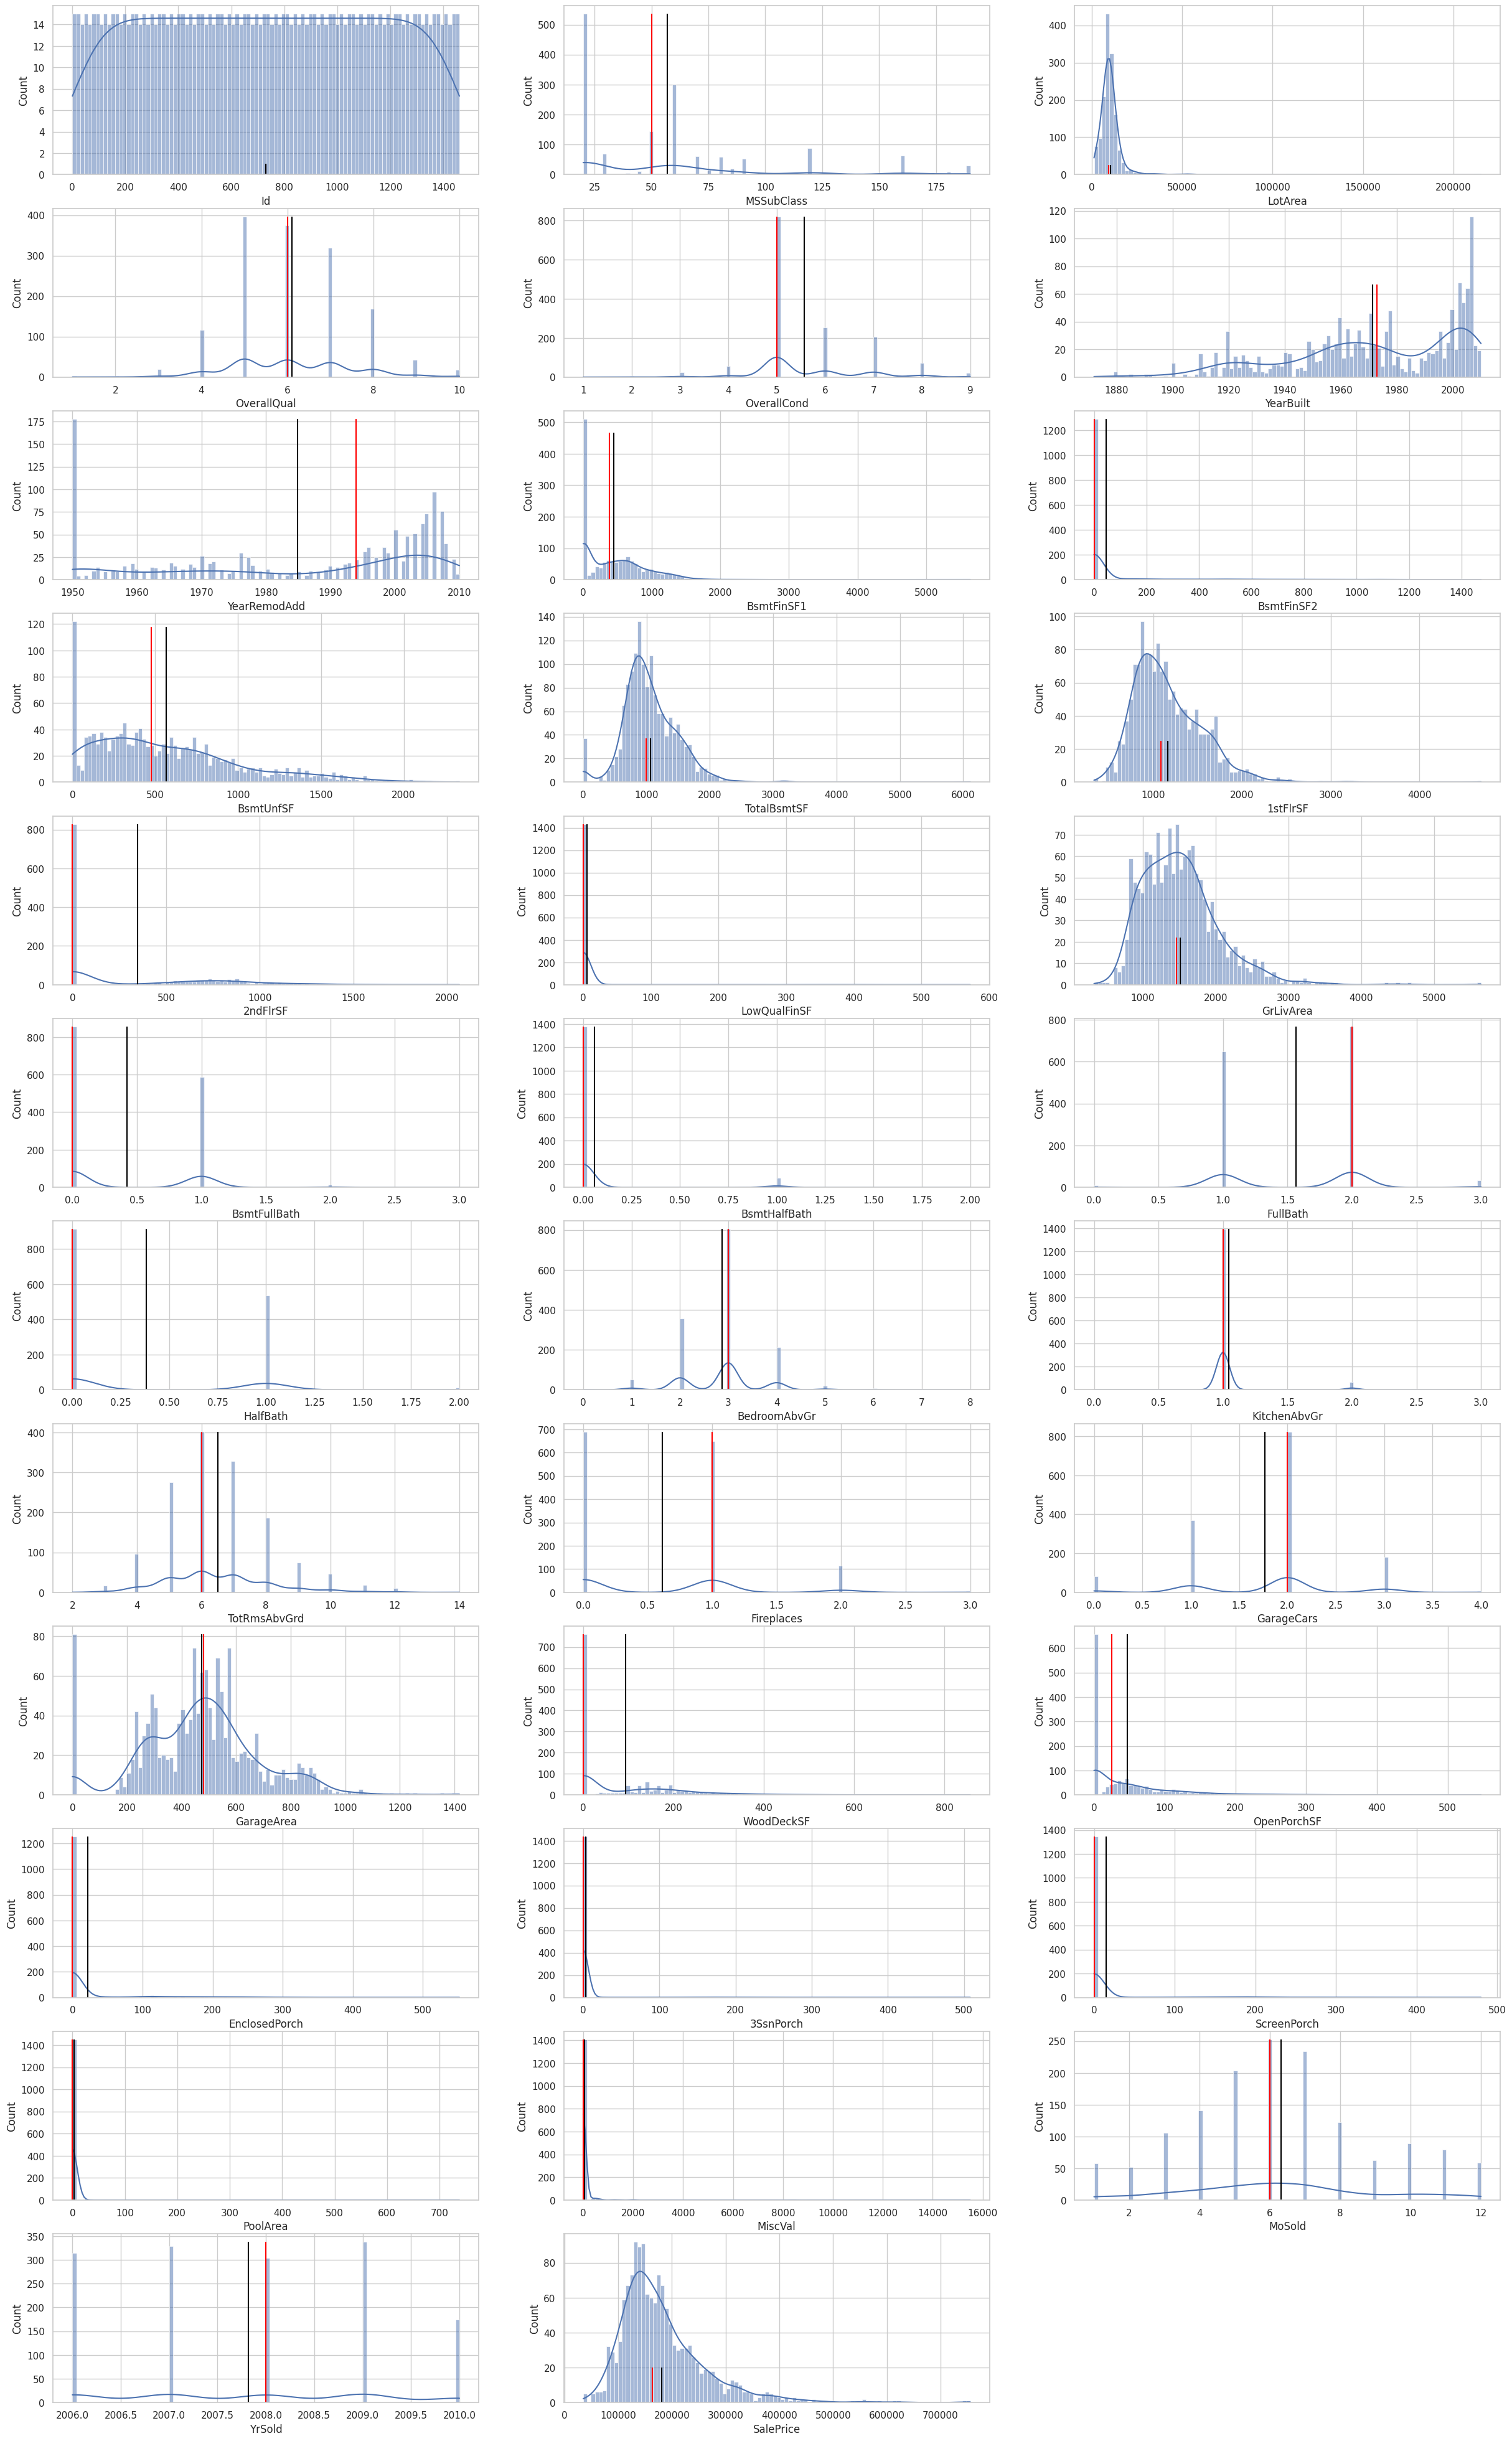

In [ ]:
#black vertical line is mean
#red vertical line is median
plt.figure(figsize=(30,50))
for (i,j) in int_columns:
    t = train_df[j].value_counts().tolist()
    plt.subplot(12,3,i+1)
    sns.histplot(data=train_df,x=j,kde=True,bins=100)
    plt.vlines(train_df[j].median(),0,t[0],color='red')
    plt.vlines(train_df[j].mean(),0,t[0],color='black')

In [ ]:
train_df.select_dtypes(include = int).describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411   
std      30.202904     20.645407   456.098091   161.319273   441.866955   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000   223.000000   
50%    1973.000000   1994.000000   383.500000     0.000000   477.500000   
75%    2000.000000   2004.000000   712.250000     0.000000   808.000000   
max    2010.000000   2010.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       1.046575      6.517808     0.613014     1.767123   472.980137   
std        0.220338      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     1.000000   334.500000   
50%        1.000000      6.000000     1.000000     2.000000   480.000000   
75%        1.000000      7.000000     1.000000     2.000000   576.000000   
max        3.000000     14.000000     3.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.00

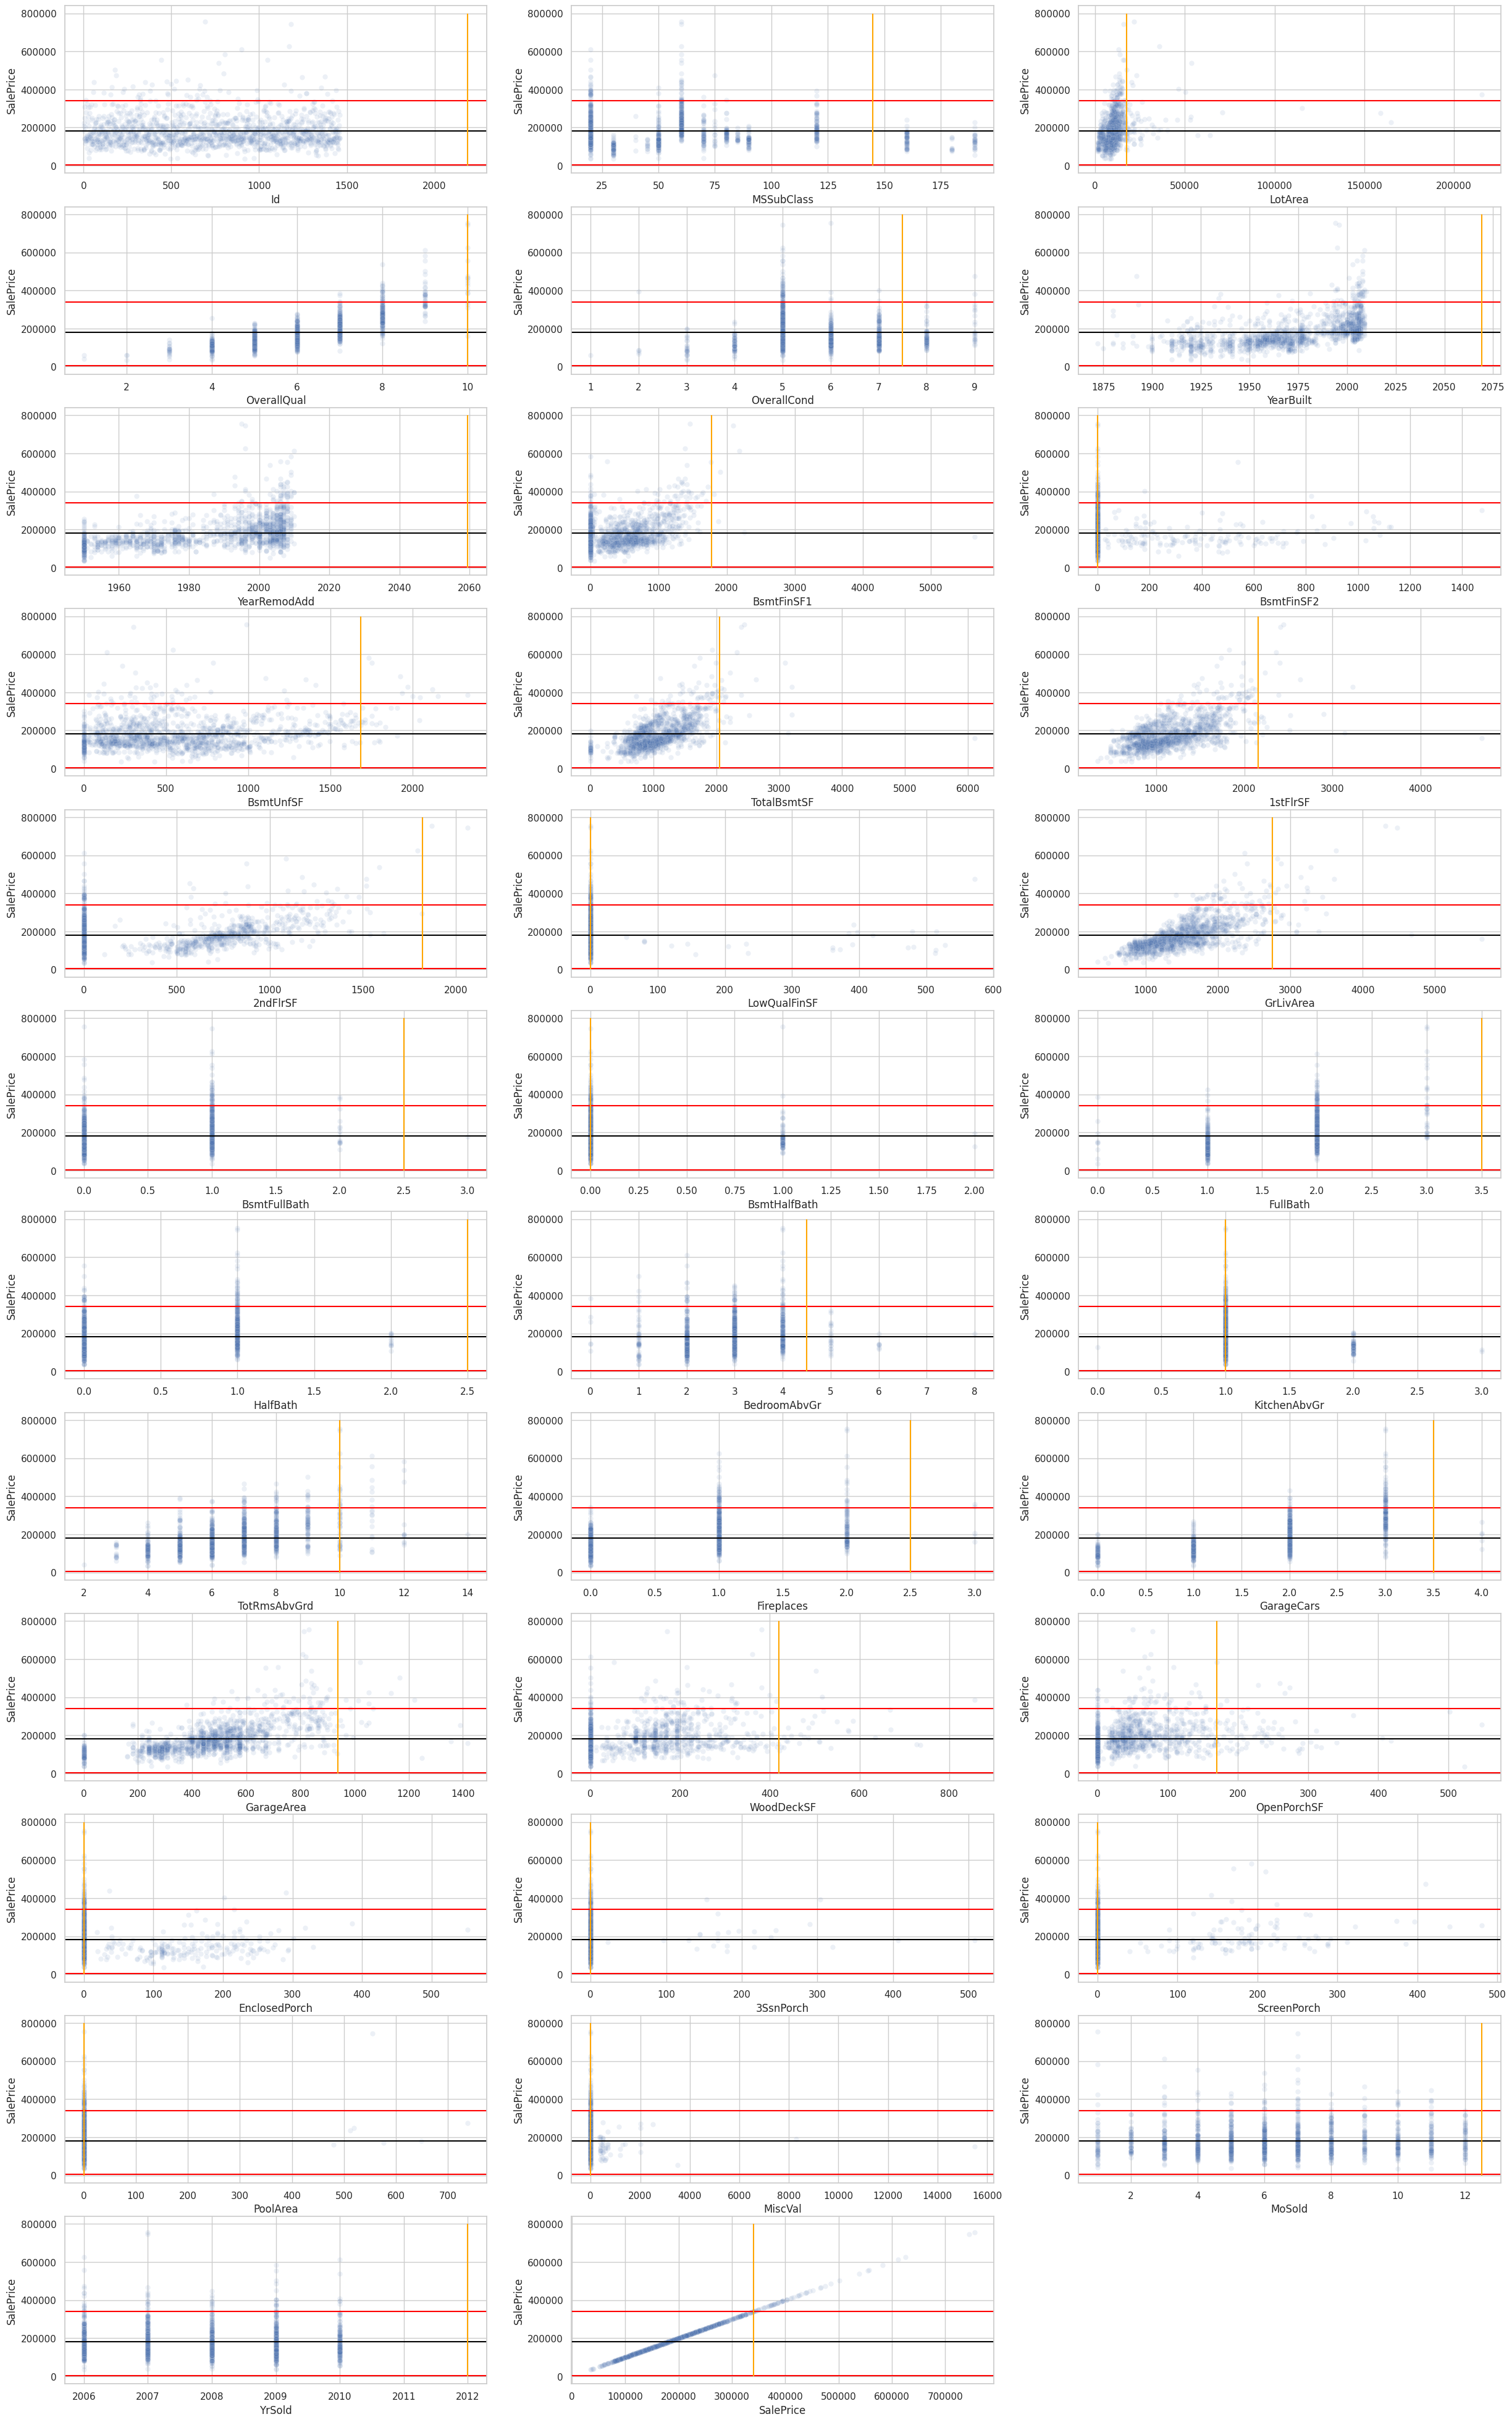

In [ ]:
#Red lines are de max and min values of SalePrices
#Black is this mean value of SalePrice
#To the right on the vertical orange lines we have outliers of each feature

QR = train_df['SalePrice'].quantile(0.75) - train_df['SalePrice'].quantile(0.25)
up = train_df['SalePrice'].quantile(0.75) + (1.5)*QR
down = train_df['SalePrice'].quantile(0.25) - (1.5)*QR

plt.figure(figsize=(30,50))
for (i,j) in int_columns:
    QR_j = train_df[j].quantile(0.75) - train_df[j].quantile(0.25)
    up_j =  train_df[j].quantile(0.75) + (1.5)*QR_j
    plt.subplot(12,3,i+1)
    sns.scatterplot(data=train_df,x=j,y='SalePrice',alpha=0.1)
    plt.axhline(train_df['SalePrice'].mean(),0,200,color='black')
    plt.axhline(up,0,200,color='red')
    plt.axhline(down,0,200,color='red')
    plt.vlines(up_j,0,800000,color = 'orange')

* BSMTFINSF2,LOWQUALFINSF,BSMHALFATH,KITCHENABVGR,ENCLOSEDPORCH,3SNPORCH,SCREEPORCH,POOLAREA and MISCVAL
don't look a good data. Don't have much information that algorithm of learn can utilize form these features.

* There have some quirks data on these features: BSMTFINSF2,LOWQUALFINSF,BSMHALFATH,KITCHENABVGR,ENCLOSEDPORCH,3SNPORCH,SCREEPORCH,POOLAREA,MISCVAL. Concentrate on value 0

## Object columns

In [ ]:
obj_columns = train_df.select_dtypes(include = object).columns
print(len(obj_columns))
train_df.select_dtypes(include = object).head()

43


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [ ]:
train_df[obj_columns].isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

A lot of these NAN'S has meaning.  We have to treat this before to analysis these data.

In [ ]:
#Cardinality of which column
card = {}
for i in obj_columns:
    card[i] = train_df[i].nunique()
df_card = pd.DataFrame(data =card.values(),index = card.keys(),columns = ['Cardinality'] )

df_card.sort_values(by='Cardinality',ascending=False)

Cardinality
Neighborhood            25
Exterior2nd             16
Exterior1st             15
SaleType                 9
Condition1               9
Condition2               8
HouseStyle               8
RoofMatl                 8
Functional               7
BsmtFinType2             6
Heating                  6
RoofStyle                6
SaleCondition            6
BsmtFinType1             6
GarageType               6
Foundation               6
Electrical               5
FireplaceQu              5
HeatingQC                5
GarageQual               5
GarageCond               5
MSZoning                 5
LotConfig                5
ExterCond                5
BldgType                 5
BsmtExposure             4
MiscFeature              4
Fence                    4
LotShape                 4
LandContour              4
BsmtCond                 4
KitchenQual              4
MasVnrType               4
ExterQual                4
BsmtQual                 4
LandSlope                3
GarageFinish             3
PavedDrive               3
PoolQC                   3
Utilities                2
CentralAir               2
Street                   2
Alley                    2

### replacing some NaNs

#### Alley

In [ ]:
print('Train:')
print(train_df['Alley'].value_counts())
print('-'*100)
print('Test:')
print(test_df['Alley'].value_counts())

Train:
Grvl    50
Pave    41
Name: Alley, dtype: int64
----------------------------------------------------------------------------------------------------
Test:
Grvl    70
Pave    37
Name: Alley, dtype: int64


In [ ]:
train_df['Alley'].replace({np.nan:'N AC'},inplace = True)
test_df['Alley'].replace({np.nan:'N AC'},inplace = True)

In [ ]:
print('Train:')
print(train_df['Alley'].value_counts())
print('-'*100)
print('Test:')
print(test_df['Alley'].value_counts())

Train:
N AC    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
----------------------------------------------------------------------------------------------------
Test:
N AC    1352
Grvl      70
Pave      37
Name: Alley, dtype: int64


#### PoolQC

In [ ]:
print('Train:',train_df['PoolQC'].unique())
print('Test:',test_df['PoolQC'].unique())
print('-'*100)
print('Train:','\n',train_df['PoolQC'].value_counts())
print('-'*100)
print('Test:','\n',test_df['PoolQC'].value_counts())

Train: [nan 'Ex' 'Fa' 'Gd']
Test: [nan 'Ex' 'Gd']
----------------------------------------------------------------------------------------------------
Train: 
 Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
----------------------------------------------------------------------------------------------------
Test: 
 Ex    2
Gd    1
Name: PoolQC, dtype: int64


In [ ]:
train_df['PoolQC'].replace({np.nan:'NP'},inplace = True)
test_df['PoolQC'].replace({np.nan:'NP'},inplace = True)

In [ ]:
print('Train:')
print(train_df['PoolQC'].value_counts())
print('-'*100)
print(test_df['PoolQC'].value_counts())

Train:
NP    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64
----------------------------------------------------------------------------------------------------
NP    1456
Ex       2
Gd       1
Name: PoolQC, dtype: int64


####Fence

In [ ]:
print('Train:',train_df['Fence'].unique())
print('Test:',test_df['Fence'].unique())
print('-'*100)
print('Train:','\n',train_df['Fence'].value_counts())
print('-'*100)
print('Test:','\n',test_df['Fence'].value_counts())

Train: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Test: ['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']
----------------------------------------------------------------------------------------------------
Train: 
 MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
----------------------------------------------------------------------------------------------------
Test: 
 MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64


In [ ]:
train_df['Fence'].replace({np.nan:'NF'},inplace = True)
test_df['Fence'].replace({np.nan:'NF'},inplace = True)

In [ ]:
print('Train:')
print(train_df['Fence'].value_counts())
print('-'*100)
print('Test:')
print(test_df['Fence'].value_counts())

Train:
NF       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
----------------------------------------------------------------------------------------------------
Test:
NF       1169
MnPrv     172
GdPrv      59
GdWo       58
MnWw        1
Name: Fence, dtype: int64


#### MiscFeature

In [ ]:
print('Train:',train_df['MiscFeature'].unique())
print('Test:',test_df['MiscFeature'].unique())
print('-'*100)
print('Train:','\n',train_df['MiscFeature'].value_counts())
print('-'*100)
print('Test:','\n',test_df['MiscFeature'].value_counts())

Train: [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Test: [nan 'Gar2' 'Shed' 'Othr']
----------------------------------------------------------------------------------------------------
Train: 
 Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
----------------------------------------------------------------------------------------------------
Test: 
 Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64


In [ ]:
train_df['MiscFeature'].replace({np.nan:'None'},inplace=True)
test_df['MiscFeature'].replace({np.nan:'None'},inplace=True)

In [ ]:
print('Train:')
print(train_df['MiscFeature'].value_counts())
print('-'*100)
print('Test:')
print(test_df['MiscFeature'].value_counts())

Train:
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64
----------------------------------------------------------------------------------------------------
Test:
None    1408
Shed      46
Gar2       3
Othr       2
Name: MiscFeature, dtype: int64


####FireplaceQu

In [ ]:
print('Train:',train_df['FireplaceQu'].unique())
print('Test:',test_df['FireplaceQu'].unique())
print('-'*100)
print('Train:','\n',train_df['FireplaceQu'].value_counts())
print('-'*100)
print('Test:','\n',test_df['FireplaceQu'].value_counts())

Train: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Test: [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']
----------------------------------------------------------------------------------------------------
Train: 
 Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
----------------------------------------------------------------------------------------------------
Test: 
 Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64


In [ ]:
train_df['FireplaceQu'].replace({np.nan:'NF'},inplace=True)
test_df['FireplaceQu'].replace({np.nan:'NF'},inplace=True)

In [ ]:
print('Train:')
print(train_df['FireplaceQu'].value_counts())
print('-'*100)
print('Test:')
print(test_df['FireplaceQu'].value_counts())

Train:
NF    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
----------------------------------------------------------------------------------------------------
Test:
NF    730
Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64


####GarageType,GarageFinish,GarageQual and GarageCond

In [ ]:
l = ['GarageType','GarageCond','GarageQual','GarageFinish']
for i in l:
    train_df[i].replace({np.nan:'NG'},inplace = True)
    test_df[i].replace({np.nan:'NG'},inplace = True)

In [ ]:
print('Train:')
print(train_df[l].isna().sum())
print('-'*100)
print('Test:')
print(test_df[l].isna().sum())

Train:
GarageType      0
GarageCond      0
GarageQual      0
GarageFinish    0
dtype: int64
----------------------------------------------------------------------------------------------------
Test:
GarageType      0
GarageCond      0
GarageQual      0
GarageFinish    0
dtype: int64


####BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtQual and BsmtCond columns

In [ ]:
l = ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtQual','BsmtCond']
for i in l:
    train_df[i].replace({np.nan:'NB'},inplace = True)
    test_df[i].replace({np.nan:'NB'},inplace = True)

In [ ]:
print('Train:')
print(train_df[l].isna().sum())
print('-'*100)
print('Test:')
print(test_df[l].isna().sum())

Train:
BsmtFinType2    0
BsmtExposure    0
BsmtFinType1    0
BsmtQual        0
BsmtCond        0
dtype: int64
----------------------------------------------------------------------------------------------------
Test:
BsmtFinType2    0
BsmtExposure    0
BsmtFinType1    0
BsmtQual        0
BsmtCond        0
dtype: int64


### Object Columns Cardinality

In [ ]:
#Placing information about cardinality in lists. This will help to create some graphics separetely
high_card =[]
med_card = []
low_card = []
for i in obj_columns:
    if train_df[i].nunique()>10:
        high_card.append(i)
    elif (train_df[i].nunique()<=10) & (train_df[i].nunique()>5):
        med_card.append(i)
    elif train_df[i].nunique()<=5:
        low_card.append(i)

In [ ]:
print('High Cardinality:',high_card)
print(len(high_card))
print('medium Cardinality:',med_card)
print(len(med_card))
print('low Cardinality:',low_card)
print(len(low_card))

High Cardinality: ['Neighborhood', 'Exterior1st', 'Exterior2nd']
3
medium Cardinality: ['Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Functional', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition']
16
low Cardinality: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageFinish', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature']
24


#### High Cardinality

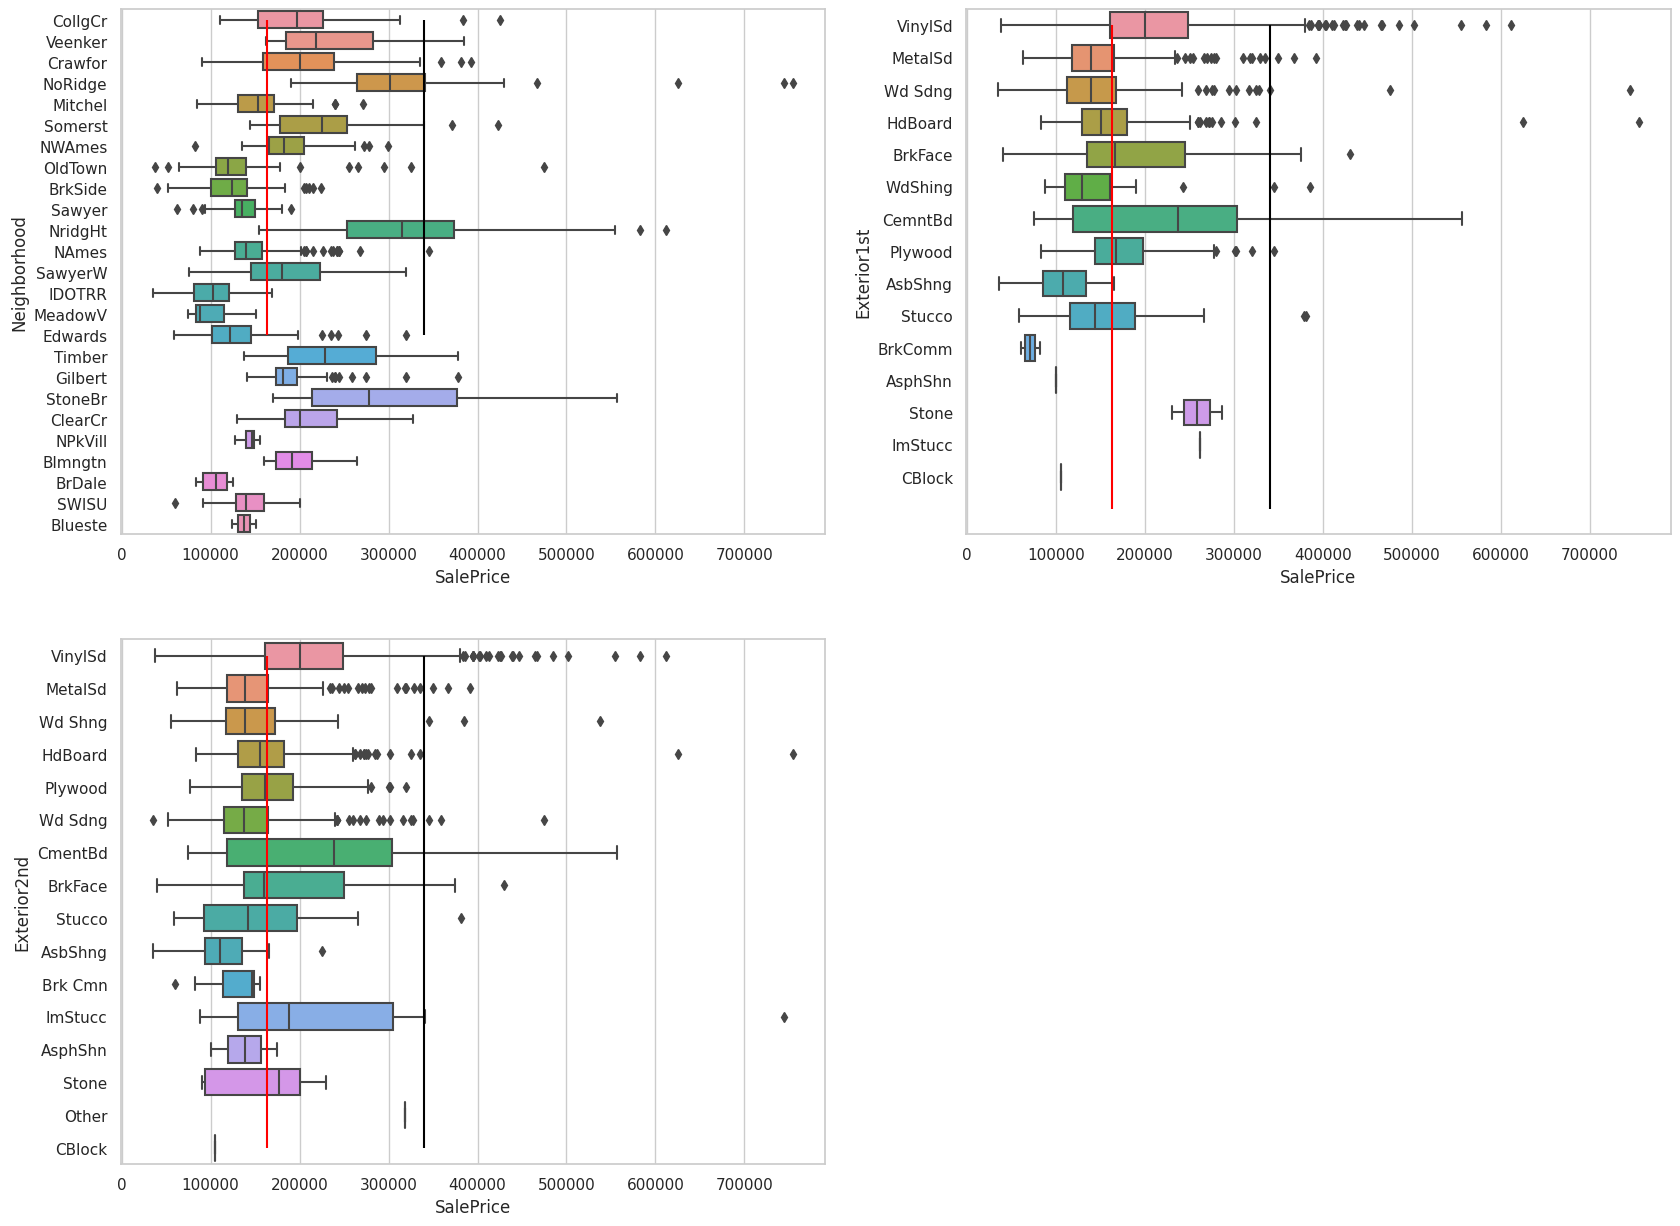

In [ ]:
#high cardinality(>10) categorical graphics
#black vertical line is a upper limit saleprice values
#redline is the average value of the colum saleprice
qr = train_df['SalePrice'].quantile(0.75)-train_df['SalePrice'].quantile(0.25)
up = train_df['SalePrice'].quantile(0.75)+(1.5)*qr

l = list(enumerate(high_card))
plt.figure(figsize=(20,15))
for (i,j) in l :
    plt.subplot(2,2,i+1)
    sns.boxplot(data=train_df,y=j,x='SalePrice')
    plt.vlines(train_df['SalePrice'].median(),0,15,color='red')
    plt.vlines(up,0,15,color='black')

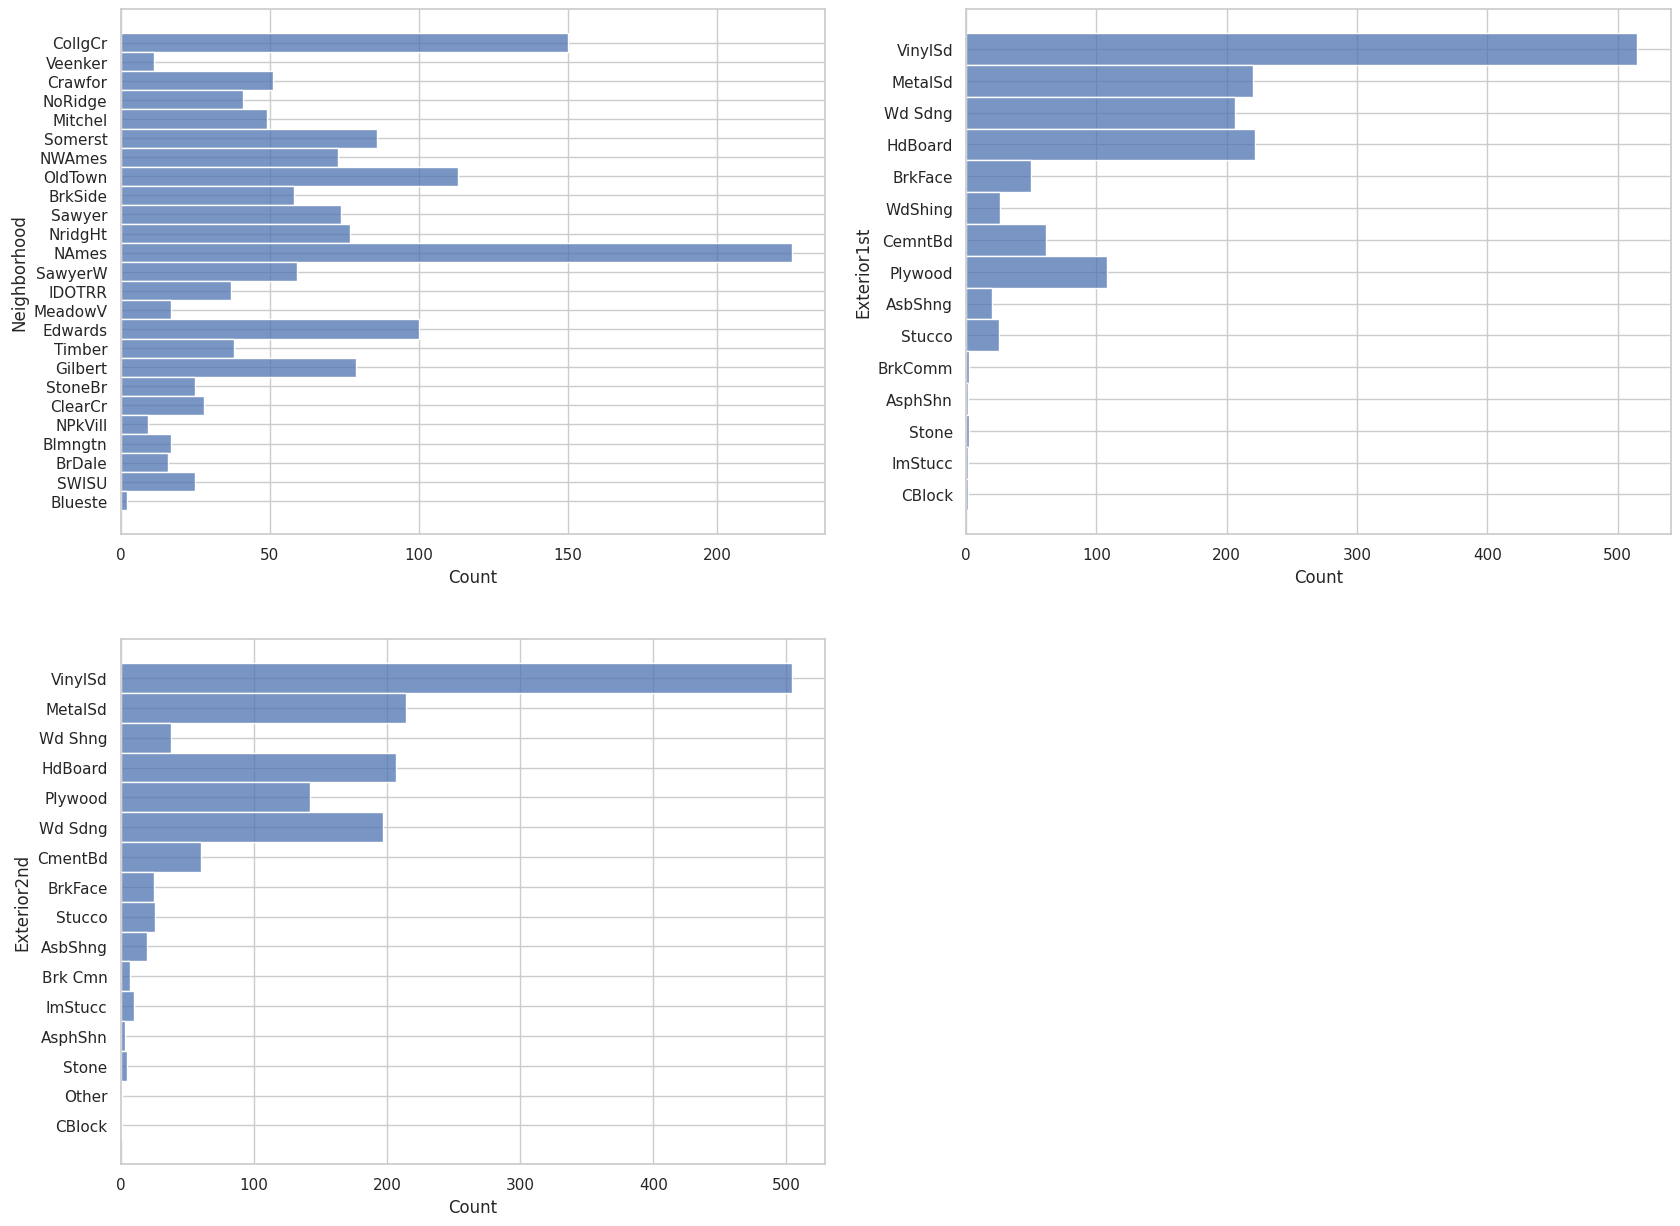

In [ ]:
l = list(enumerate(high_card))
plt.figure(figsize=(20,15))
for (i,j) in l :
    plt.subplot(2,2,i+1)
    sns.histplot(data=train_df,y=j)

* Outliers these three columns coincide with SalePrice outliers.
* There is a lot information that ML could learn. We have to make a ordinal enconded in these columns

* Each category on these columns has a different range price. We conclude this will help to a ML understanding what kind value these categories has to be.

* these columns has a good categories amount of values distribution.

#### Medium Cardinality

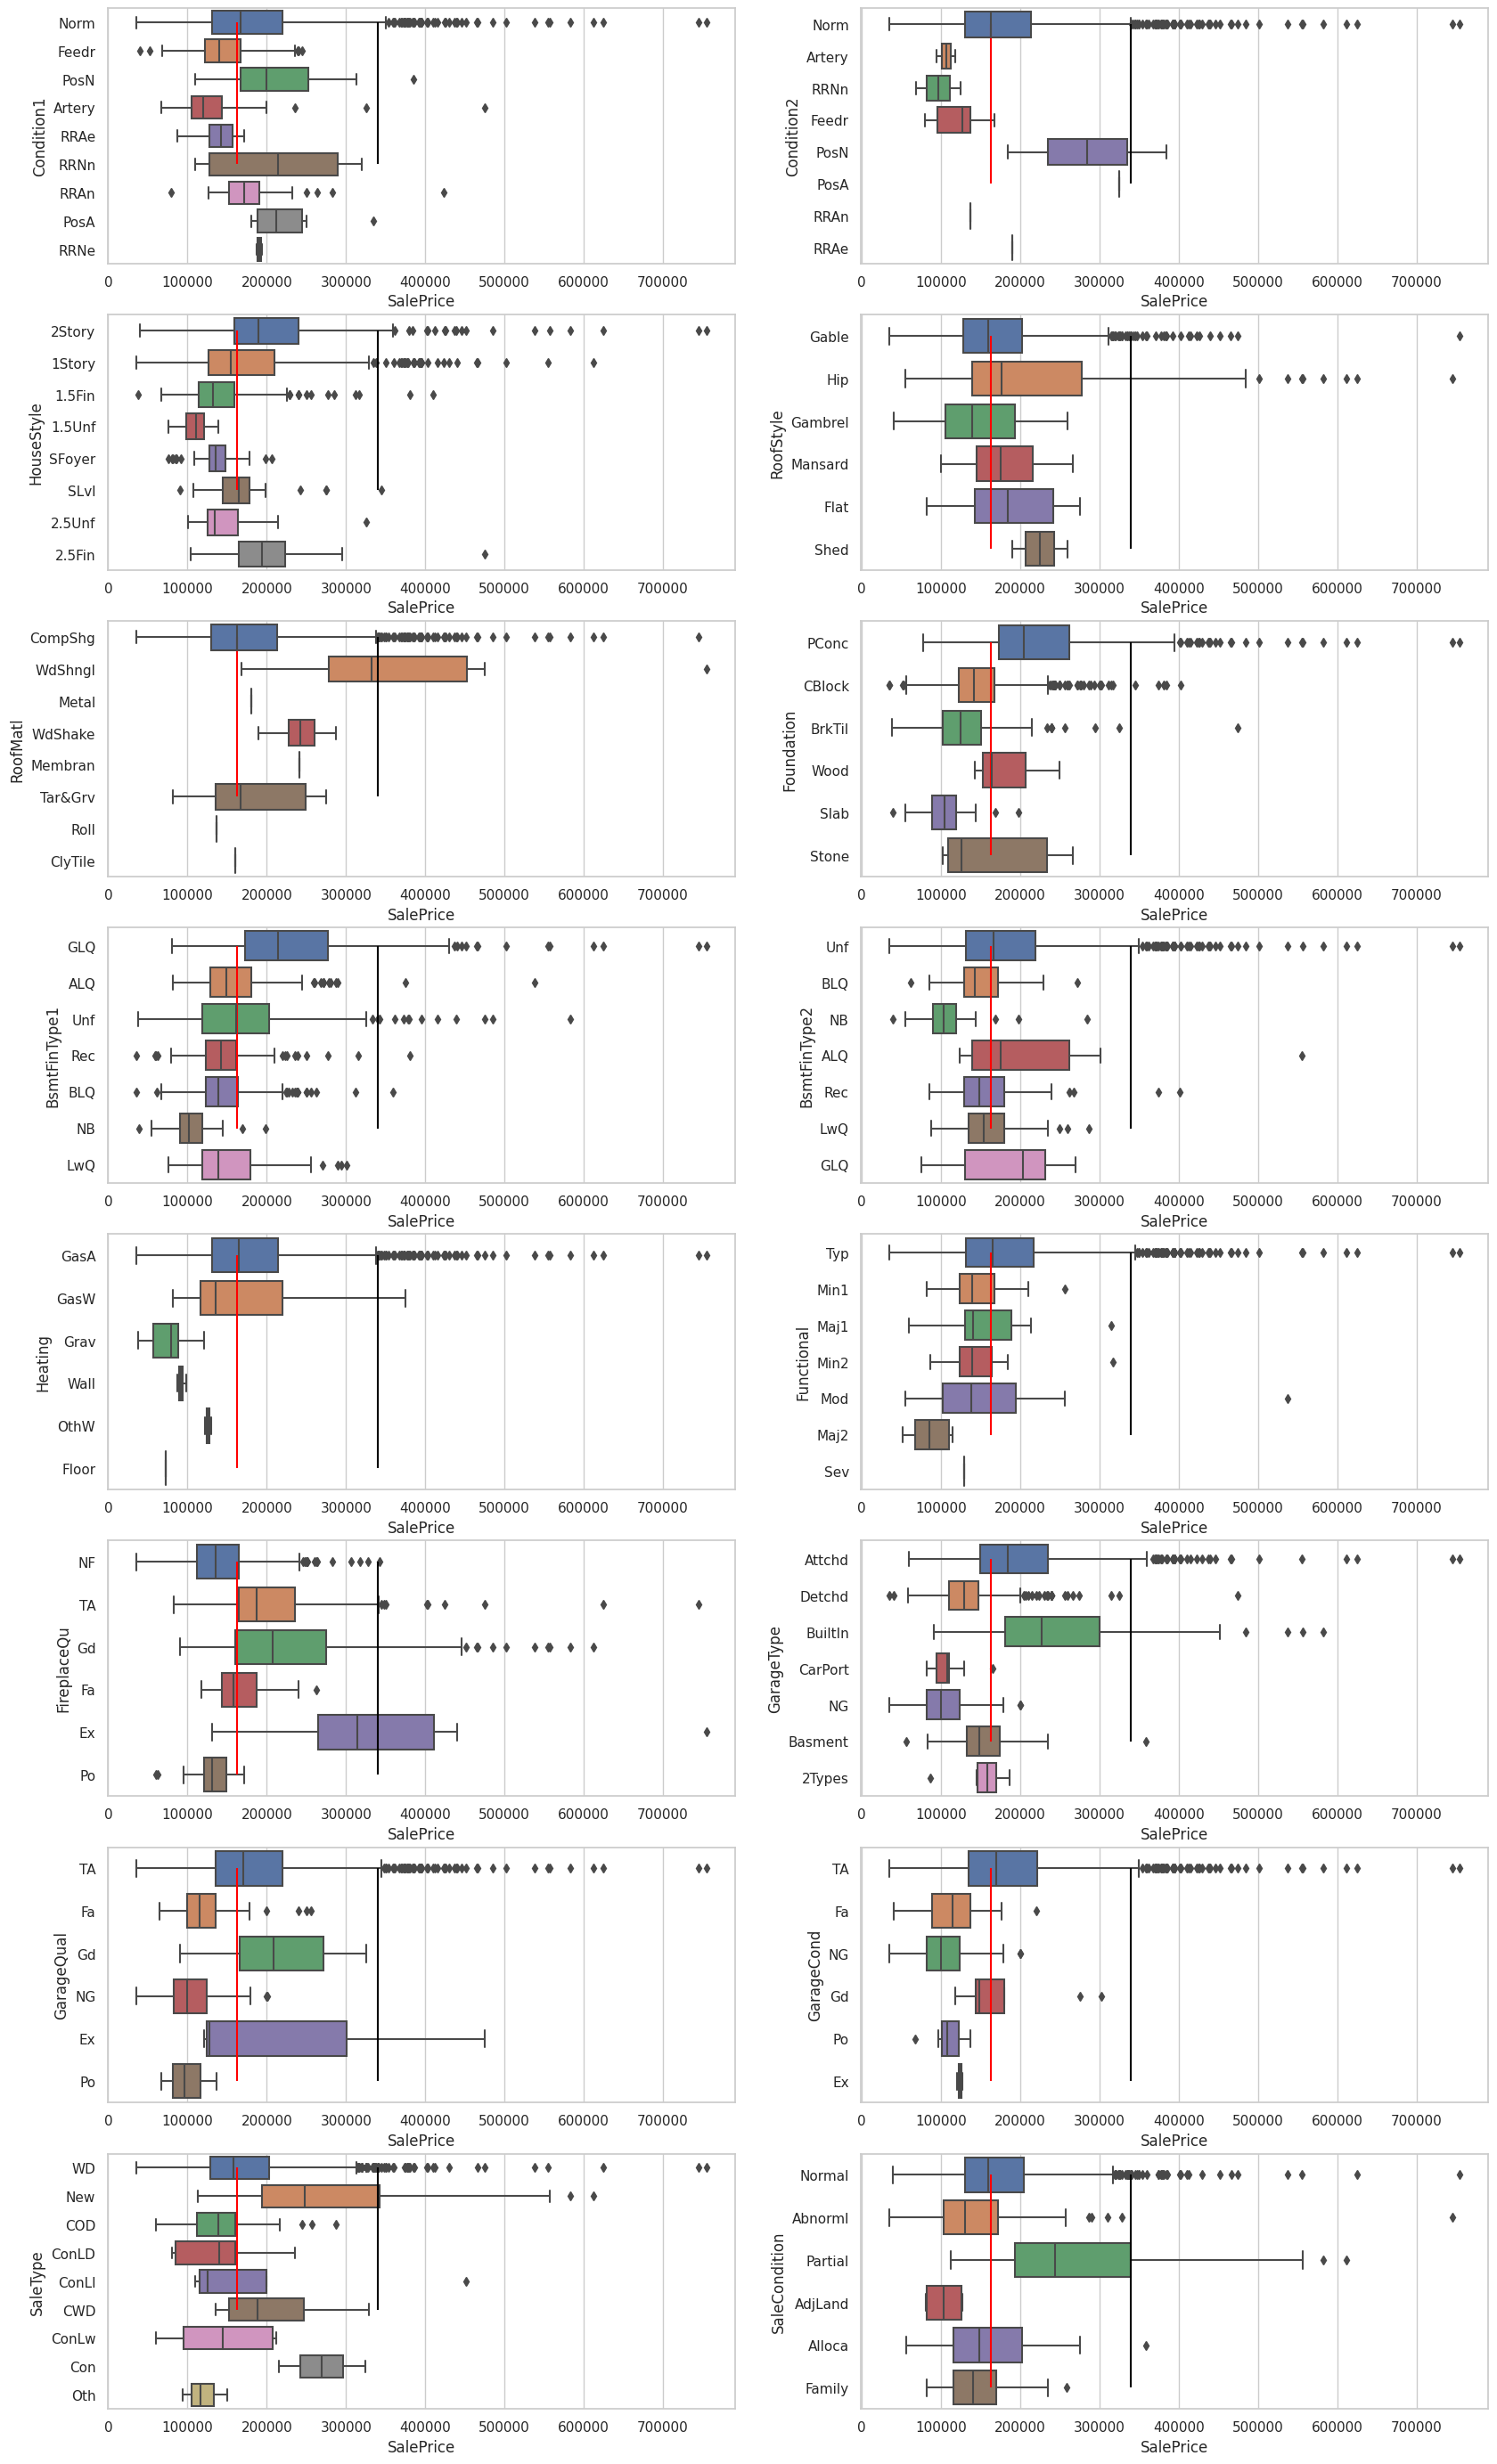

In [ ]:
#Graphics with medium cardinality

qr = train_df['SalePrice'].quantile(0.75)-train_df['SalePrice'].quantile(0.25)
up = train_df['SalePrice'].quantile(0.75)+(1.5)*qr

l = list(enumerate(med_card))
plt.figure(figsize=(20,35))
for (i,j) in l :
    plt.subplot(8,2,i+1)
    sns.boxplot(data=train_df,y=j,x='SalePrice')
    plt.vlines(train_df['SalePrice'].median(),0,5,color='red')
    plt.vlines(up,0,5,color='black')

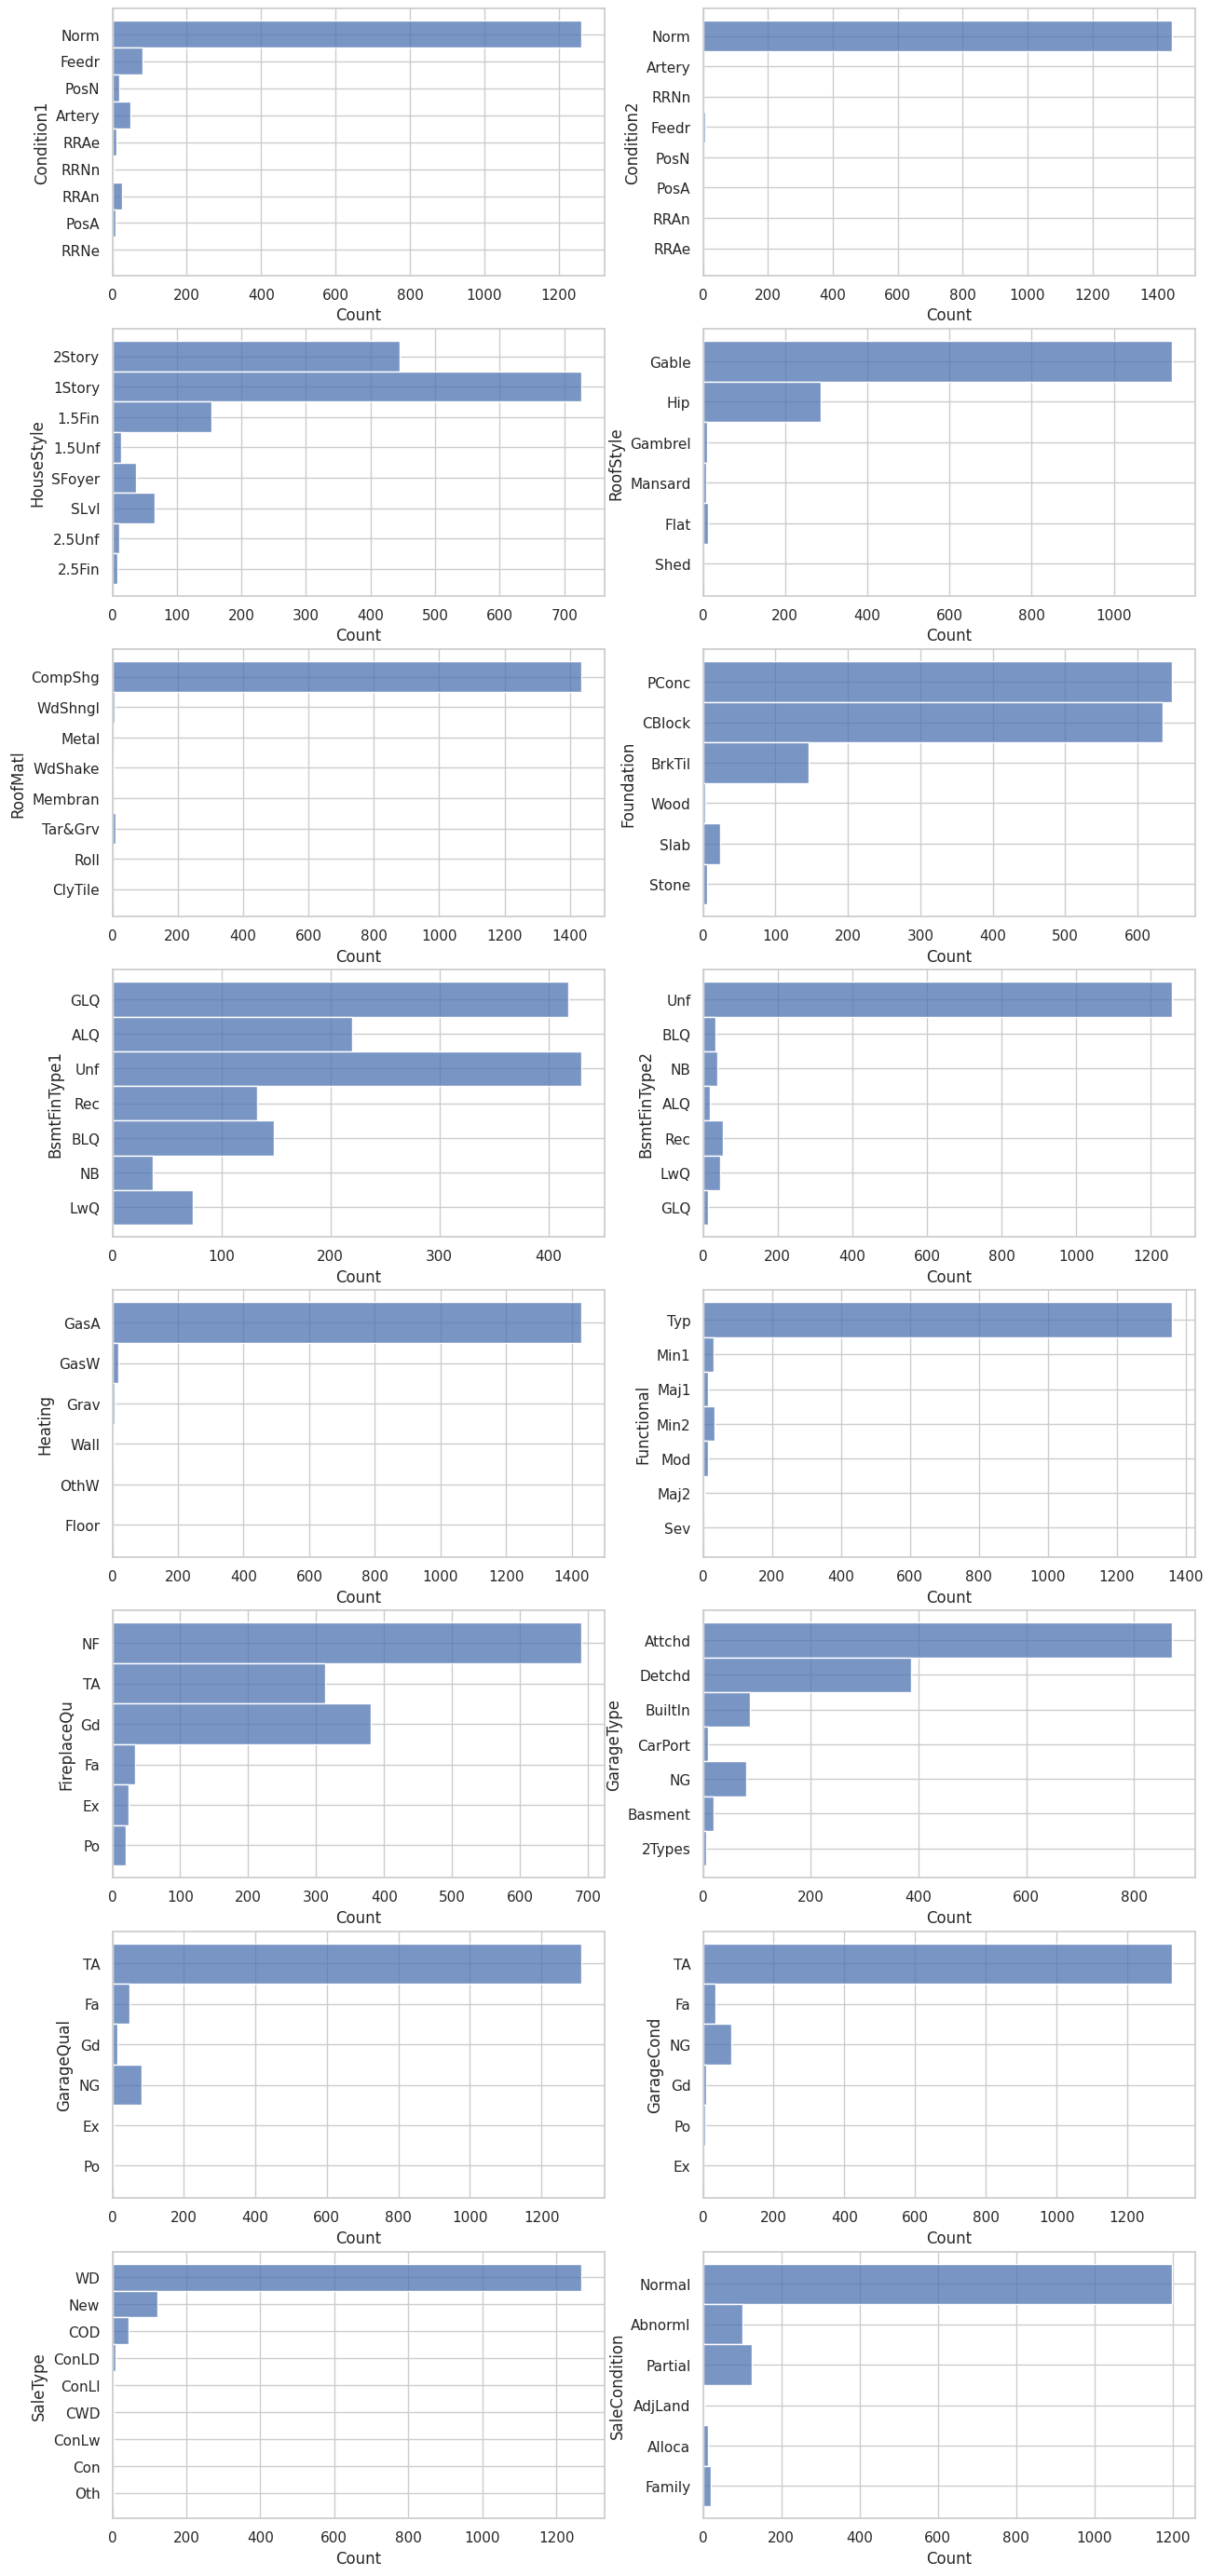

In [ ]:
l = list(enumerate(med_card))
plt.figure(figsize=(15,35))
for (i,j) in l :
    plt.subplot(8,2,i+1)
    sns.histplot(data=train_df,y=j)

* most of SalePrice outliers are coincident with outliers these categorical columns
* condition1,housestyle,roofstyle,bsmtfintype1,bsmtfintype2,functional and saletype has categories with almost same range saleprice value
* Condition1,condition2,roofstyle,roofMatl,bsmtfintype2,heating,functional,saletype and salecondition has a high concentration observation on one or two categories.

#### Low Cardinality

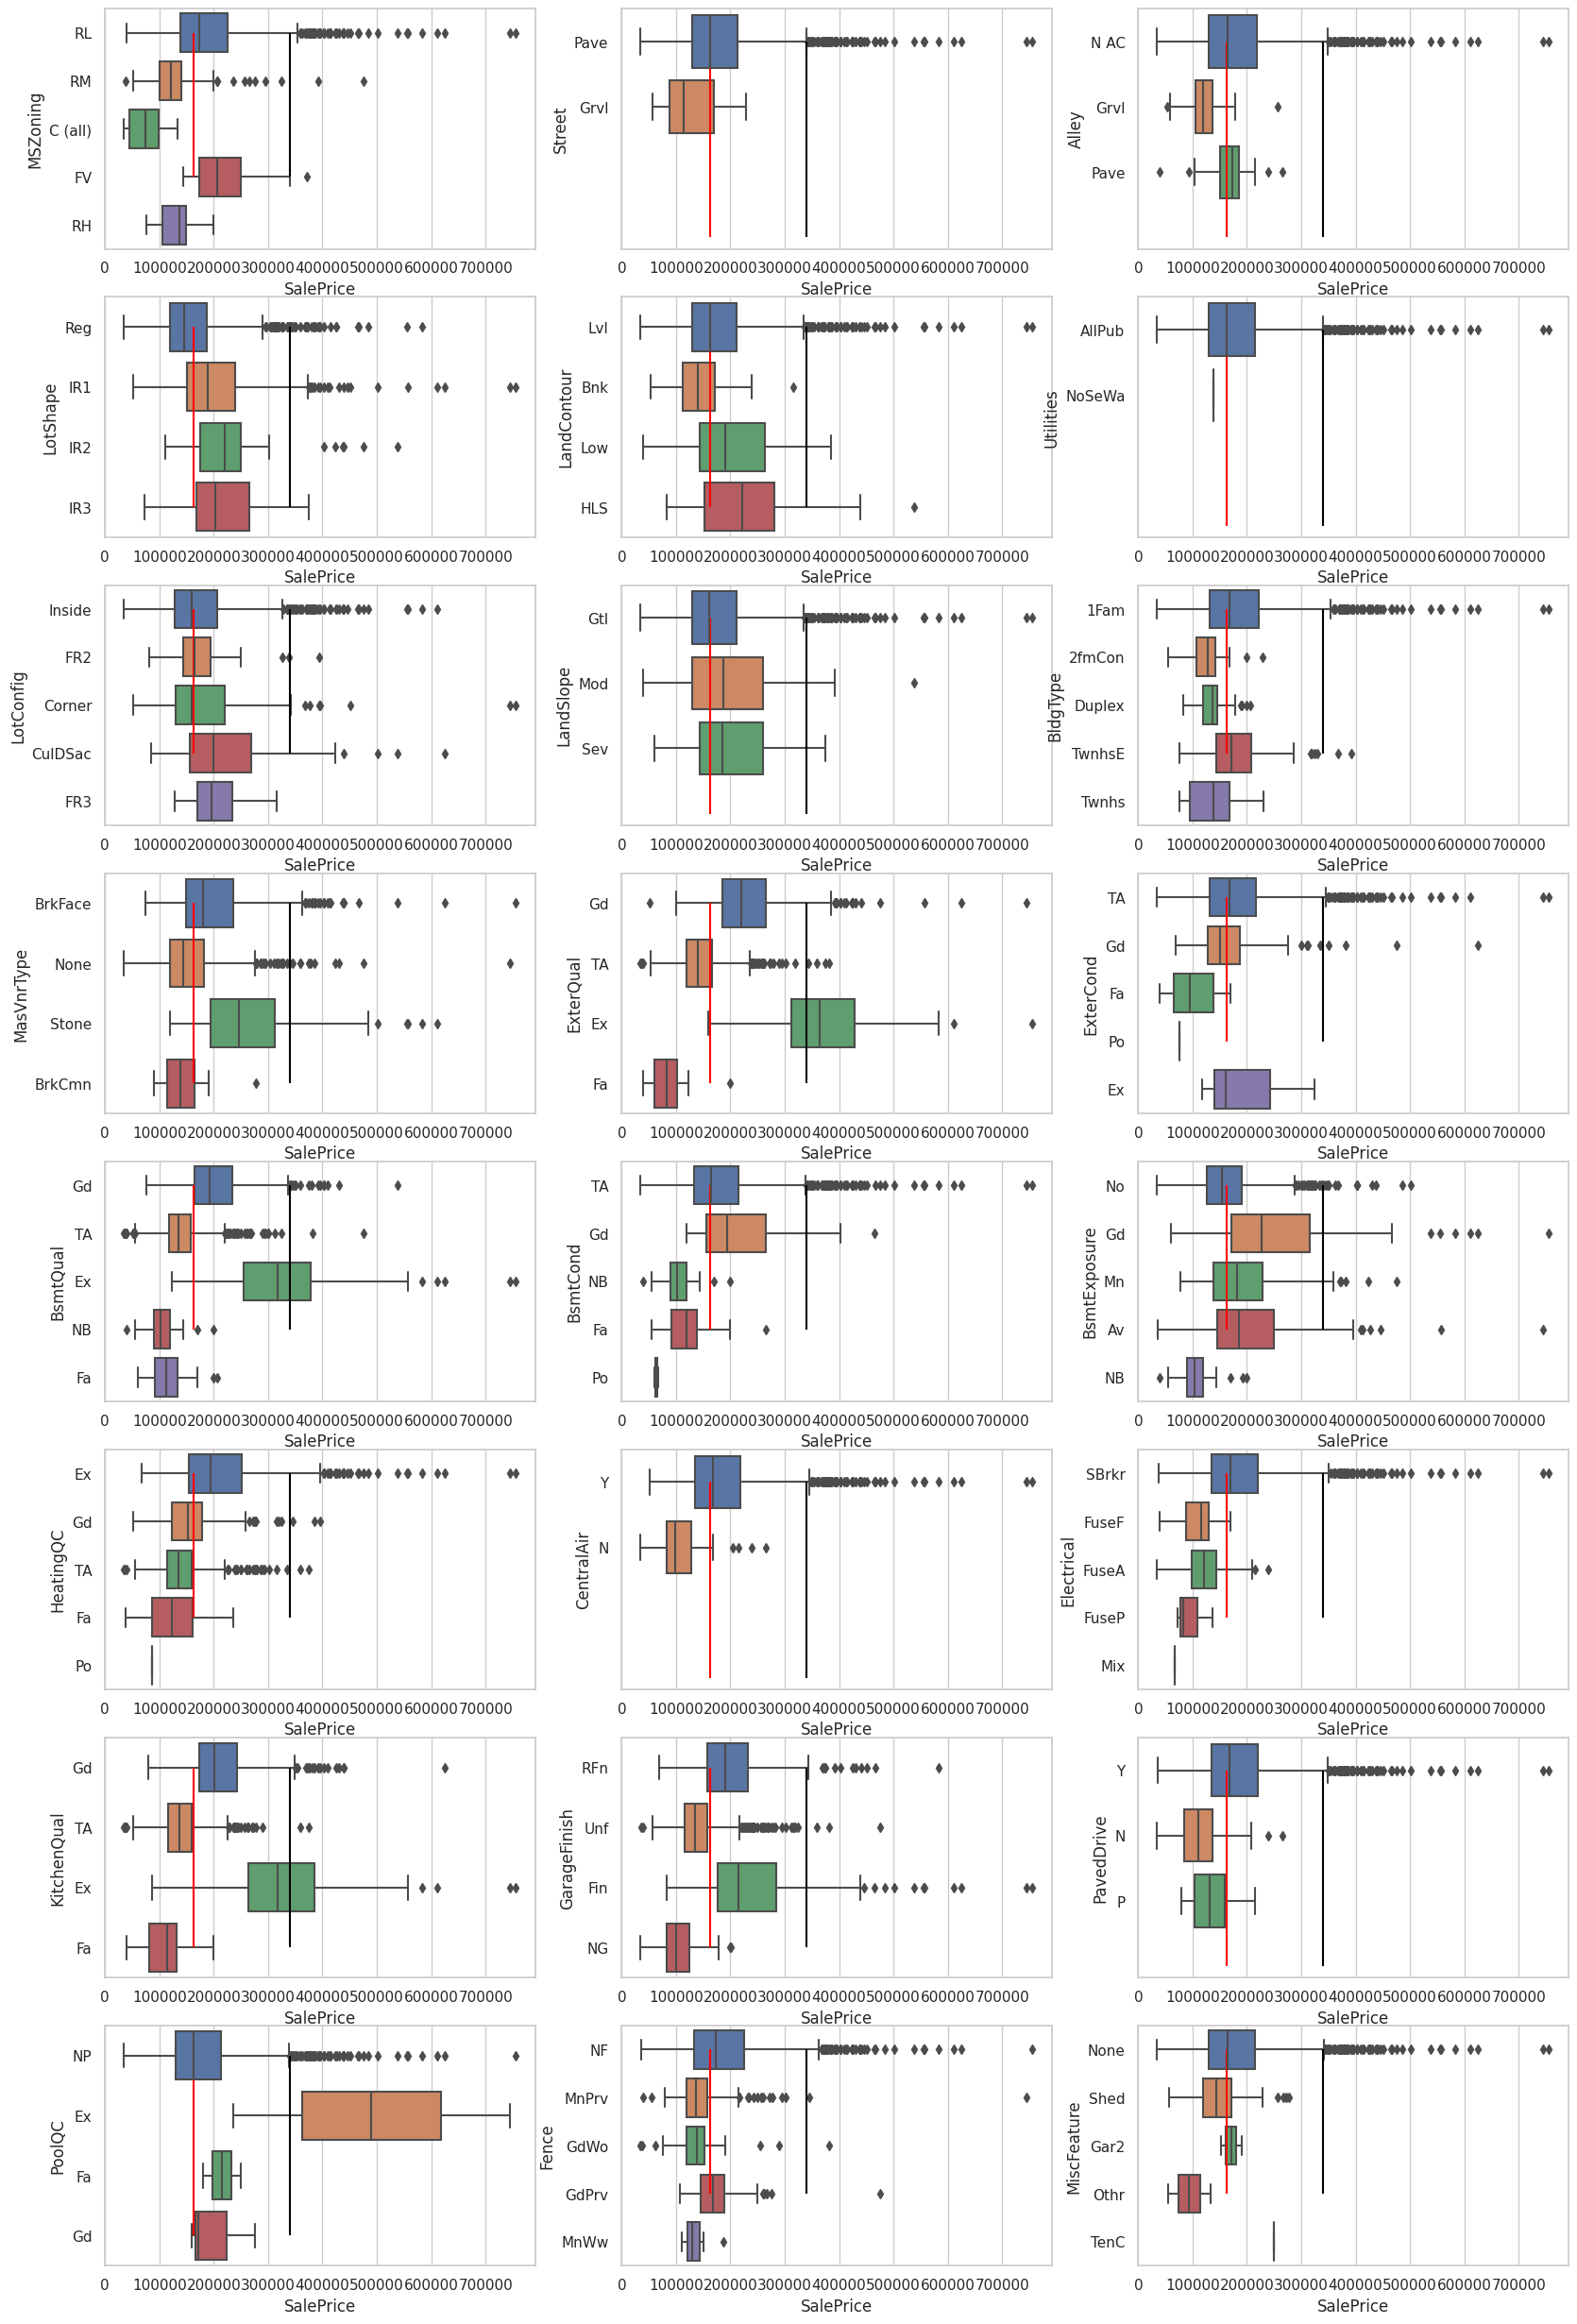

In [ ]:
qr = train_df['SalePrice'].quantile(0.75)-train_df['SalePrice'].quantile(0.25)
up = train_df['SalePrice'].quantile(0.75)+(1.5)*qr

l = list(enumerate(low_card))
plt.figure(figsize=(20,35))
for (i,j) in l :
    plt.subplot(9,3,i+1)
    sns.boxplot(data=train_df,y=j,x='SalePrice')
    plt.vlines(train_df['SalePrice'].median(),0,3,color='red')
    plt.vlines(up,0,3,color='black')

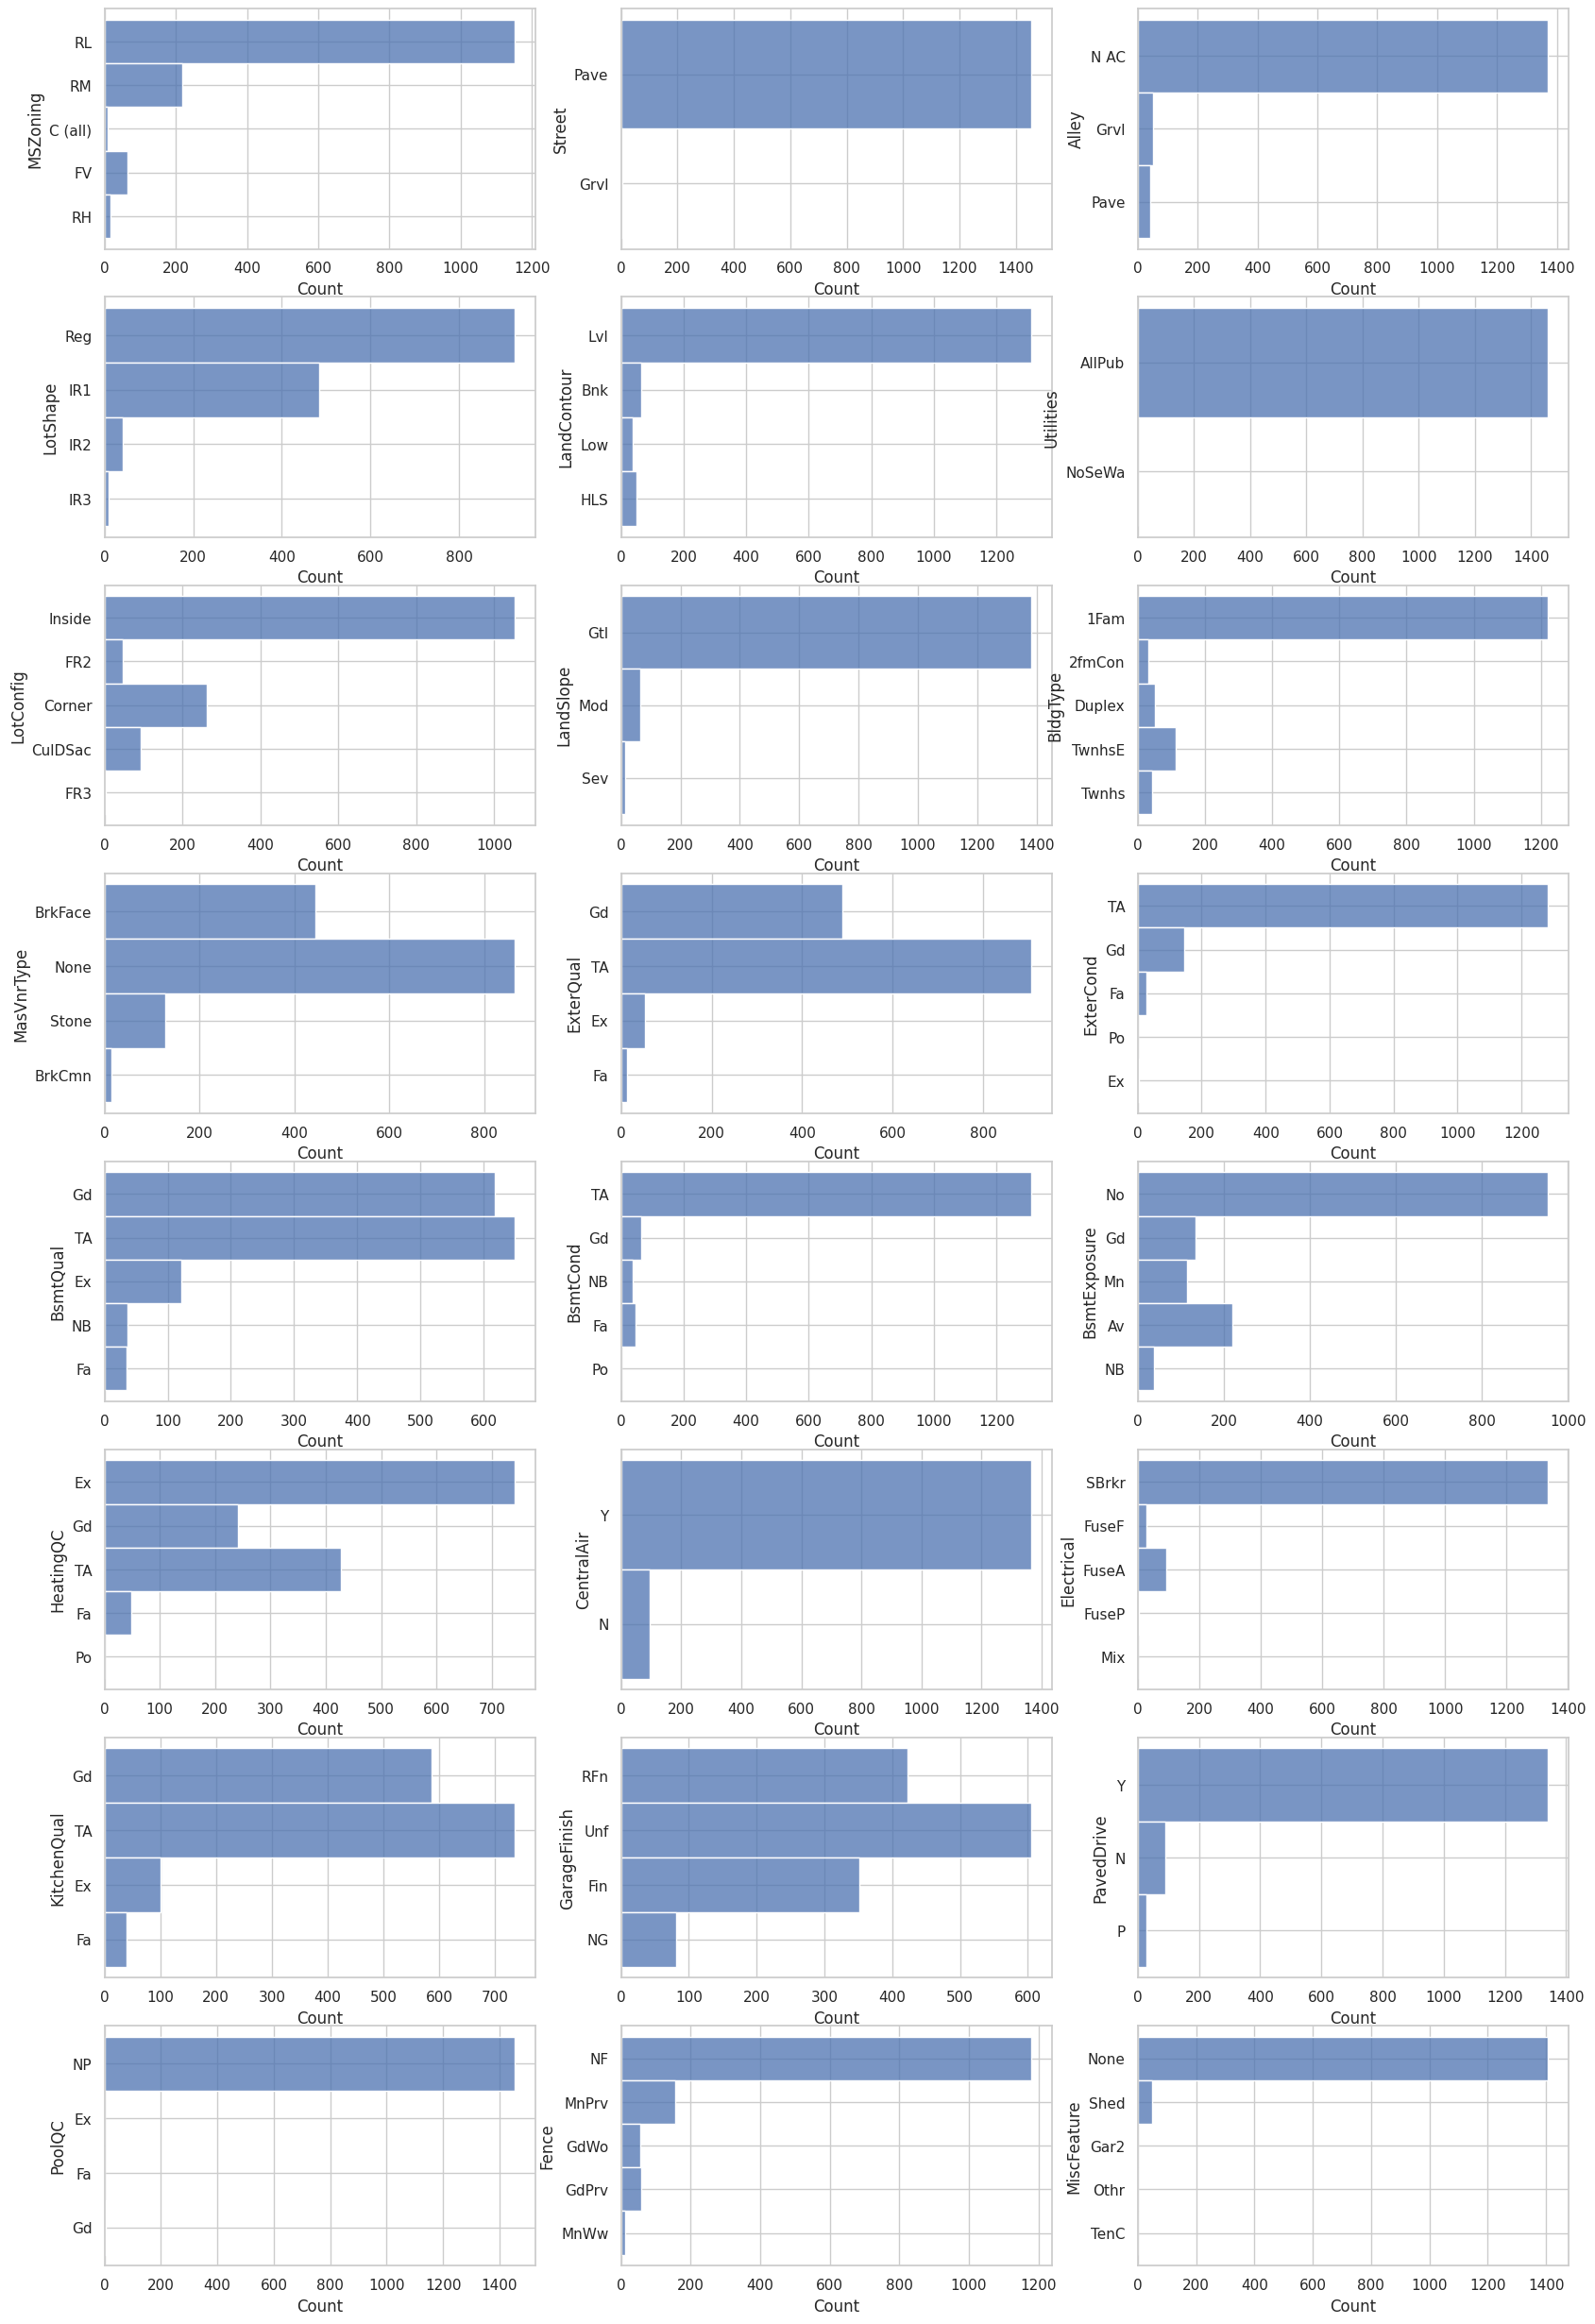

In [ ]:
l = list(enumerate(low_card))
plt.figure(figsize=(20,35))
for (i,j) in l :
    plt.subplot(9,3,i+1)
    sns.histplot(data=train_df,y=j)

* alley,miscfeature,poolqc and fence has a low number of
different value on each category (too much nan)

* mszoning,street,landcontour,utilities,lotconfig,bldgtype,landslope,bsmtexpossure,centralair,electrical,garagequal,garagecond and pavedrive has a high concentration observation on a few categories.

# Enginering Featuring

## Bathroom


In [ ]:
train_df[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','SalePrice']].head(15)

BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  SalePrice
0              1             0         2         1     208500
1              0             1         2         0     181500
2              1             0         2         1     223500
3              1             0         1         0     140000
4              1             0         2         1     250000
5              1             0         1         1     143000
6              1             0         2         0     307000
7              1             0         2         1     200000
8              0             0         2         0     129900
9              1             0         1         0     118000
10             1             0         1         0     129500
11             1             0         3         0     345000
12             1             0         1         0     144000
13             0             0         2         0     279500
14             1             0         1         1     157000

In [ ]:
z = pd.DataFrame()
z = train_df[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','SalePrice']]
z['totbathroom'] = z['BsmtFullBath']+z['BsmtHalfBath']+z['FullBath']+z['HalfBath']
z[['totbathroom','SalePrice']]

totbathroom  SalePrice
0               4     208500
1               3     181500
2               4     223500
3               2     140000
4               4     250000
5               3     143000
6               3     307000
7               4     200000
8               2     129900
9               2     118000
10              2     129500
11              4     345000
12              2     144000
13              2     279500
14              3     157000
15              1     132000
16              2     149000
17              2      90000
18              3     159000
19              1     139000
20              4     325300
21              1     139400
22              2     230000
23              2     129900
24              2     154000
25              2     256300
26              2     134800
27              3     306000
28              2     207500
29              1      68500
30              1      40000
31              2     149350
32              2     179900
33              3     165500
34              3     277500
35              4     309000
36              2     145000
37              2     153000
38              2     109000
39              2      82000
40              2     160000
41              3     170000
42              2     144000
43              2     130250
44              2     141000
45              3     319900
46              3     239686
47              2     249700
48              2     113000
49              2     127000
50              3     177000
51              1     114500
52              2     110000
53              3     385000
54              1     130000
55              2     180500
56              4     172500
57              3     196500
58              4     438780
59              1     124900
60              3     158000
61              1     101000
62              2     202500
63              2     140000
64              4     219500
65              3     317000
66              3     180000
67              3     226000
68              1      80000
69              2     225000
70              3     244000
71              2     129500
72              3     185000
73              2     144900
74              2     107400
75              2      91000
76              1     135750
77              2     127000
78              2     136500
79              2     110000
80              3     193500
81              3     153500
82              2     245000
83              2     126500
84              3     168500
85              3     260000
86              3     174000
87              3     164500
88              1      85000
89              2     123600
90              1     109900
91              1      98600
92              2     163500
93              3     133900
94              4     204750
95              3     185000
96              2     214000
97              2      94750
98              1      83000
99              3     128950
100             3     205000
101             3     178000
102             2     118964
103             2     198900
104             2     169500
105             3     250000
106             1     100000
107             1     115000
108             2     115000
109             2     190000
110             2     136900
111             3     180000
112             4     383970
113             3     217000
114             4     259500
115             3     176000
116             2     139000
117             2     155000
118             4     320000
119             3     163990
120             2     180000
121             1     100000
122             1     136000
123             2     153900
124             2     181000
125             2      84500
126             2     128000
127             1      87000
128             2     155000
129             3     150000
130             3     226000
131             4     244000
132             2     150750
133             3     220000
134             3     180000
135             2     174000
136             2     143000
137 

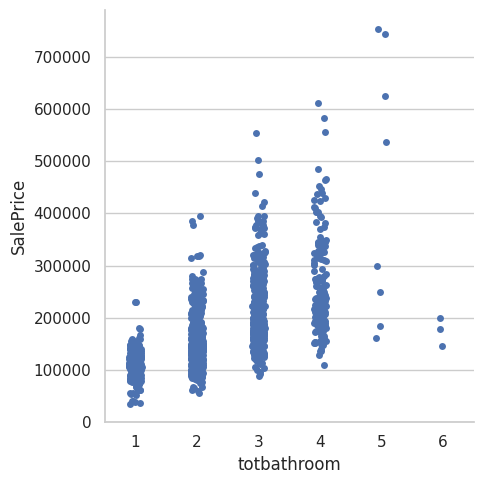

In [ ]:
sns.catplot(data=z,x='totbathroom',y='SalePrice');

* **Looks like a good feature. Each category has a good amount of observation in reference saleprice values.**  

In [ ]:
#New Feature
train_df['totbathroom'] = train_df['BsmtFullBath']+train_df['BsmtHalfBath']+train_df['FullBath']+train_df['HalfBath']
test_df['totbathroom'] =test_df['BsmtFullBath']+test_df['BsmtHalfBath']+test_df['FullBath']+test_df['HalfBath']

## Basements (BSMT features)


In [ ]:
### Hasbasement

In [ ]:
train_df[train_df['TotalBsmtSF']==0]['TotalBsmtSF'].count()

37

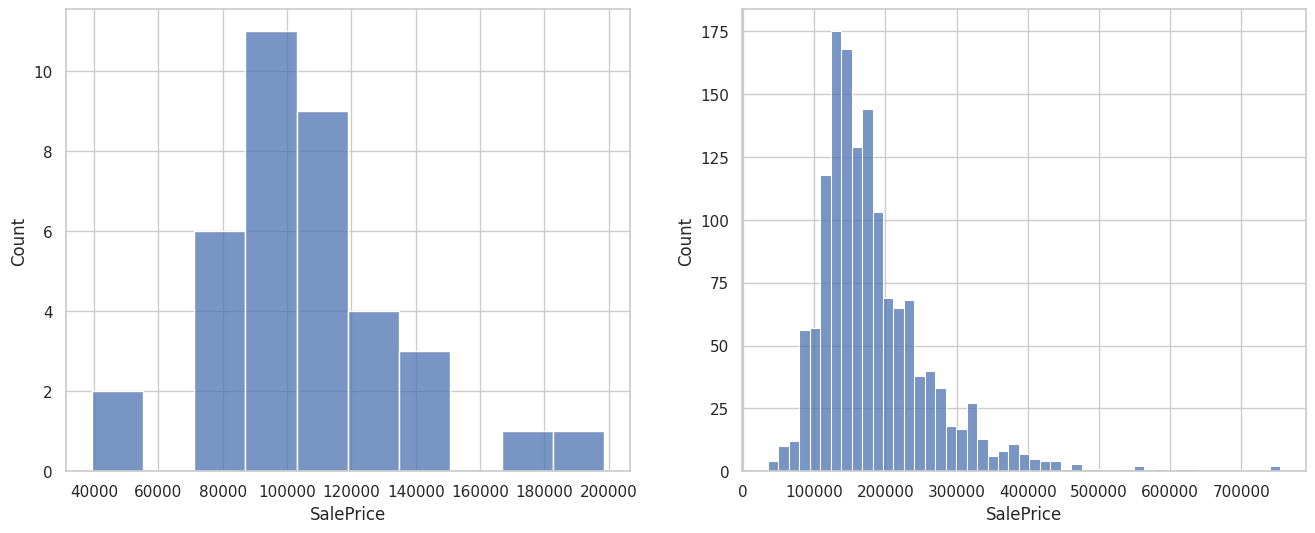

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(data=train_df[train_df['TotalBsmtSF']==0],x='SalePrice')
plt.subplot(1,2,2)
sns.histplot(data=train_df[train_df['TotalBsmtSF']>0],x='SalePrice');

* **Has few observation with no basement. But, houses with no basement has a low price value. This is a good discrimination for ML algorithm**

In [ ]:
train_df['HasBasement'] = train_df.apply(lambda x: 1 if x['TotalBsmtSF']>1 else 0,axis=1)
test_df['HasBasement'] = test_df.apply(lambda x: 1 if x['TotalBsmtSF']>1 else 0,axis=1 )

In [ ]:
train_df[['TotalBsmtSF','HasBasement']].head(20)

TotalBsmtSF  HasBasement
0           856            1
1          1262            1
2           920            1
3           756            1
4          1145            1
5           796            1
6          1686            1
7          1107            1
8           952            1
9           991            1
10         1040            1
11         1175            1
12          912            1
13         1494            1
14         1253            1
15          832            1
16         1004            1
17            0            0
18         1114            1
19         1029            1

In [ ]:
########Has basement type 1

In [ ]:
train_df['hasbsmttype1'] = train_df.apply(lambda x: 1 if x['BsmtFinSF1']>0
                                          else 0,axis=1)
test_df['hasbsmttype1'] = test_df.apply(lambda x: 1 if x['BsmtFinSF1']>0
                                        else 0,axis=1)

In [ ]:
########Has basement type 2

In [ ]:
train_df['hasbsmttype2'] = train_df.apply(lambda x: 1 if x['BsmtFinSF2']>0
                                          else 0,axis=1)
test_df['hasbsmttype2'] = test_df.apply(lambda x: 1 if x['BsmtFinSF2']>0
                                        else 0,axis=1)

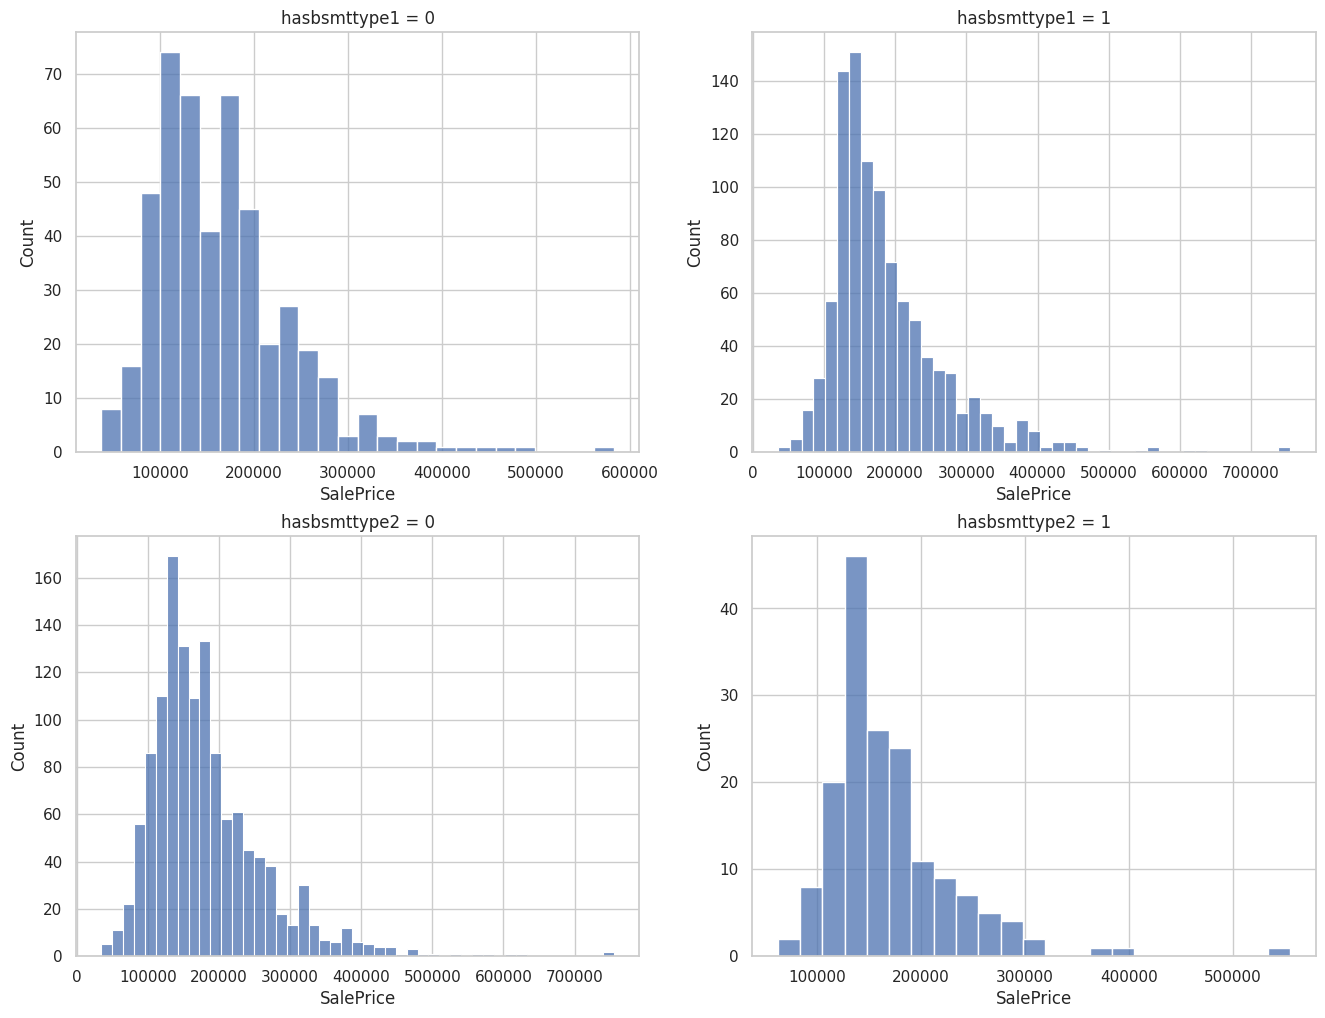

In [ ]:
#Here we goint to see how SalePrice distribution looks like
#With each type of basement

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.histplot(train_df[train_df['hasbsmttype1']==0]['SalePrice'])
plt.title('hasbsmttype1 = 0')
plt.subplot(2,2,2)
sns.histplot(train_df[train_df['hasbsmttype1']==1]['SalePrice'])
plt.title('hasbsmttype1 = 1')
plt.subplot(2,2,3)
sns.histplot(train_df[train_df['hasbsmttype2']==0]['SalePrice'])
plt.title('hasbsmttype2 = 0')
plt.subplot(2,2,4)
sns.histplot(train_df[train_df['hasbsmttype2']==1]['SalePrice'])
plt.title('hasbsmttype2 = 1');

## Time

In [ ]:
train_df[['YrSold','YearBuilt']].describe()

YrSold    YearBuilt
count  1460.000000  1460.000000
mean   2007.815753  1971.267808
std       1.328095    30.202904
min    2006.000000  1872.000000
25%    2007.000000  1954.000000
50%    2008.000000  1973.000000
75%    2009.000000  2000.000000
max    2010.000000  2010.000000

In [ ]:
#New Feature
train_df['period_no_sold'] =train_df['YrSold'] - train_df['YearBuilt']
test_df['period_no_sold'] = test_df['YrSold'] - test_df['YearBuilt']
train_df['period_no_sold'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: period_no_sold, dtype: float64

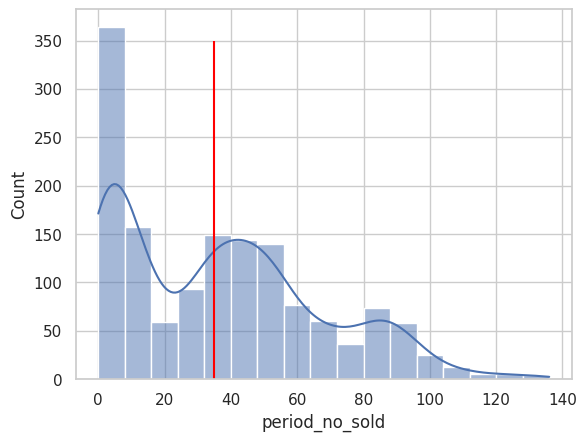

In [ ]:
sns.histplot(data=train_df,x='period_no_sold',kde=True)
plt.vlines(train_df['period_no_sold'].median(),0,350,color='red');

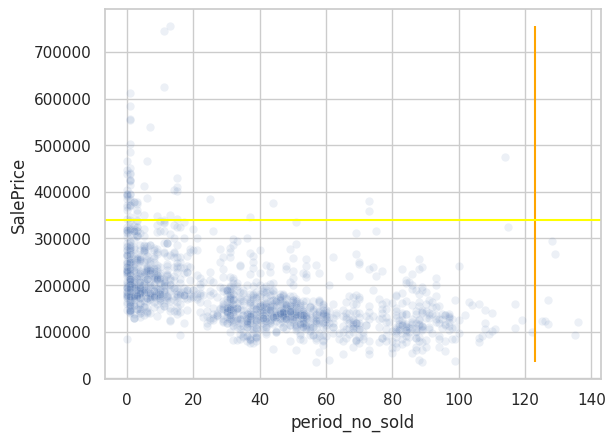

In [ ]:
#SalePrice up and down limits
qrs = train_df['SalePrice'].quantile(0.75)-train_df['SalePrice'].quantile(0.25)
ups = train_df['SalePrice'].quantile(0.75)+(1.5)*qrs
downs = train_df['SalePrice'].quantile(0.25)-(1.5)*qrs

#Age up and down limits
qr = train_df['period_no_sold'].quantile(0.75)-train_df['period_no_sold'].quantile(0.25)
up = train_df['period_no_sold'].quantile(0.75)+(1.5)*qr
down = train_df['period_no_sold'].quantile(0.25)-(1.5)*qr

#just a scatterplot
sns.scatterplot(data=train_df,x='period_no_sold',y='SalePrice',alpha=0.1)
plt.vlines(up,train_df['SalePrice'].min(),train_df['SalePrice'].max(),color = 'orange')
plt.axhline(ups,train_df['period_no_sold'].min(),train_df['period_no_sold'].max(),color='yellow')

* **Yellow line is a upper limit for SalePrice feature and orange is a upper limit for a Age features**

## Area

In [ ]:
train_df[['TotalBsmtSF','GarageArea','1stFlrSF','2ndFlrSF','SalePrice']].head()

TotalBsmtSF  GarageArea  1stFlrSF  2ndFlrSF  SalePrice
0          856         548       856       854     208500
1         1262         460      1262         0     181500
2          920         608       920       866     223500
3          756         642       961       756     140000
4         1145         836      1145      1053     250000

In [ ]:
#New Feature
train_df['Total_Internal_Area'] = train_df['GarageArea']+train_df['TotalBsmtSF']+train_df['1stFlrSF']+train_df['2ndFlrSF']
test_df['Total_Internal_Area'] = train_df['GarageArea']+train_df['TotalBsmtSF']+train_df['1stFlrSF']+train_df['2ndFlrSF']

In [ ]:
train_df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','Total_Internal_Area','SalePrice']].head()

TotalBsmtSF  1stFlrSF  2ndFlrSF  GarageArea  Total_Internal_Area  SalePrice
0          856       856       854         548                 3114     208500
1         1262      1262         0         460                 2984     181500
2          920       920       866         608                 3314     223500
3          756       961       756         642                 3115     140000
4         1145      1145      1053         836                 4179     250000

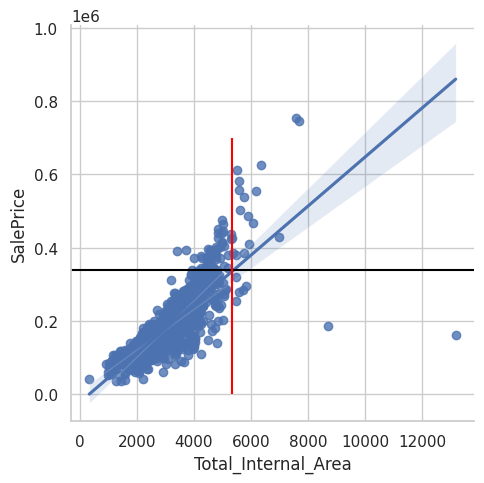

In [ ]:
#saleprice upper_limit
qrs = train_df['SalePrice'].quantile(0.75) - train_df['SalePrice'].quantile(0.25)
ups = train_df['SalePrice'].quantile(0.75) + qrs*(1.5)

#total area upper_limit
qr = train_df['Total_Internal_Area'].quantile(0.75) - train_df['Total_Internal_Area'].quantile(0.25)
up = train_df['Total_Internal_Area'].quantile(0.75) + qr*(1.5)

sns.lmplot(data=train_df,x='Total_Internal_Area',y='SalePrice');
plt.axhline(ups,0,200000,color='black');
plt.vlines(up,0,700000,color='red');


In [ ]:
train_df['Total_Internal_Area'].describe()

count     1460.000000
mean      3040.028767
std        958.651371
min        334.000000
25%       2388.000000
50%       2934.000000
75%       3570.750000
max      13170.000000
Name: Total_Internal_Area, dtype: float64

In [ ]:
#################################################################################

In [ ]:
#Yard
train_df[['1stFlrSF','LotArea','SalePrice']].head()

1stFlrSF  LotArea  SalePrice
0       856     8450     208500
1      1262     9600     181500
2       920    11250     223500
3       961     9550     140000
4      1145    14260     250000

In [ ]:
train_df['Yard'] = train_df['LotArea'] - train_df['1stFlrSF']
test_df['Yard'] = test_df['LotArea'] - test_df['1stFlrSF']

In [ ]:
train_df[['1stFlrSF','LotArea','Yard','SalePrice']].head()

1stFlrSF  LotArea   Yard  SalePrice
0       856     8450   7594     208500
1      1262     9600   8338     181500
2       920    11250  10330     223500
3       961     9550   8589     140000
4      1145    14260  13115     250000

<Axes: xlabel='Yard', ylabel='Count'>

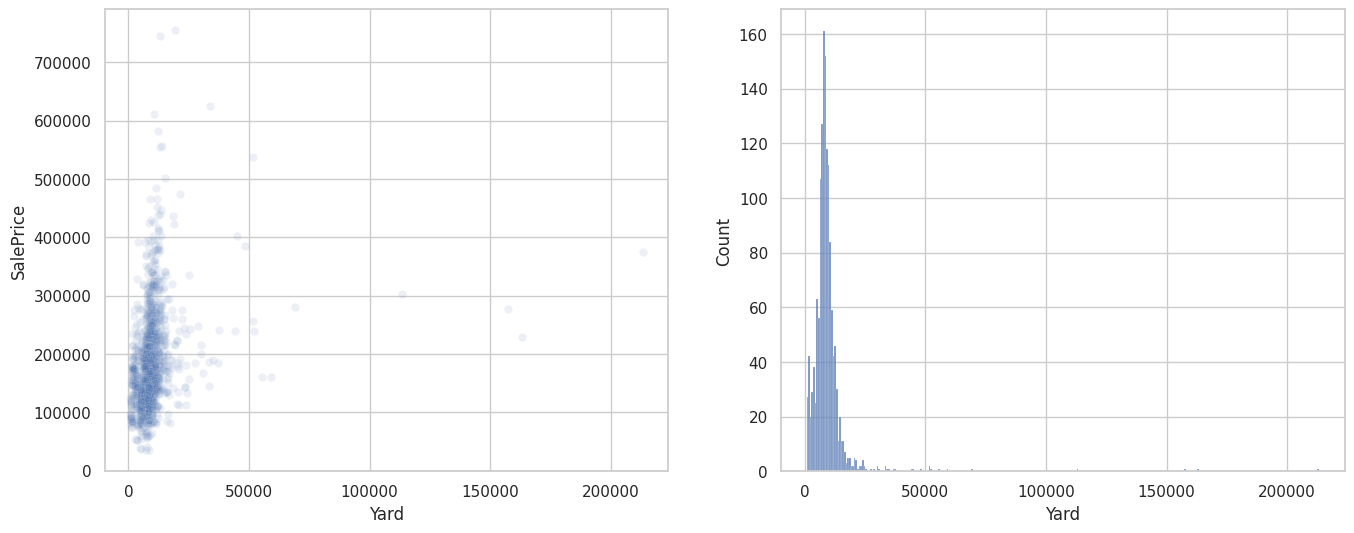

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(data=train_df,x='Yard',y='SalePrice',alpha=0.1)
plt.subplot(1,2,2)
sns.histplot(data=train_df,x='Yard')

In [ ]:
train_df.corr()['SalePrice']['Yard']

0.24302896771644886

In [ ]:
#####################################################################

In [ ]:
train_df[['OpenPorchSF','EnclosedPorch','3SsnPorch','LotArea','SalePrice']].head()

OpenPorchSF  EnclosedPorch  3SsnPorch  LotArea  SalePrice
0           61              0          0     8450     208500
1            0              0          0     9600     181500
2           42              0          0    11250     223500
3           35            272          0     9550     140000
4           84              0          0    14260     250000

In [ ]:
#New Feature
train_df['Total_Porch_Area'] = (train_df['OpenPorchSF']+train_df['EnclosedPorch']
                                +train_df['3SsnPorch'])
test_df['Total_Porch_Area'] = (test_df['OpenPorchSF']+test_df['EnclosedPorch']
                              +test_df['3SsnPorch'])

In [ ]:
train_df[['Total_Porch_Area','SalePrice']].head()

Total_Porch_Area  SalePrice
0                61     208500
1                 0     181500
2                42     223500
3               307     140000
4                84     250000

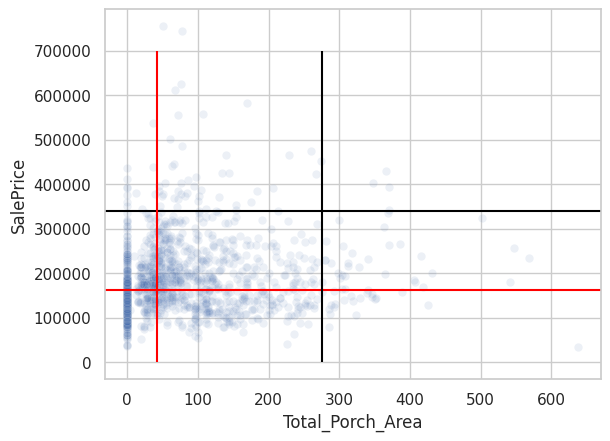

In [ ]:
#saleprice upper_limit
qrs = train_df['SalePrice'].quantile(0.75) - train_df['SalePrice'].quantile(0.25)
ups = train_df['SalePrice'].quantile(0.75) + qrs*(1.5)
#T_P_A upper limit
qr = train_df['Total_Porch_Area'].quantile(0.75) - train_df['Total_Porch_Area'].quantile(0.25)
up = train_df['Total_Porch_Area'].quantile(0.75) + qr*(1.5)

sns.scatterplot(data=train_df,x='Total_Porch_Area',y='SalePrice',alpha=0.1)
plt.axhline(ups,0,600,color='black')
plt.axhline(train_df['SalePrice'].median(),0,600,color = 'red')
plt.vlines(up,0,700000,color='black')
plt.vlines(train_df['Total_Porch_Area'].median(),0,700000,color='red');

* **Don't look a good feature. Too much outliers and don't have pattern**

<Axes: >

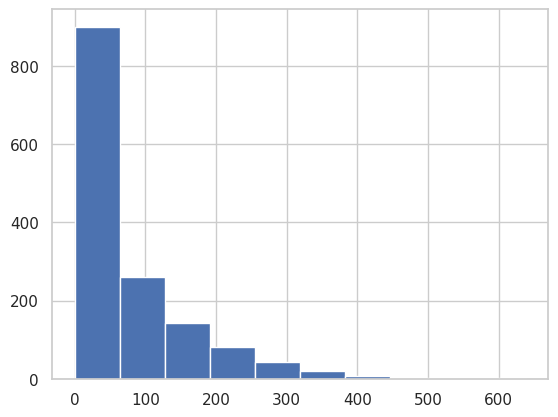

In [ ]:
train_df['Total_Porch_Area'].hist()

In [ ]:
#############################################################################################################################################

In [ ]:
train_df[['Total_Porch_Area','1stFlrSF','SalePrice']].head()

Total_Porch_Area  1stFlrSF  SalePrice
0                61       856     208500
1                 0      1262     181500
2                42       920     223500
3               307       961     140000
4                84      1145     250000

<Axes: xlabel='SalePrice', ylabel='Count'>

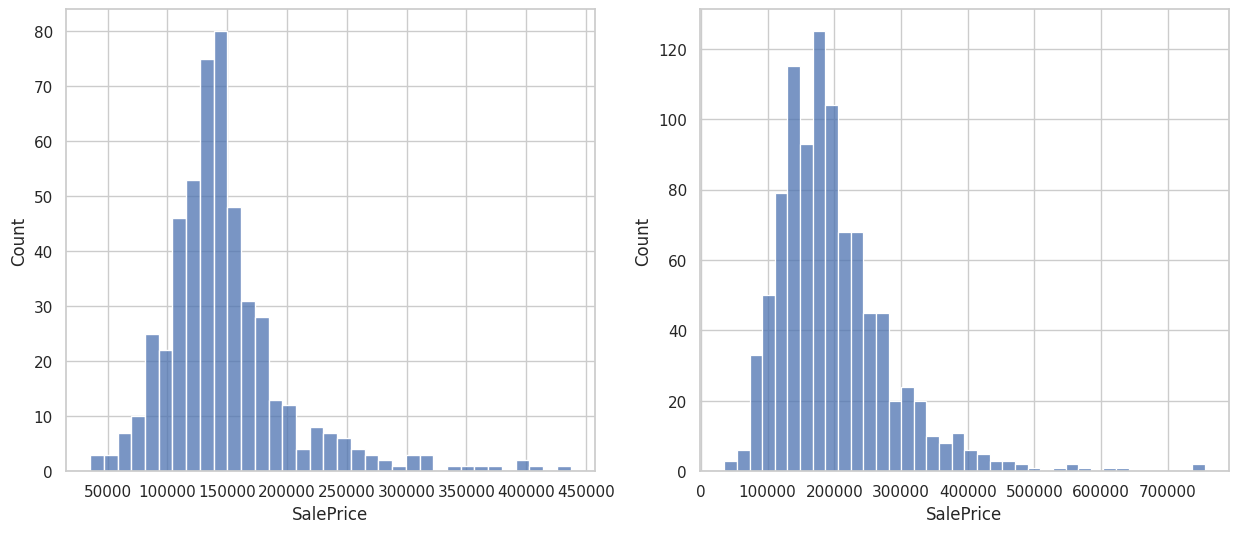

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data=train_df[train_df['Total_Porch_Area']==0],x='SalePrice')
plt.subplot(1,2,2)
sns.histplot(data=train_df[train_df['Total_Porch_Area']>0],x='SalePrice')

In [ ]:
#New feature
train_df['Hasporch_area'] = train_df['Total_Porch_Area'].apply(lambda x: 0 if x==0 else 1)
test_df['Hasporch_area'] = test_df['Total_Porch_Area'].apply(lambda x: 0 if x==0 else 1)

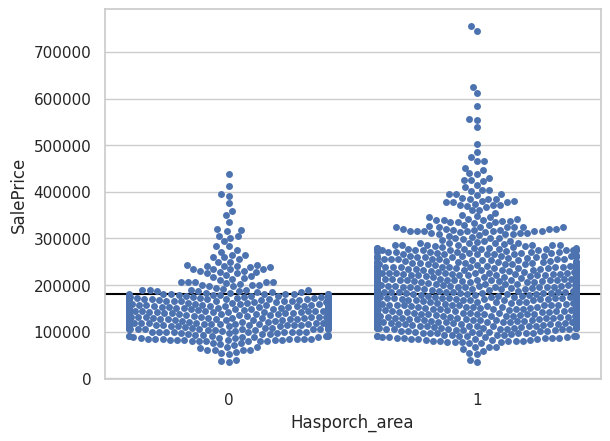

In [ ]:
sns.swarmplot(data=train_df,x='Hasporch_area',y='SalePrice')
plt.axhline(train_df['SalePrice'].mean(),0,1,color='black')

## floor

In [ ]:
#New Feature
train_df['Has_Sencond_Floor'] = train_df['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)
test_df['Has_Sencond_Floor'] = test_df['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
train_df[['Has_Sencond_Floor','2ndFlrSF']]

Has_Sencond_Floor  2ndFlrSF
0                     1       854
1                     0         0
2                     1       866
3                     1       756
4                     1      1053
5                     1       566
6                     0         0
7                     1       983
8                     1       752
9                     0         0
10                    0         0
11                    1      1142
12                    0         0
13                    0         0
14                    0         0
15                    0         0
16                    0         0
17                    0         0
18                    0         0
19                    0         0
20                    1      1218
21                    0         0
22                    0         0
23                    0         0
24                    0         0
25                    0         0
26                    0         0
27                    0         0
28                    0         0
29                    0         0
30                    1       668
31                    0         0
32                    0         0
33                    0         0
34                    0         0
35                    1      1320
36                    0         0
37                    0         0
38                    0         0
39                    0         0
40                    0         0
41                    0         0
42                    0         0
43                    0         0
44                    0         0
45                    0         0
46                    1       631
47                    0         0
48                    1       716
49                    0         0
50                    1       676
51                    0         0
52                    0         0
53                    0         0
54                    0         0
55                    0         0
56                    1       756
57                    1       860
58                    1      1519
59                    0         0
60                    0         0
61                    1       530
62                    0         0
63                    1       808
64                    1       977
65                    1      1330
66                    0         0
67                    0         0
68                    0         0
69                    1       983
70                    0         0
71                    0         0
72                    1       833
73                    0         0
74                    1       765
75                    1       462
76                    0         0
77                    1       213
78                    0         0
79                    1       548
80                    1       960
81                    0         0
82                    0         0
83                    0         0
84                    1       670
85                    1      1116
86                    1       876
87                    1       612
88                    0         0
89                    0         0
90                    0         0
91                    0         0
92                    0         0
93                    1      1031
94                    1       881
95                    1       790
96                    0         0
97                    0         0
98                    0         0
99                    0         0
100                   0         0
101                   1       755
102                   0         0
103                   0         0
104                   1       592
105                   1       939
106                   0         0
107                   0         0
108                   1       520
109                   0         0
110                   1       639
111                   1       656
112                   1      1414
113                   0         0
114                   1       884
115                   1       729
116                   0     

In [ ]:
train_df['Has_Sencond_Floor'].value_counts()

0    829
1    631
Name: Has_Sencond_Floor, dtype: int64

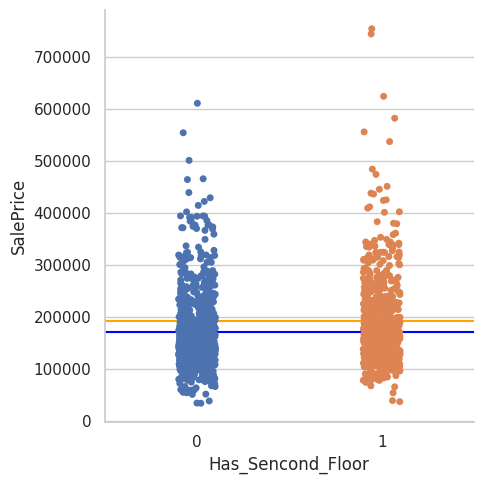

In [ ]:
sns.catplot(data=train_df,x='Has_Sencond_Floor',y='SalePrice',hue='Has_Sencond_Floor');
m0 = train_df[train_df['Has_Sencond_Floor']==0]['SalePrice'].mean()
m1 = train_df[train_df['Has_Sencond_Floor']==1]['SalePrice'].mean()
plt.axhline(m0,0,1,color='blue')
plt.axhline(m1,0,1,color='orange')

<Axes: xlabel='Has_Sencond_Floor', ylabel='Count'>

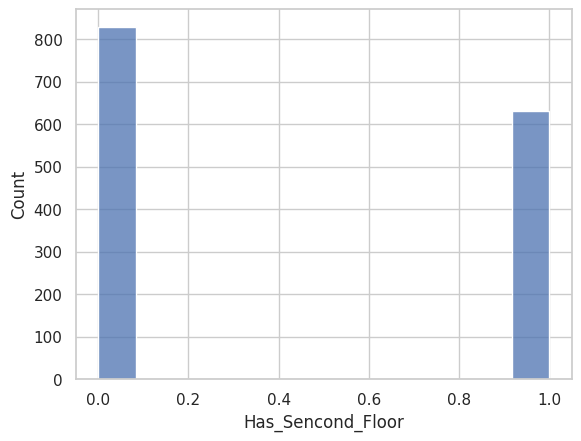

In [ ]:
sns.histplot(data=train_df,x='Has_Sencond_Floor')

* **Median,up and down limits a so close in reference saleprice. Don't look  informative to algorithm**

In [ ]:
############

In [ ]:
# feature that inform what observation has second floor bigger than first floor

In [ ]:
train_df['2_bigger_1floor'] = train_df.apply(lambda x: 1 if x['2ndFlrSF']>x['1stFlrSF'] else 0,axis=1)
test_df['2_bigger_1floor'] = test_df.apply(lambda x: 1 if x['2ndFlrSF']>x['1stFlrSF'] else 0,axis=1)

In [ ]:
train_df[['2_bigger_1floor','1stFlrSF','2ndFlrSF','SalePrice']]

2_bigger_1floor  1stFlrSF  2ndFlrSF  SalePrice
0                   0       856       854     208500
1                   0      1262         0     181500
2                   0       920       866     223500
3                   0       961       756     140000
4                   0      1145      1053     250000
5                   0       796       566     143000
6                   0      1694         0     307000
7                   0      1107       983     200000
8                   0      1022       752     129900
9                   0      1077         0     118000
10                  0      1040         0     129500
11                  0      1182      1142     345000
12                  0       912         0     144000
13                  0      1494         0     279500
14                  0      1253         0     157000
15                  0       854         0     132000
16                  0      1004         0     149000
17                  0      1296         0      90000
18                  0      1114         0     159000
19                  0      1339         0     139000
20                  1      1158      1218     325300
21                  0      1108         0     139400
22                  0      1795         0     230000
23                  0      1060         0     129900
24                  0      1060         0     154000
25                  0      1600         0     256300
26                  0       900         0     134800
27                  0      1704         0     306000
28                  0      1600         0     207500
29                  0       520         0      68500
30                  1       649       668      40000
31                  0      1228         0     149350
32                  0      1234         0     179900
33                  0      1700         0     165500
34                  0      1561         0     277500
35                  1      1132      1320     309000
36                  0      1097         0     145000
37                  0      1297         0     153000
38                  0      1057         0     109000
39                  0      1152         0      82000
40                  0      1324         0     160000
41                  0      1328         0     170000
42                  0       884         0     144000
43                  0       938         0     130250
44                  0      1150         0     141000
45                  0      1752         0     319900
46                  0      1518       631     239686
47                  0      1656         0     249700
48                  0       736       716     113000
49                  0       955         0     127000
50                  0       794       676     177000
51                  0       816         0     114500
52                  0       816         0     110000
53                  0      1842         0     385000
54                  0      1360         0     130000
55                  0      1425         0     180500
56                  0       983       756     172500
57                  0       860       860     196500
58                  1      1426      1519     438780
59                  0       780         0     124900
60                  0      1158         0     158000
61                  0       581       530     101000
62                  0      1370         0     202500
63                  0       902       808     140000
64                  0      1057       977     219500
65                  1      1143      1330     317000
66                  0      2207         0     180000
67                  0      1479         0     226000
68                  0       747         0      80000
69                  0      1304       983     225000
70                  0      2223         0     244000
71                  0       845         0     129500
72                  0       885       833     185000
73                  0      1086         0     144900
74                  0       840

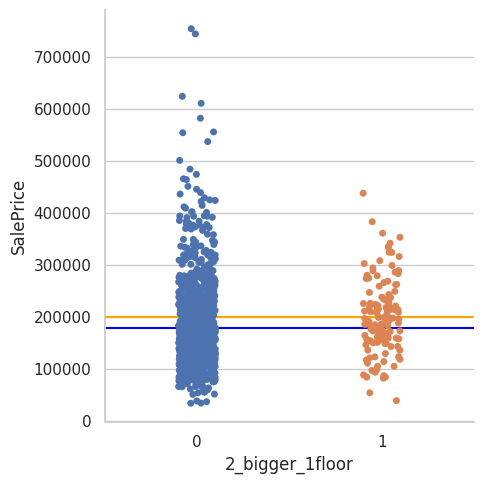

In [ ]:
sns.catplot(data=train_df,x='2_bigger_1floor',y='SalePrice',hue='2_bigger_1floor');
m0 = train_df[train_df['2_bigger_1floor']==0]['SalePrice'].mean()
m1= train_df[train_df['2_bigger_1floor']==1]['SalePrice'].mean()
plt.axhline(m0,0,1,color='blue')
plt.axhline(m1,0,1,color='orange');

## Decoration

In [ ]:
train_df[['MasVnrArea','WoodDeckSF','SalePrice']].head(10)

MasVnrArea  WoodDeckSF  SalePrice
0       196.0           0     208500
1         0.0         298     181500
2       162.0           0     223500
3         0.0           0     140000
4       350.0         192     250000
5         0.0          40     143000
6       186.0         255     307000
7       240.0         235     200000
8         0.0          90     129900
9         0.0           0     118000

In [ ]:
train_df[['MasVnrArea','WoodDeckSF','SalePrice']].describe()

MasVnrArea   WoodDeckSF      SalePrice
count  1452.000000  1460.000000    1460.000000
mean    103.685262    94.244521  180921.195890
std     181.066207   125.338794   79442.502883
min       0.000000     0.000000   34900.000000
25%       0.000000     0.000000  129975.000000
50%       0.000000     0.000000  163000.000000
75%     166.000000   168.000000  214000.000000
max    1600.000000   857.000000  755000.000000

In [ ]:
##################################################

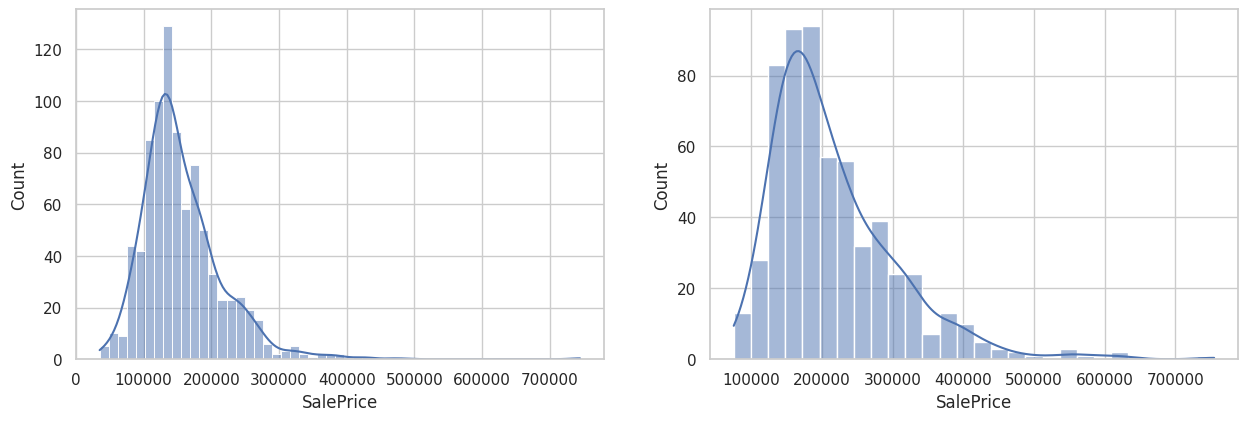

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(data=train_df[train_df['MasVnrArea']==0]['SalePrice'],kde=True);
plt.subplot(2,2,2)
sns.histplot(data=train_df[train_df['MasVnrArea']>0]['SalePrice'],kde=True);

In [ ]:
train_df['Has_MasVnrArea'] = train_df.apply(lambda x: 0 if x['MasVnrArea']==0
                                            else 1, axis=1)
test_df['Has_MasVnrArea'] = test_df.apply(lambda x: 0 if x['MasVnrArea']==0
                                          else 1 , axis=1)

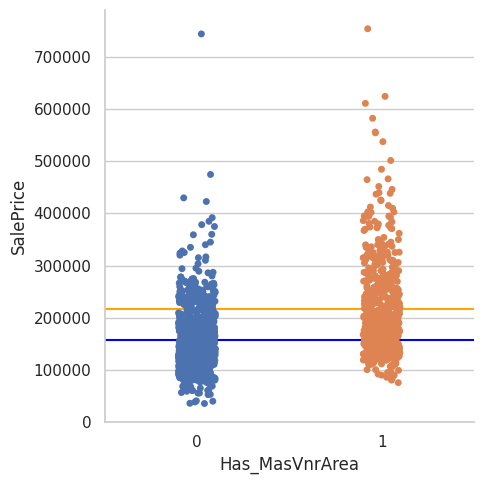

In [ ]:
m0 = train_df[train_df['Has_MasVnrArea']==0]['SalePrice'].mean()
m1 = train_df[train_df['Has_MasVnrArea']==1]['SalePrice'].mean()
sns.catplot(data=train_df,x='Has_MasVnrArea',y='SalePrice',hue='Has_MasVnrArea')
plt.axhline(m0,0,1,color='blue')
plt.axhline(m1,0,1,color='orange')

In [ ]:
train_df.corr()['SalePrice']['Has_MasVnrArea']

0.36780636246719617

In [ ]:
#############################################################################

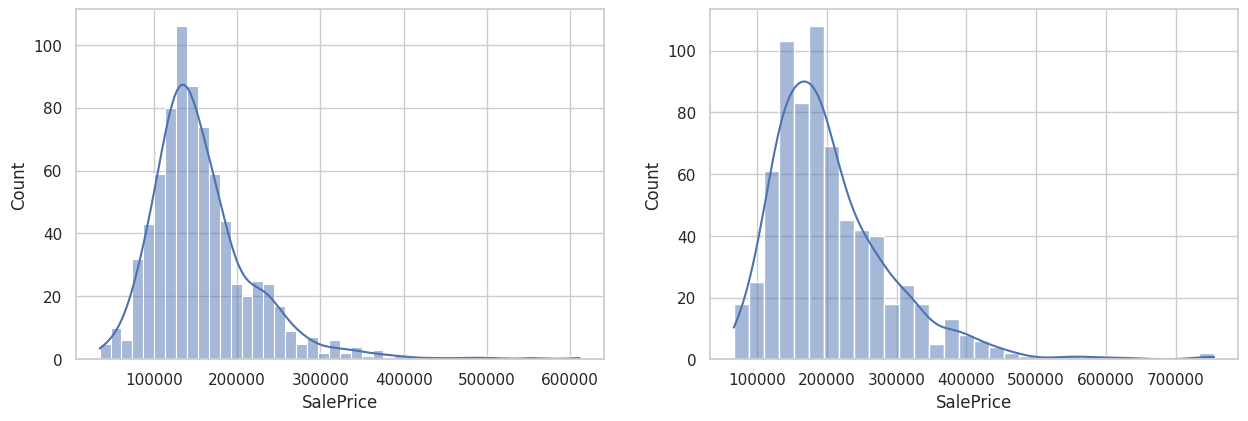

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(data=train_df[train_df['WoodDeckSF']==0]['SalePrice'],kde=True);
plt.subplot(2,2,2)
sns.histplot(data=train_df[train_df['WoodDeckSF']>0]['SalePrice'],kde=True);

In [ ]:
#New Feature
train_df['has_wooddeck'] = train_df.apply(lambda x : 0 if x['WoodDeckSF']==0
                                   else 1,axis=1)


test_df['has_wooddeck'] = test_df.apply(lambda x : 0 if x['WoodDeckSF']==0
                                       else 1,axis=1)

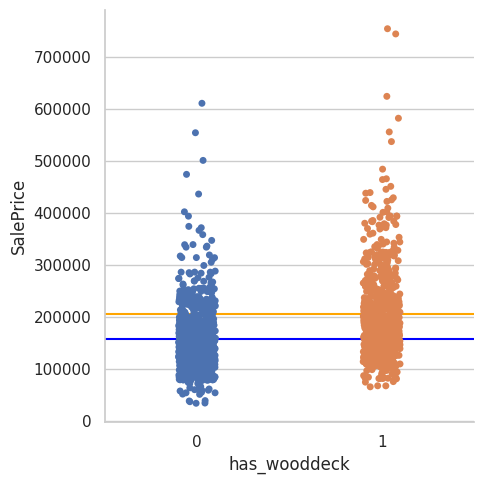

In [ ]:
m0=train_df[train_df['has_wooddeck']==0]['SalePrice'].mean()
m1=train_df[train_df['has_wooddeck']==1]['SalePrice'].mean()
sns.catplot(data=train_df,x='has_wooddeck',y='SalePrice',hue='has_wooddeck')
plt.axhline(m0,0,1,color='blue')
plt.axhline(m1,0,1,color='orange');

In [ ]:
train_df.corr()['SalePrice']['has_wooddeck']

0.2976619138982936

## Normalization

### SalePrice

Skewness 1.8828757597682129
Kurtosis: 6.536281860064529


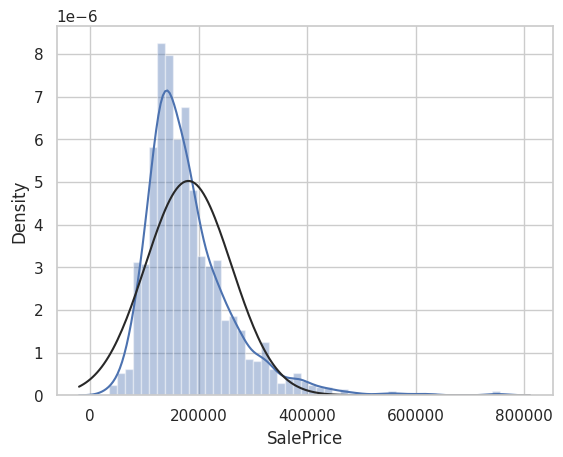

In [ ]:
print('Skewness',train_df['SalePrice'].skew())
print('Kurtosis:',train_df['SalePrice'].kurt())
sns.distplot(train_df['SalePrice'],fit=norm);

Skewness 0.12133506220520406
Kurtosis: 0.8095319958036296


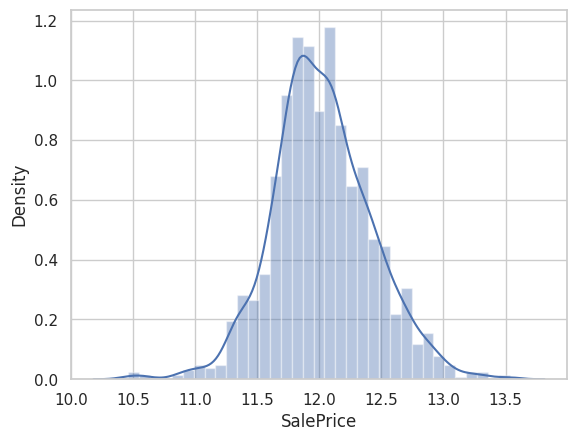

In [ ]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])
print('Skewness',train_df['SalePrice'].skew())
print('Kurtosis:',train_df['SalePrice'].kurt())
sns.distplot(train_df['SalePrice']);

* Now SalePrice looks like a normal distribution. ML algorithm preferer these distribution because rate of change values are know.

### LotArea

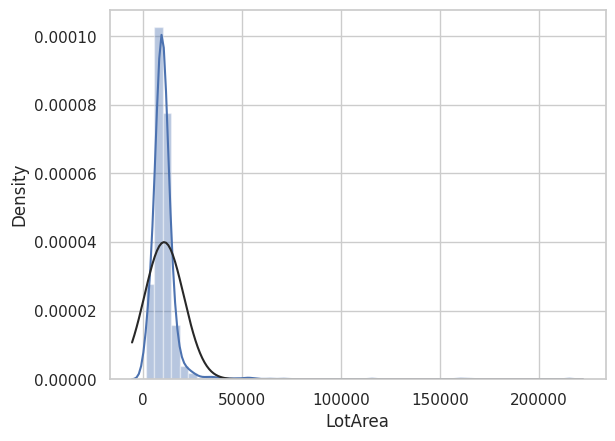

In [ ]:
sns.distplot(train_df['LotArea'], fit=norm);

In [ ]:
train_df['LotArea'] = (train_df['LotArea'])**0.5

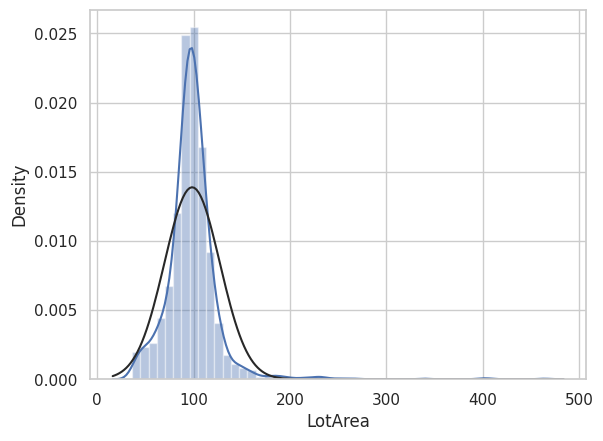

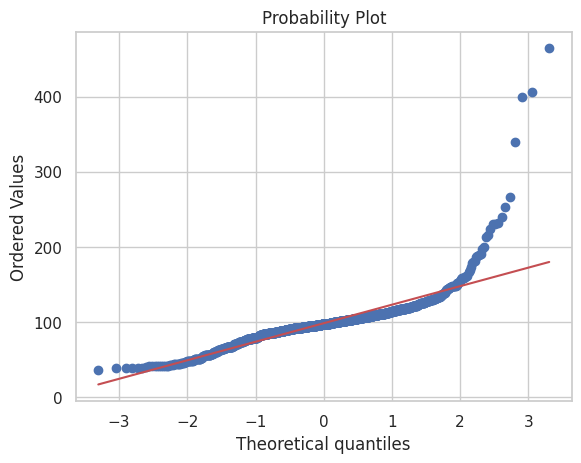

In [ ]:
sns.distplot(train_df['LotArea'], fit=norm);
fig = plt.figure()
QQ = stats.probplot(train_df['LotArea'], plot=plt)

### 1stFlrSF

<Axes: xlabel='1stFlrSF', ylabel='Density'>

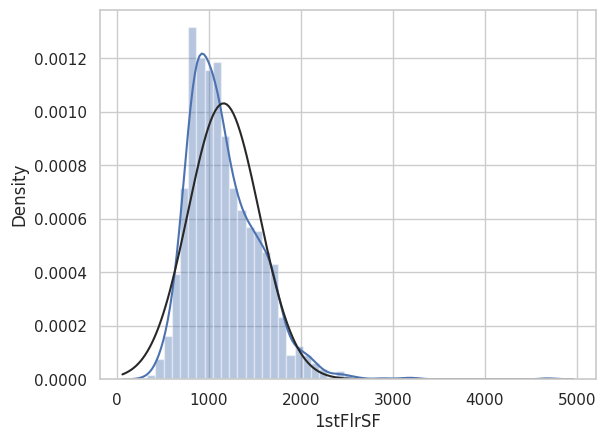

In [ ]:
sns.distplot(train_df['1stFlrSF'],fit=norm)

In [ ]:
train_df['1stFlrSF'] = np.log(train_df['1stFlrSF'])

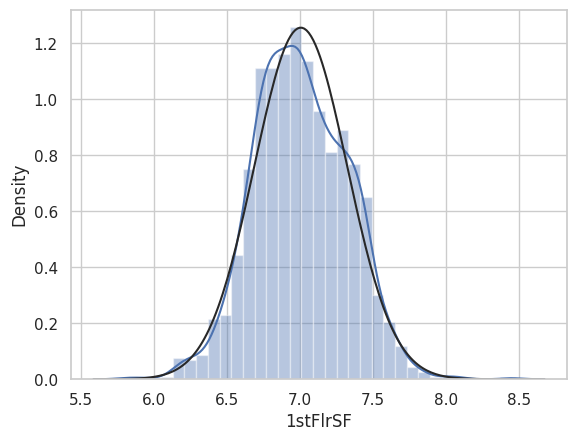

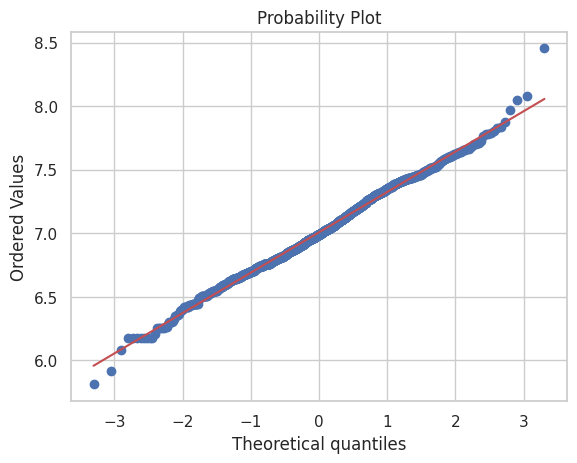

In [ ]:
sns.distplot(train_df['1stFlrSF'],fit=norm)
figure = plt.figure()
QQ = stats.probplot(train_df['1stFlrSF'], plot=plt)

### TotalBsmtSF

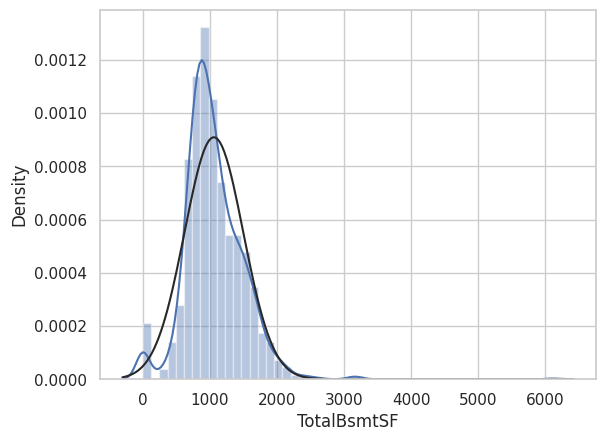

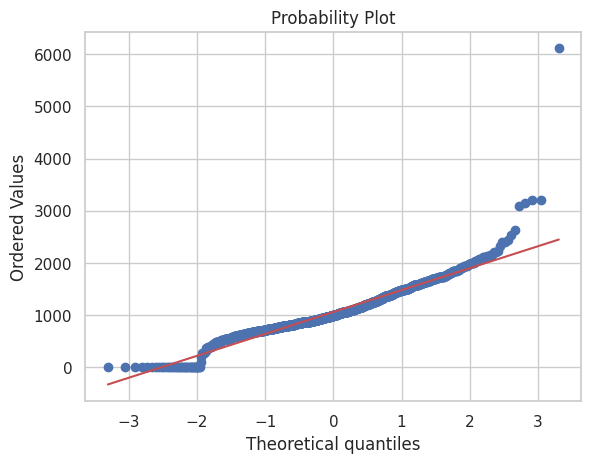

In [ ]:
sns.distplot(train_df['TotalBsmtSF'],fit=norm)
figure = plt.figure()
QQ = stats.probplot(train_df['TotalBsmtSF'], plot=plt)

In [ ]:
#Applying log transformation only on values bigger than ZERO
train_df.loc[train_df['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])

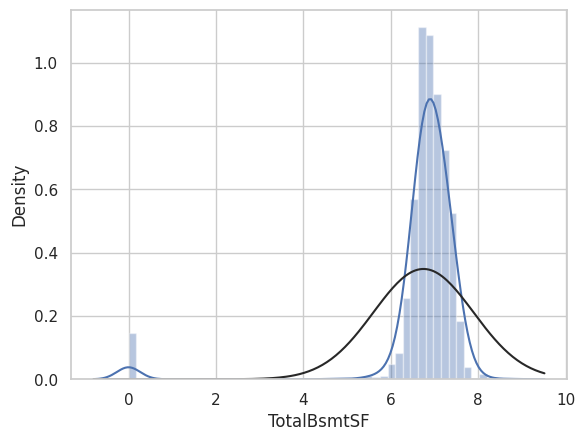

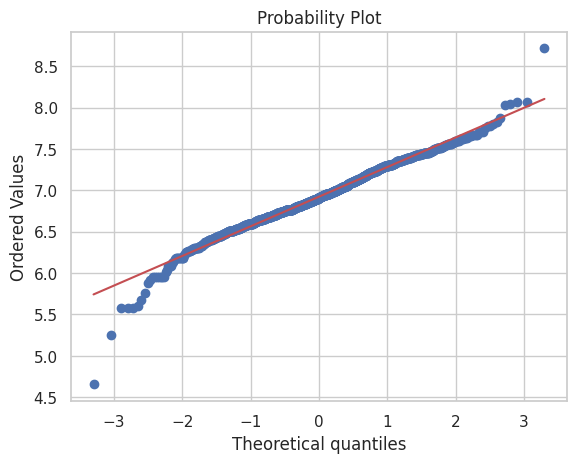

In [ ]:
sns.distplot(train_df['TotalBsmtSF'],fit=norm)
figure = plt.figure()
QQ = stats.probplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### GrLivArea

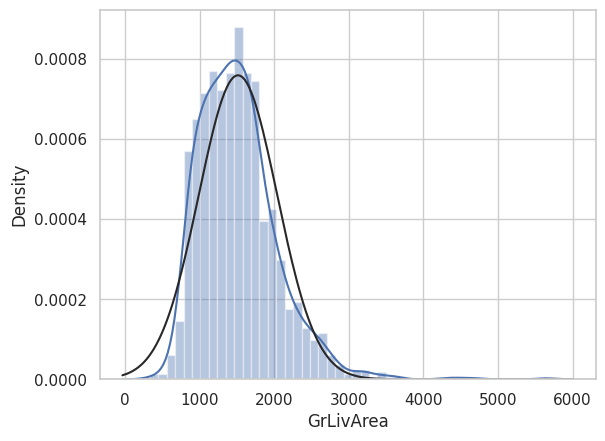

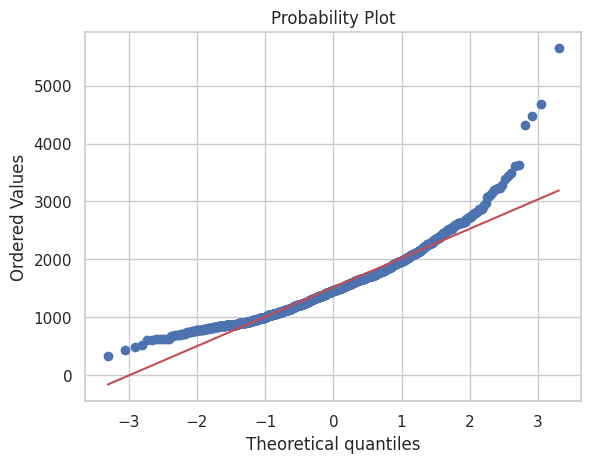

In [ ]:
sns.distplot(train_df['GrLivArea'],fit=norm)
figure=plt.figure()
qq=stats.probplot(train_df['GrLivArea'],plot=plt);

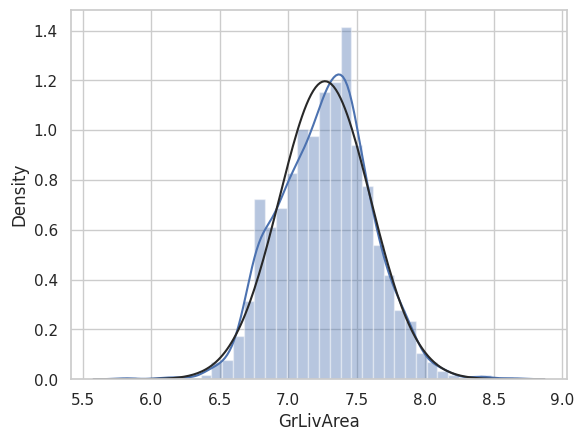

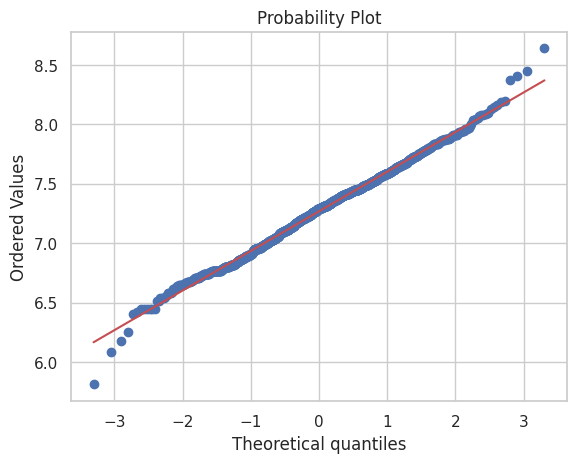

In [ ]:
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])
sns.distplot(train_df['GrLivArea'],fit=norm)
figure = plt.figure()
stats.probplot(train_df['GrLivArea'],plot=plt);

### GarageYrBlt

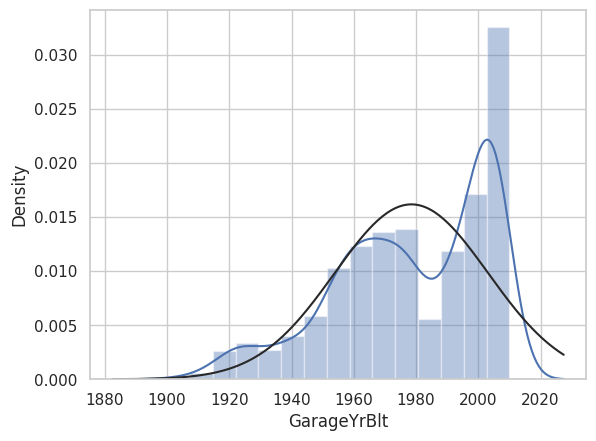

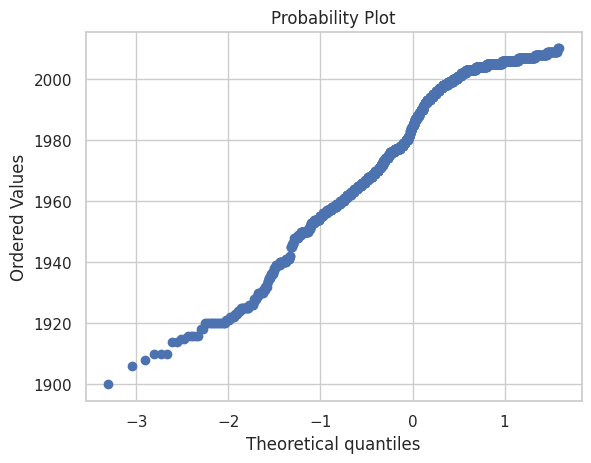

In [ ]:
sns.distplot(train_df['GarageYrBlt'],fit=norm)
figure = plt.figure()
stats.probplot(train_df['GarageYrBlt'],plot=plt);

In [ ]:
z = np.log(train_df['GarageYrBlt'])

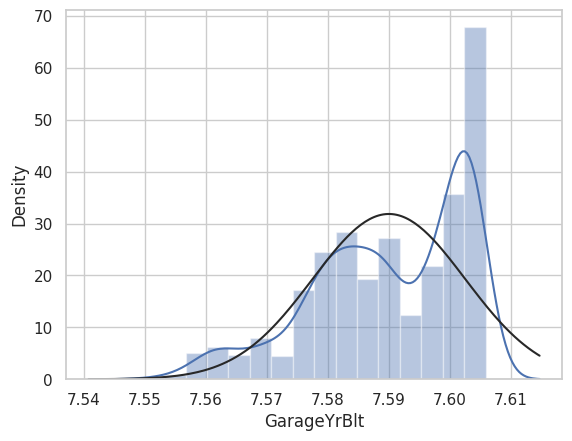

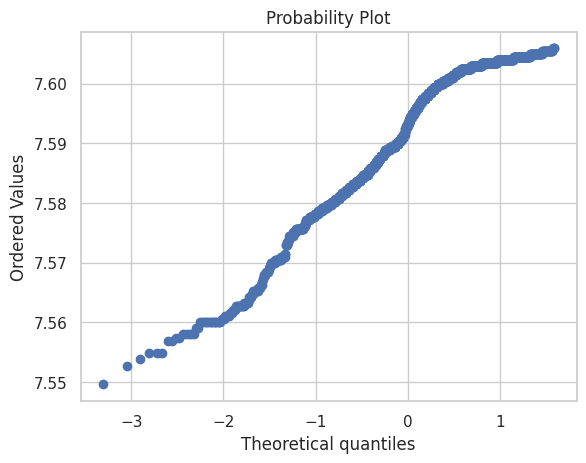

In [ ]:
sns.distplot(z,fit=norm)
figure = plt.figure()
stats.probplot(z,plot=plt);

# Data preprocessing

## NAN

### Float columns

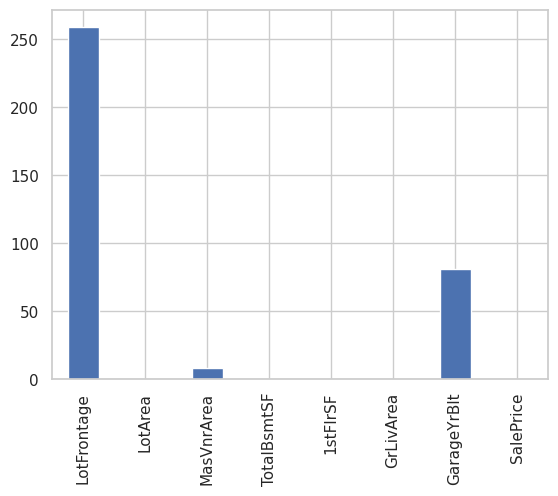

In [ ]:
float_columns = list(train_df.select_dtypes(include=float).columns)
train_df[float_columns].isna().sum().plot(kind='bar')
float_columns.remove('SalePrice')

<Axes: >

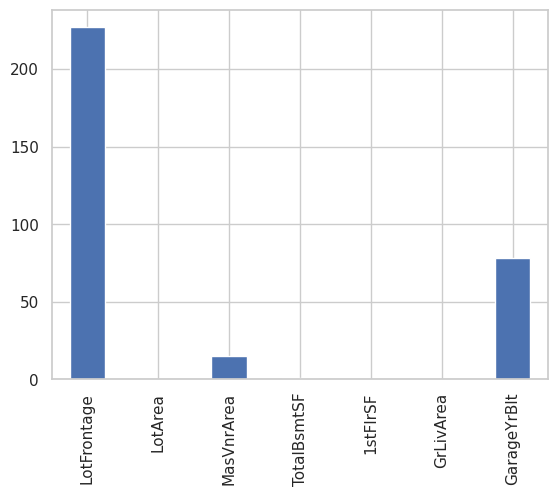

In [ ]:
test_df[float_columns].isna().sum().plot(kind='bar')

In [ ]:
def na_fill(df):
    for i in float_columns:
        df[i].fillna(df[i].mode()[0],inplace = True)

In [ ]:
na_fill(train_df)
na_fill(test_df)

In [ ]:
print('train:')
print(train_df[float_columns].isna().sum())
print('-'*100)
print('test:')
print(test_df[float_columns].isna().sum())

train:
LotFrontage    0
LotArea        0
MasVnrArea     0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
dtype: int64
----------------------------------------------------------------------------------------------------
test:
LotFrontage    0
LotArea        0
MasVnrArea     0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
dtype: int64


### object columns


In [ ]:
object_columns = train_df.select_dtypes(include = object).columns
print('Train_df numbers of NA:')
na_float_train = []
for i in object_columns:
    if train_df[i].isna().sum()>0:
        print(i,':',train_df[i].isna().sum())
        na_float_train.append(i)


print('-'*100)
print('Test_df numbers of NA')

na_float_test = []
for i in object_columns:
    if test_df[i].isna().sum()>0:
        print(i,':',test_df[i].isna().sum())
        na_float_test.append(i)

Train_df numbers of NA:
MasVnrType : 8
Electrical : 1
----------------------------------------------------------------------------------------------------
Test_df numbers of NA
MSZoning : 4
Utilities : 2
Exterior1st : 1
Exterior2nd : 1
MasVnrType : 16
KitchenQual : 1
Functional : 2
SaleType : 1


In [ ]:
for i in na_float_train:
    train_df[i].fillna(train_df[i].mode()[0],inplace = True)

for i in na_float_test:
    test_df[i].fillna(test_df[i].mode()[0],inplace = True)

In [ ]:
print('Train: ')
print(train_df[object_columns].isna().sum().sum())
print('Test: ')
print(test_df[object_columns].isna().sum().sum())

Train: 
0
Test: 
0


### int columns

In [ ]:
int_columns = train_df.select_dtypes(include = int).columns
acu0 = 0
acu1 = 0
for i in int_columns:
    if train_df[i].isna().sum()>0:
        acu0+=1
        print(i,':',train_df[i].isna().sum())
if acu0 == 0:
    print('Zero NaN in train_df')

print('-'*100)
print('test_df:')
for i in int_columns:
    if i!='SalePrice':
        if test_df[i].isna().sum()>0:
            print(i,':',test_df[i].isna().sum())
            acu1+=1
if acu1 == 0:
    print('Zero NaN in test_df')

Zero NaN in train_df
----------------------------------------------------------------------------------------------------
test_df:
BsmtFinSF1 : 1
BsmtFinSF2 : 1
BsmtUnfSF : 1
BsmtFullBath : 2
BsmtHalfBath : 2
GarageCars : 1
GarageArea : 1
totbathroom : 2


In [ ]:
for i in int_columns:
    if i!='SalePrice':
        if test_df[i].isna().sum()>0:
            test_df[i].fillna(test_df[i].mode()[0],inplace = True)

In [ ]:
acu0=0
for i in int_columns:
    if i!='SalePrice':
        if test_df[i].isna().sum()>0:
            print(i,':',test_df[i].isna().sum())
            acu1+=1
if acu0 == 0:
    print('Zero NaN in test_df')

Zero NaN in test_df


In [ ]:
#In general
print(train_df.isna().sum().sum())
print(test_df.isna().sum().sum())

0
0


## Encoded feature

In [ ]:
#Ordinal list
ord_list = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual',
            'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','HeatingQC','Electrical','KitchenQual','FireplaceQu',
            'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',
            'Fence','Utilities','Functional'
            ]
#Categorical list
cat_list = ['MSSubClass','MSZoning','Street','Alley','LandContour',
            'LotConfig','Neighborhood','Condition1','Condition2',
            'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
            'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
            'GarageType','MiscFeature','SaleType','SaleCondition'
            ]

In [ ]:
#Colum MSSubClass will not get enconded if his values are numerical
d=  {20:'1-STORY 1946 & NEWER ALL STYLES',
    30:	'1-STORY 1945 & OLDER',
    40:	'1-STORY W/FINISHED ATTIC ALL AGES',
    45:	'1-1/2 STORY - UNFINISHED ALL AGES',
    50:	'1-1/2 STORY FINISHED ALL AGES',
    60:	'2-STORY 1946 & NEWER',
    70:	'2-STORY 1945 & OLDER',
    75:	'2-1/2 STORY ALL AGES',
    80:	'SPLIT OR MULTI-LEVEL',
    85:	'SPLIT FOYER',
    90:	'DUPLEX - ALL STYLES AND AGES',
    120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150:'1-1/2 STORY PUD - ALL AGES',
    160:'2-STORY PUD - 1946 & NEWER',
    180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}


In [ ]:
train_df['MSSubClass'].replace(d,inplace=True)
test_df['MSSubClass'].replace(d,inplace=True)

## Ordinal Encoded

In [ ]:
ordinal_encoder = OrdinalEncoder()
train_df[ord_list] = ordinal_encoder.fit_transform(train_df[ord_list])
test_df[ord_list] = ordinal_encoder.fit_transform(test_df[ord_list])

In [ ]:
train_df[ord_list].head()

LotShape  LandSlope  OverallQual  OverallCond  ExterQual  ExterCond  \
0       3.0        0.0          6.0          4.0        2.0        4.0   
1       3.0        0.0          5.0          7.0        3.0        4.0   
2       0.0        0.0          6.0          4.0        2.0        4.0   
3       0.0        0.0          6.0          4.0        3.0        4.0   
4       0.0        0.0          7.0          4.0        2.0        4.0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  \
0       2.0       4.0           4.0           2.0           6.0        0.0   
1       2.0       4.0           1.0           0.0           6.0        0.0   
2       2.0       4.0           2.0           2.0           6.0        0.0   
3       4.0       1.0           4.0           0.0           6.0        2.0   
4       2.0       4.0           0.0           2.0           6.0        0.0   

   Electrical  KitchenQual  FireplaceQu  GarageFinish  GarageQual  GarageCond  \
0         4.0          2.0          3.0           2.0         5.0         5.0   
1         4.0          3.0          5.0           2.0         5.0         5.0   
2         4.0          2.0          5.0           2.0         5.0         5.0   
3         4.0          2.0          2.0           3.0         5.0         5.0   
4         4.0          2.0          5.0           2.0         5.0         5.0   

   PavedDrive  PoolQC  Fence  Utilities  Functional  
0         2.0     3.0    4.0        0.0         6.0  
1         2.0     3.0    4.0        0.0         6.0  
2         2.0     3.0    4.0        0.0         6.0  
3         2.0     3.0    4.0        0.0         6.0  
4         2.0     3.0    4.0        0.0         6.0

In [ ]:
test_df[ord_list].head()

LotShape  LandSlope  OverallQual  OverallCond  ExterQual  ExterCond  \
0       3.0        0.0          4.0          5.0        3.0        4.0   
1       0.0        0.0          5.0          5.0        3.0        4.0   
2       0.0        0.0          4.0          4.0        3.0        4.0   
3       0.0        0.0          5.0          5.0        3.0        4.0   
4       0.0        0.0          7.0          4.0        2.0        4.0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  \
0       4.0       4.0           4.0           5.0           3.0        4.0   
1       4.0       4.0           4.0           0.0           6.0        4.0   
2       2.0       4.0           4.0           2.0           6.0        2.0   
3       4.0       4.0           4.0           2.0           6.0        0.0   
4       2.0       4.0           4.0           0.0           6.0        0.0   

   Electrical  KitchenQual  FireplaceQu  GarageFinish  GarageQual  GarageCond  \
0         3.0          3.0          3.0           3.0         4.0         5.0   
1         3.0          2.0          3.0           3.0         4.0         5.0   
2         3.0          3.0          5.0           0.0         4.0         5.0   
3         3.0          2.0          2.0           0.0         4.0         5.0   
4         3.0          2.0          3.0           2.0         4.0         5.0   

   PavedDrive  PoolQC  Fence  Utilities  Functional  
0         2.0     2.0    2.0        0.0         6.0  
1         2.0     2.0    4.0        0.0         6.0  
2         2.0     2.0    2.0        0.0         6.0  
3         2.0     2.0    4.0        0.0         6.0  
4         2.0     2.0    4.0        0.0         6.0

In [ ]:
train_df[ord_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      1460 non-null   float64
 1   LandSlope     1460 non-null   float64
 2   OverallQual   1460 non-null   float64
 3   OverallCond   1460 non-null   float64
 4   ExterQual     1460 non-null   float64
 5   ExterCond     1460 non-null   float64
 6   BsmtQual      1460 non-null   float64
 7   BsmtCond      1460 non-null   float64
 8   BsmtExposure  1460 non-null   float64
 9   BsmtFinType1  1460 non-null   float64
 10  BsmtFinType2  1460 non-null   float64
 11  HeatingQC     1460 non-null   float64
 12  Electrical    1460 non-null   float64
 13  KitchenQual   1460 non-null   float64
 14  FireplaceQu   1460 non-null   float64
 15  GarageFinish  1460 non-null   float64
 16  GarageQual    1460 non-null   float64
 17  GarageCond    1460 non-null   float64
 18  PavedDrive    1460 non-null 

In [ ]:
test_df[ord_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      1459 non-null   float64
 1   LandSlope     1459 non-null   float64
 2   OverallQual   1459 non-null   float64
 3   OverallCond   1459 non-null   float64
 4   ExterQual     1459 non-null   float64
 5   ExterCond     1459 non-null   float64
 6   BsmtQual      1459 non-null   float64
 7   BsmtCond      1459 non-null   float64
 8   BsmtExposure  1459 non-null   float64
 9   BsmtFinType1  1459 non-null   float64
 10  BsmtFinType2  1459 non-null   float64
 11  HeatingQC     1459 non-null   float64
 12  Electrical    1459 non-null   float64
 13  KitchenQual   1459 non-null   float64
 14  FireplaceQu   1459 non-null   float64
 15  GarageFinish  1459 non-null   float64
 16  GarageQual    1459 non-null   float64
 17  GarageCond    1459 non-null   float64
 18  PavedDrive    1459 non-null 

## One Hot Enconder

In [ ]:
train_df = train_df.join(pd.get_dummies(train_df[cat_list]))
test_df = test_df.join(pd.get_dummies(test_df[cat_list]))

In [ ]:
train_df.head()

Id                       MSSubClass MSZoning  LotFrontage     LotArea  \
0   1             2-STORY 1946 & NEWER       RL         65.0   91.923882   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0   97.979590   
2   3             2-STORY 1946 & NEWER       RL         68.0  106.066017   
3   4             2-STORY 1945 & OLDER       RL         60.0   97.724101   
4   5             2-STORY 1946 & NEWER       RL         84.0  119.415242   

  Street Alley  LotShape LandContour  Utilities LotConfig  LandSlope  \
0   Pave  N AC       3.0         Lvl        0.0    Inside        0.0   
1   Pave  N AC       3.0         Lvl        0.0       FR2        0.0   
2   Pave  N AC       0.0         Lvl        0.0    Inside        0.0   
3   Pave  N AC       0.0         Lvl        0.0    Corner        0.0   
4   Pave  N AC       0.0         Lvl        0.0       FR2        0.0   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0      CollgCr       Norm       Norm     1Fam     2Story          6.0   
1      Veenker      Feedr       Norm     1Fam     1Story          5.0   
2      CollgCr       Norm       Norm     1Fam     2Story          6.0   
3      Crawfor       Norm       Norm     1Fam     2Story          6.0   
4      NoRidge       Norm       Norm     1Fam     2Story          7.0   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0          4.0       2003          2003     Gable  CompShg     VinylSd   
1          7.0       1976          1976     Gable  CompShg     MetalSd   
2          4.0       2001          2002     Gable  CompShg     VinylSd   
3          4.0       1915          1970     Gable  CompShg     Wd Sdng   
4          4.0       2000          2000     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  \
0     VinylSd    BrkFace       196.0        2.0        4.0      PConc   
1     MetalSd       None         0.0        3.0        4.0     CBlock   
2     VinylSd    BrkFace       162.0        2.0        4.0      PConc   
3     Wd Shng       None         0.0        3.0        4.0     BrkTil   
4     VinylSd    BrkFace       350.0        2.0        4.0      PConc   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0       2.0       4.0           4.0           2.0         706           6.0   
1       2.0       4.0           1.0           0.0         978           6.0   
2       2.0       4.0           2.0           2.0         486           6.0   
3       4.0       1.0           4.0           0.0         216           6.0   
4       2.0       4.0           0.0           2.0         655           6.0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir  \
0           0        150     6.752270    GasA        0.0          Y   
1           0        284     7.140453    GasA        0.0          Y   
2           0        434     6.824374    GasA        0.0          Y   
3           0        540     6.628041    GasA        2.0          Y   
4           0        490     7.043160    GasA        0.0          Y   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         4.0  6.752270       854             0   7.444249             1   
1         4.0  7.140453         0             0   7.140453             0   
2         4.0  6.824374       866             0   7.487734             1   
3         4.0  6.867974       756             0   7.448334             1   
4         4.0  7.043160      1053             0   7.695303             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1          2.0   
1             1         2         0             3             1          3.0   
2             0         2         1             3             1          2.0   
3             0         1         0             3             1          2.0   
4             0         2      

In [ ]:
test_df.head()

Id                                         MSSubClass MSZoning  \
0  1461                    1-STORY 1946 & NEWER ALL STYLES       RH   
1  1462                    1-STORY 1946 & NEWER ALL STYLES       RL   
2  1463                               2-STORY 1946 & NEWER       RL   
3  1464                               2-STORY 1946 & NEWER       RL   
4  1465  1-STORY PUD (Planned Unit Development) - 1946 ...       RL   

   LotFrontage  LotArea Street Alley  LotShape LandContour  Utilities  \
0         80.0    11622   Pave  N AC       3.0         Lvl        0.0   
1         81.0    14267   Pave  N AC       0.0         Lvl        0.0   
2         74.0    13830   Pave  N AC       0.0         Lvl        0.0   
3         78.0     9978   Pave  N AC       0.0         Lvl        0.0   
4         43.0     5005   Pave  N AC       0.0         HLS        0.0   

  LotConfig  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside        0.0        NAmes      Feedr       Norm     1Fam     1Story   
1    Corner        0.0        NAmes       Norm       Norm     1Fam     1Story   
2    Inside        0.0      Gilbert       Norm       Norm     1Fam     2Story   
3    Inside        0.0      Gilbert       Norm       Norm     1Fam     2Story   
4    Inside        0.0      StoneBr       Norm       Norm   TwnhsE     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0          4.0          5.0       1961          1961     Gable  CompShg   
1          5.0          5.0       1958          1958       Hip  CompShg   
2          4.0          4.0       1997          1998     Gable  CompShg   
3          5.0          5.0       1998          1998     Gable  CompShg   
4          7.0          4.0       1992          1992     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     VinylSd     VinylSd       None         0.0        3.0        4.0   
1     Wd Sdng     Wd Sdng    BrkFace       108.0        3.0        4.0   
2     VinylSd     VinylSd       None         0.0        3.0        4.0   
3     VinylSd     VinylSd    BrkFace        20.0        3.0        4.0   
4     HdBoard     HdBoard       None         0.0        2.0        4.0   

  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0     CBlock       4.0       4.0           4.0           5.0       468.0   
1     CBlock       4.0       4.0           4.0           0.0       923.0   
2      PConc       2.0       4.0           4.0           2.0       791.0   
3      PConc       4.0       4.0           4.0           2.0       602.0   
4      PConc       2.0       4.0           4.0           0.0       263.0   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0           3.0       144.0      270.0        882.0    GasA        4.0   
1           6.0         0.0      406.0       1329.0    GasA        4.0   
2           6.0         0.0      137.0        928.0    GasA        2.0   
3           6.0         0.0      324.0        926.0    GasA        0.0   
4           6.0         0.0     1017.0       1280.0    GasA        0.0   

  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y         3.0       896         0             0        896   
1          Y         3.0      1329         0             0       1329   
2          Y         3.0       928       701             0       1629   
3          Y         3.0       926       678             0       1604   
4          Y         3.0      1280         0             0       1280   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.0           0.0         1         0             2             1   
1           0.0           0.0         1         1             3             1   
2           0.0           0.0         2         1             3             1   
3           0.0           0.0         2         1             3             1   
4         

In [ ]:
train_df.drop(columns = cat_list,inplace = True)
test_df.drop(columns = cat_list, inplace = True)

In [ ]:
train_columns = list(train_df.columns)
test_columns = list(test_df.columns)
l = []
for i in train_columns:
    if i not in test_columns and i!='SalePrice':
        l.append(i)
l

['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'MiscFeature_TenC']

In [ ]:
for i in l:
    print(train_df[i].value_counts())
    print('__'*100)

0    1459
1       1
Name: Condition2_RRAe, dtype: int64
________________________________________________________________________________________________________________________________________________________________________________________________________
0    1459
1       1
Name: Condition2_RRAn, dtype: int64
________________________________________________________________________________________________________________________________________________________________________________________________________
0    1458
1       2
Name: Condition2_RRNn, dtype: int64
________________________________________________________________________________________________________________________________________________________________________________________________________
0    1452
1       8
Name: HouseStyle_2.5Fin, dtype: int64
___________________________________________________________________________________________________________________________________________________________________________

* these columns don't offer a nice distribution of values

In [ ]:
train_df.drop(columns=l,inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 236 entries, Id to SaleCondition_Partial
dtypes: float64(31), int64(40), uint8(165)
memory usage: 1.0 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 236 entries, Id to SaleCondition_Partial
dtypes: float64(35), int64(35), uint8(166)
memory usage: 1.0 MB


# Model Building

## Information gain

In [ ]:
#### Int64 and float
Xintfloat = train_df.select_dtypes(include=[int,float]).drop(columns='SalePrice')
y = train_df['SalePrice']

In [ ]:
def mi_scores(X,y):
    scores_mi = mutual_info_regression(X,y)
    scores_mi = pd.DataFrame(scores_mi,columns=['Mi'],index = X.columns)
    scores_mi = scores_mi.sort_values(by='Mi',ascending = False)
    return (scores_mi)

In [ ]:
features_intfloat_MI = mi_scores(Xintfloat,y)
features_intfloat_MI

Mi
Total_Internal_Area  0.770177
OverallQual          0.576372
GrLivArea            0.476199
GarageCars           0.370814
GarageArea           0.361148
YearBuilt            0.351657
TotalBsmtSF          0.343645
period_no_sold       0.339516
BsmtQual             0.333523
ExterQual            0.329364
KitchenQual          0.326209
totbathroom          0.319821
1stFlrSF             0.300082
FullBath             0.266188
GarageFinish         0.261516
GarageYrBlt          0.242805
YearRemodAdd         0.236774
TotRmsAbvGrd         0.229370
FireplaceQu          0.215320
2ndFlrSF             0.198359
LotArea              0.186078
Fireplaces           0.176902
LotFrontage          0.168117
HeatingQC            0.165786
OpenPorchSF          0.154444
BsmtFinType1         0.143930
BsmtFinSF1           0.140873
BsmtUnfSF            0.125545
OverallCond          0.110525
Yard                 0.108343
Total_Porch_Area     0.104384
WoodDeckSF           0.094499
MasVnrArea           0.088040
LotShape             0.086944
HalfBath             0.084489
BsmtExposure         0.081336
BedroomAbvGr         0.077600
GarageCond           0.074164
Hasporch_area        0.070580
Has_MasVnrArea       0.069606
GarageQual           0.066747
has_wooddeck         0.061886
BsmtCond             0.054623
Electrical           0.051636
PavedDrive           0.047284
Fence                0.044585
BsmtFullBath         0.030083
BsmtFinType2         0.029128
HasBasement          0.028424
EnclosedPorch        0.024875
KitchenAbvGr         0.023649
hasbsmttype1         0.023395
ExterCond            0.021419
BsmtHalfBath         0.018224
ScreenPorch          0.016963
Has_Sencond_Floor    0.010868
BsmtFinSF2           0.009097
2_bigger_1floor      0.005336
LowQualFinSF         0.004579
PoolQC               0.003953
YrSold               0.003703
MiscVal              0.002744
LandSlope            0.002332
Functional           0.001162
hasbsmttype2         0.000000
MoSold               0.000000
PoolArea             0.000000
3SsnPorch            0.000000
Utilities            0.000000
Id                   0.000000

In [ ]:
l0=[]
for i in features_intfloat_MI.index:
    if features_intfloat_MI.loc[i][0]>=0.01:
        l0.append(i)
print(l0)

['Total_Internal_Area', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'period_no_sold', 'BsmtQual', 'ExterQual', 'KitchenQual', 'totbathroom', '1stFlrSF', 'FullBath', 'GarageFinish', 'GarageYrBlt', 'YearRemodAdd', 'TotRmsAbvGrd', 'FireplaceQu', '2ndFlrSF', 'LotArea', 'Fireplaces', 'LotFrontage', 'HeatingQC', 'OpenPorchSF', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'OverallCond', 'Yard', 'Total_Porch_Area', 'WoodDeckSF', 'MasVnrArea', 'LotShape', 'HalfBath', 'BsmtExposure', 'BedroomAbvGr', 'GarageCond', 'Hasporch_area', 'Has_MasVnrArea', 'GarageQual', 'has_wooddeck', 'BsmtCond', 'Electrical', 'PavedDrive', 'Fence', 'BsmtFullBath', 'BsmtFinType2', 'HasBasement', 'EnclosedPorch', 'KitchenAbvGr', 'hasbsmttype1', 'ExterCond', 'BsmtHalfBath', 'ScreenPorch', 'Has_Sencond_Floor']


In [ ]:
#####uint8

In [ ]:
Xuint = train_df.select_dtypes(include='uint8')
features_uint_MI = mi_scores(Xuint,y)
features_uint_MI

Mi
Foundation_PConc                                    0.182403
MSSubClass_2-STORY 1946 & NEWER                     0.121910
GarageType_Attchd                                   0.116236
GarageType_Detchd                                   0.100544
Foundation_CBlock                                   0.098929
Exterior2nd_VinylSd                                 0.090493
Exterior1st_VinylSd                                 0.082498
SaleType_New                                        0.077792
SaleCondition_Partial                               0.074175
MasVnrType_None                                     0.073287
MSSubClass_1-STORY 1945 & OLDER                     0.073001
Neighborhood_NAmes                                  0.072847
MSZoning_RM                                         0.071516
Neighborhood_NridgHt                                0.067669
CentralAir_N                                        0.064335
CentralAir_Y                                        0.060782
MasVnrType_Stone                                    0.055612
GarageType_NG                                       0.053846
Neighborhood_NoRidge                                0.052976
MSZoning_RL                                         0.046233
Neighborhood_Somerst                                0.043119
HouseStyle_2Story                                   0.042189
Neighborhood_Gilbert                                0.041238
Neighborhood_CollgCr                                0.040330
SaleType_WD                                         0.039385
MasVnrType_BrkFace                                  0.034969
Foundation_BrkTil                                   0.031635
MSZoning_FV                                         0.030258
Neighborhood_OldTown                                0.028023
Neighborhood_NWAmes                                 0.026309
GarageType_BuiltIn                                  0.025900
SaleCondition_Normal                                0.025644
Neighborhood_IDOTRR                                 0.025638
Exterior2nd_Wd Sdng                                 0.025613
RoofStyle_Gable                                     0.025317
RoofStyle_Hip                                       0.024073
Neighborhood_Sawyer                                 0.024016
MSSubClass_DUPLEX - ALL STYLES AND AGES             0.023667
LotConfig_CulDSac                                   0.022945
HouseStyle_1.5Fin                                   0.022777
Neighborhood_Edwards                                0.022677
Exterior2nd_MetalSd                                 0.022515
BldgType_Duplex                                     0.022254
MSSubClass_2-STORY PUD - 1946 & NEWER               0.021575
Exterior1st_Wd Sdng                                 0.021125
BldgType_1Fam                                       0.020099
MSSubClass_1-1/2 STORY FINISHED ALL AGES            0.019614
Exterior1st_HdBoard                                 0.018581
LandContour_Bnk                                     0.017830
Exterior1st_MetalSd                                 0.017661
MSSubClass_SPLIT OR MULTI-LEVEL                     0.017625
Exterior2nd_HdBoard                                 0.017313
Neighborhood_MeadowV                                0.016382
Neighborhood_BrDale                                 0.016173
Neighborhood_BrkSide                                0.016151
Foundation_Slab                                     0.015787
Exterior2nd_CmentBd                                 0.015338
LotConfig_Inside                                    0.015138
Street_Pave                                         0.014707
HouseStyle_SLvl                                     0.014583
Alley_Grvl                                          0.014509
Exterior1st_CemntBd                                 0.014316
Condition1_Artery                                   0.013601
Neighborhood_Blmngtn                                0.012981
MSSubClass_1-STORY PUD (Planned Unit Developmen...  0.012724
LandContour_Lvl                 

In [ ]:
l1=[]
for i in features_uint_MI.index:
    if features_uint_MI.loc[i][0]>0:
        l1.append(i)
print(l1)

['Foundation_PConc', 'MSSubClass_2-STORY 1946 & NEWER', 'GarageType_Attchd', 'GarageType_Detchd', 'Foundation_CBlock', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'SaleType_New', 'SaleCondition_Partial', 'MasVnrType_None', 'MSSubClass_1-STORY 1945 & OLDER', 'Neighborhood_NAmes', 'MSZoning_RM', 'Neighborhood_NridgHt', 'CentralAir_N', 'CentralAir_Y', 'MasVnrType_Stone', 'GarageType_NG', 'Neighborhood_NoRidge', 'MSZoning_RL', 'Neighborhood_Somerst', 'HouseStyle_2Story', 'Neighborhood_Gilbert', 'Neighborhood_CollgCr', 'SaleType_WD', 'MasVnrType_BrkFace', 'Foundation_BrkTil', 'MSZoning_FV', 'Neighborhood_OldTown', 'Neighborhood_NWAmes', 'GarageType_BuiltIn', 'SaleCondition_Normal', 'Neighborhood_IDOTRR', 'Exterior2nd_Wd Sdng', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Neighborhood_Sawyer', 'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'LotConfig_CulDSac', 'HouseStyle_1.5Fin', 'Neighborhood_Edwards', 'Exterior2nd_MetalSd', 'BldgType_Duplex', 'MSSubClass_2-STORY PUD - 1946 & NEWER', 'Exterior1st_Wd

## SalePrice correlations


In [ ]:
corr = abs(train_df.corr())['SalePrice'].sort_values(ascending=False)
corr.to_frame()

SalePrice
SalePrice                                            1.000000
OverallQual                                          0.817184
Total_Internal_Area                                  0.811430
GrLivArea                                            0.730255
GarageCars                                           0.680625
totbathroom                                          0.657798
GarageArea                                           0.650888
1stFlrSF                                             0.608947
FullBath                                             0.594771
Age                                                  0.587290
YearBuilt                                            0.586570
ExterQual                                            0.582163
BsmtQual                                             0.576968
YearRemodAdd                                         0.565608
TotRmsAbvGrd                                         0.534422
KitchenQual                                          0.534386
Foundation_PConc                                     0.530840
Fireplaces                                           0.489449
MasVnrArea                                           0.426775
HeatingQC                                            0.425906
GarageFinish                                         0.417404
GarageType_Attchd                                    0.415787
GarageYrBlt                                          0.406004
MSSubClass_2-STORY 1946 & NEWER                      0.401500
Has_MasVnrArea                                       0.389868
GarageType_Detchd                                    0.388638
MasVnrType_None                                      0.387818
TotalBsmtSF                                          0.373009
BsmtFinSF1                                           0.372023
LotArea                                              0.367406
Neighborhood_NridgHt                                 0.351802
CentralAir_N                                         0.351600
CentralAir_Y                                         0.351600
MSZoning_RM                                          0.347446
Foundation_CBlock                                    0.337815
Exterior2nd_VinylSd                                  0.337444
Exterior1st_VinylSd                                  0.336138
WoodDeckSF                                           0.334135
MSSubClass_1-STORY 1945 & OLDER                      0.329212
SaleType_New                                         0.329190
SaleCondition_Partial                                0.324471
GarageCond                                           0.323691
LotFrontage                                          0.323534
GarageType_NG                                        0.322999
Hasporch_area                                        0.322133
OpenPorchSF                                          0.321053
has_wooddeck                                         0.320349
2ndFlrSF                                             0.319300
HalfBath                                             0.313982
MasVnrType_Stone                                     0.311369
PavedDrive                                           0.304688
MSZoning_RL                                          0.298862
Electrical                                           0.294400
LotShape                                             0.278091
Neighborhood_NoRidge                                 0.277523
BsmtExposure                                         0.277372
GarageQual                                           0.275692
HouseStyle_2Story                                    0.263046
Foundation_BrkTil                                    0.251700
Yard                                                 0.236781
BsmtFullBath                                         0.236224
Neighborhood_IDOTRR                                  0.233067
Neighborhood_OldTown                                 0.232243
MasVnrType_BrkFace                                   0.231447
GarageType_BuiltIn    

## Spliting data

In [ ]:
l=[]
l = l0+l1

In [ ]:
X = train_df[l]

y = train_df['SalePrice']

In [ ]:
print(X.shape)
X.head()

(1460, 182)


Total_Internal_Area  OverallQual  GrLivArea  GarageCars  GarageArea  \
0                 3114          6.0   7.444249           2         548   
1                 2984          5.0   7.140453           2         460   
2                 3314          6.0   7.487734           2         608   
3                 3115          6.0   7.448334           3         642   
4                 4179          7.0   7.695303           3         836   

   YearBuilt  TotalBsmtSF  period_no_sold  BsmtQual  ExterQual  KitchenQual  \
0       2003     6.752270               5       2.0        2.0          2.0   
1       1976     7.140453              31       2.0        3.0          3.0   
2       2001     6.824374               7       2.0        2.0          2.0   
3       1915     6.628041              91       4.0        3.0          2.0   
4       2000     7.043160               8       2.0        2.0          2.0   

   totbathroom  1stFlrSF  FullBath  GarageFinish  GarageYrBlt  YearRemodAdd  \
0            4  6.752270         2           2.0       2003.0          2003   
1            3  7.140453         2           2.0       1976.0          1976   
2            4  6.824374         2           2.0       2001.0          2002   
3            2  6.867974         1           3.0       1998.0          1970   
4            4  7.043160         2           2.0       2000.0          2000   

   TotRmsAbvGrd  FireplaceQu  2ndFlrSF     LotArea  Fireplaces  LotFrontage  \
0             8          3.0       854   91.923882           0         65.0   
1             6          5.0         0   97.979590           1         80.0   
2             6          5.0       866  106.066017           1         68.0   
3             7          2.0       756   97.724101           1         60.0   
4             9          5.0      1053  119.415242           1         84.0   

   HeatingQC  OpenPorchSF  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  OverallCond  \
0        0.0           61           2.0         706        150          4.0   
1        0.0            0           0.0         978        284          7.0   
2        0.0           42           2.0         486        434          4.0   
3        2.0           35           0.0         216        540          4.0   
4        0.0           84           2.0         655        490          4.0   

    Yard  Total_Porch_Area  WoodDeckSF  MasVnrArea  LotShape  HalfBath  \
0   7594                61           0       196.0       3.0         1   
1   8338                 0         298         0.0       3.0         0   
2  10330                42           0       162.0       0.0         1   
3   8589               307           0         0.0       0.0         0   
4  13115                84         192       350.0       0.0         1   

   BsmtExposure  BedroomAbvGr  GarageCond  Hasporch_area  Has_MasVnrArea  \
0           4.0             3         5.0              1               1   
1           1.0             3         5.0              0               0   
2           2.0             3         5.0              1               1   
3           4.0             3         5.0              1               0   
4           0.0             4         5.0              1               1   

   GarageQual  has_wooddeck  BsmtCond  Electrical  PavedDrive  Fence  \
0         5.0             0       4.0         4.0         2.0    4.0   
1         5.0             1       4.0         4.0         2.0    4.0   
2         5.0             0       4.0         4.0         2.0    4.0   
3         5.0             0       1.0         4.0         2.0    4.0   
4         5.0             1       4.0         4.0         2.0    4.0   

   BsmtFullBath  BsmtFinType2  HasBasement  EnclosedPorch  KitchenAbvGr  \
0             1           6.0            1              0             1   
1             0           6.0            1              0             1   
2             1           6.0            1              0             1   
3             1        

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(1168, 182) (292, 182)
(1168,) (292,)



## Validation model

In [ ]:
training_score = []
test_score = []

def models_validation(model):
    model.fit(X_train,y_train)
    p_train = np.exp(model.predict(X_train))
    p_test = np.exp(model.predict(X_test))
    RMSE_train = np.sqrt(mean_squared_error(p_train,np.exp(y_train)))
    RMSE_test = np.sqrt(mean_squared_error(p_test,np.exp(y_test)))
    training_score.append(RMSE_train)
    test_score.append(RMSE_test)
    print('train:',RMSE_train)
    print('test:',RMSE_test)

In [ ]:
models_validation(DecisionTreeRegressor())

train: 1.1799927656529808e-11
test: 36048.681573938025


In [ ]:
models_validation(AdaBoostRegressor())

train: 29245.615902274396
test: 37129.36883271157


In [ ]:
models_validation(RandomForestRegressor())

train: 11817.65058140195
test: 31018.9429464248


In [ ]:
models_validation(GradientBoostingRegressor())

train: 14520.184358072886
test: 26974.92371971532


In [ ]:
models_validation(LGBMRegressor())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3828
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 144
[LightGBM] [Info] Start training from score 12.030652
train: 9811.705998387535
test: 28566.67377230388


In [ ]:
models_validation(XGBRegressor())

train: 936.2846652242096
test: 29711.875223920444


In [ ]:
a = ['DecisionTree','AdaBoost','RandomForest','LGBMRegressor','GradientBoosting','XGBRegressor']
df = pd.DataFrame({'algorithms':a,
                  'training_score':training_score,
                  'test_score':test_score})
df

algorithms  training_score    test_score
0      DecisionTree    1.179993e-11  38475.320745
1          AdaBoost    2.905316e+04  36767.982869
2      RandomForest    1.187050e+04  31814.603685
3     LGBMRegressor    1.528336e+04  27711.092065
4  GradientBoosting    1.136319e+04  31997.676096
5      XGBRegressor    1.028385e+03  28479.735663

## hyperparam for each ml algorithm


### RandomForest

In [ ]:
model1 = RandomForestRegressor()
parameters1 = {
                "n_estimators": [200,400,600],
                "max_depth": [5,10,20],
                "min_samples_split": [2, 5,10],
                "min_samples_leaf": [5,7,10],
                }

In [ ]:
grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

In [ ]:
grid_search1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 7, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600]})

In [ ]:
grid_search1.best_score_

0.8692764496228268

In [ ]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 600}

In [ ]:
best_parameters1 ={'max_depth': 10,
                   'min_samples_leaf': 5,
                   'min_samples_split': 2,
                   'n_estimators': 600}

In [ ]:
#Testing model with best hyper parameters

In [ ]:
model1 = RandomForestRegressor(**best_parameters1).fit(X_train,y_train)
rf_predtrain = model.predict(X_train)
rf_predtest = model.predict(X_test)
print('train Rmse:',np.sqrt(mean_squared_error(rf_predtrain,y_train)))
print('test Rmse:',np.sqrt(mean_squared_error(rf_predtest,y_test)))

train Rmse: 0.004864233727410756
test Rmse: 0.1364169586682291


### LGBMRegressor

In [ ]:
model2 = LGBMRegressor()
parameters2 = {
     "n_estimators": [10, 100, 1000],
    "learning_rate": [0.01, 0.1, 1.0],
    "num_leaves": [32, 64, 128],
    "max_depth": [3, 5, 7],
    "min_data_in_leaf": [10, 20, 50]
               }

In [ ]:
grid_search2 = GridSearchCV(model2,parameters2,cv=5,n_jobs=-1)

In [ ]:
grid_search2.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4021
[LightGBM] [Info] Number of data points in the train set: 1145, number of used features: 98
[LightGBM] [Info] Start training from score 12.029355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7],
                         'min_data_in_leaf': [10, 20, 50],
                         'n_estimators': [10, 100, 1000],
                         'num_leaves': [32, 64, 128]})

In [ ]:
grid_search2.best_score_

0.8881379248994501

In [ ]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_data_in_leaf': 50,
 'n_estimators': 100,
 'num_leaves': 32}

In [ ]:
best_parameters2 ={'learning_rate': 0.1,
 'max_depth': 5,
 'min_data_in_leaf': 50,
 'n_estimators': 100,
 'num_leaves': 32}

In [ ]:
model2 = LGBMRegressor(**best_parameters2).fit(X_train,y_train)
lgbm_preditrain = model2.predict(X_train)
lgbm_preditest = model2.predict(X_test)
Rmse_train = np.sqrt(mean_squared_error(lgbm_preditrain,y_train))
Rmse_test = np.sqrt(mean_squared_error(lgbm_preditest,y_test))
print('train:',Rmse_train)
print('test:',Rmse_test)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4021
[LightGBM] [Info] Number of data points in the train set: 1145, number of used features: 98
[LightGBM] [Info] Start training from score 12.029355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

### XGBRegressor

In [ ]:
model3 = XGBRegressor()
parameters3 = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "gamma": [0, 0.1, 0.2],
    "min_child_weight": [1, 2, 3],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
}

In [ ]:
grid_search3 = GridSearchCV(model3,parameters3,cv=5,n_jobs=-1)

In [ ]:
grid_search3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]})

In [ ]:
grid_search3.best_score_

0.8931127652834607

In [ ]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 0.8}

In [ ]:
best_parameters3 = {'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 0.8}

In [ ]:
{'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 0.8}

In [ ]:
#Testing model with best hyper parameters

In [ ]:
model3 = XGBRegressor(**best_parameters3).fit(X_train,y_train)
XGB_predtrain,XGB_predtest = (model3.predict(X_train),model3.predict(X_test))
Rmse_train = np.sqrt(mean_squared_error(XGB_predtrain,y_train))
Rmse_test = np.sqrt(mean_squared_error(XGB_predtest,y_test))
print('train:',Rmse_train)
print('test:',Rmse_test)

train: 0.029063435117082426
test: 0.12071099210139928


### Stacking Regressor Models

In [ ]:
s_model = StackingRegressor(estimators=[('RF',model1),
                                        ('LGBM',model2),
                                        ('XGB',model3)])
s_model.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4021
[LightGBM] [Info] Number of data points in the train set: 1145, number of used features: 98
[LightGBM] [Info] Start training from score 12.029355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

StackingRegressor(estimators=[('RF',
                               RandomForestRegressor(max_depth=10,
                                                     min_samples_leaf=2,
                                                     n_estimators=1000)),
                              ('LGBM',
                               LGBMRegressor(max_depth=5, min_data_in_leaf=50,
                                             num_leaves=32)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9, device=None,
                                            early_stopping_rounds=None,
                                            e...
                                            feature_types=None, gamma=0,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [ ]:
s_model_predtrain = s_model.predict(X_train)
s_model_predtest = s_model.predict(X_test)
Rmse_train = np.sqrt(mean_squared_error(s_model_predtrain,y_train))
Rmse_test = np.sqrt(mean_squared_error(s_model_predtest,y_test))
print('train:',Rmse_train)
print('test:',Rmse_test)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
train: 0.04355140258953506
test: 0.12078832216535444


## Comparasion betwen predict and target

In [ ]:
#DecisionTreeRegressor , AdaBoostRegressor , RandomForestRegressor , GradientBoostingRegressor , XGBRegressor

In [ ]:
model = XGBRegressor()
model.fit(X_train,y_train)
pred_vector_train , pred_vector_test = (np.exp(model.predict(X_train)),np.exp(model.predict(X_test)))

In [ ]:
#montando um DF pra ter uma noção da precisão da ml
# train
a = pd.Series(pred_vector_train,index = y_train.index,name='Prediction')
precision_train_df = pd.concat([a,np.exp(y_train)],axis=1)
precision_train_df['Difference'] = precision_train_df['SalePrice'] - precision_train_df['Prediction']
precision_train_df.head()

Prediction  SalePrice  Difference
254   144874.078125   145000.0  125.921875
1066  177985.703125   178000.0   14.296875
638    84932.187500    85000.0   67.812500
799   175242.843750   175000.0 -242.843750
380   127308.039062   127000.0 -308.039063

<Axes: xlabel='Prediction', ylabel='Count'>

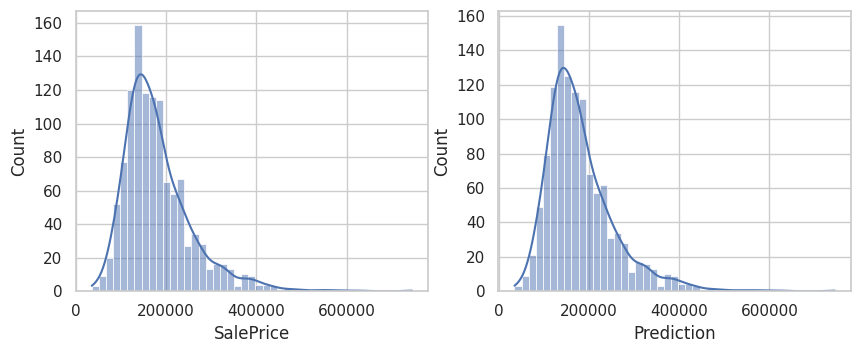

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(data=precision_train_df,x='SalePrice',kde=True)
plt.subplot(2,2,2)
sns.histplot(data=precision_train_df,x='Prediction',kde=True)

In [ ]:
precision_train_df.describe()

Prediction      SalePrice     Difference
count    1145.000000    1145.000000    1145.000000
mean   169720.656250  179592.180786    9871.522939
std     26925.132812   70059.849345   63048.632218
min     67806.765625   62383.000000 -120394.718750
25%    148305.015625  130000.000000  -34264.156250
50%    169996.359375  164000.000000   -3862.828125
75%    185201.203125  214000.000000   40135.828125
max    277361.031250  451950.000000  282959.859375

In [ ]:
###test
a = pd.Series(pred_vector_test,index = y_test.index,name='Prediction')
precision_test_df = pd.concat([a,np.exp(y_test)],axis=1)
precision_test_df['Difference'] = precision_test_df['SalePrice'] - precision_test_df['Prediction']
precision_test_df.head()

Prediction  SalePrice    Difference
892   136573.656250   154500.0  17926.343750
1105  369605.812500   325000.0 -44605.812500
413   121335.539062   115000.0  -6335.539062
522   153855.406250   159000.0   5144.593750
1036  305512.656250   315500.0   9987.343750

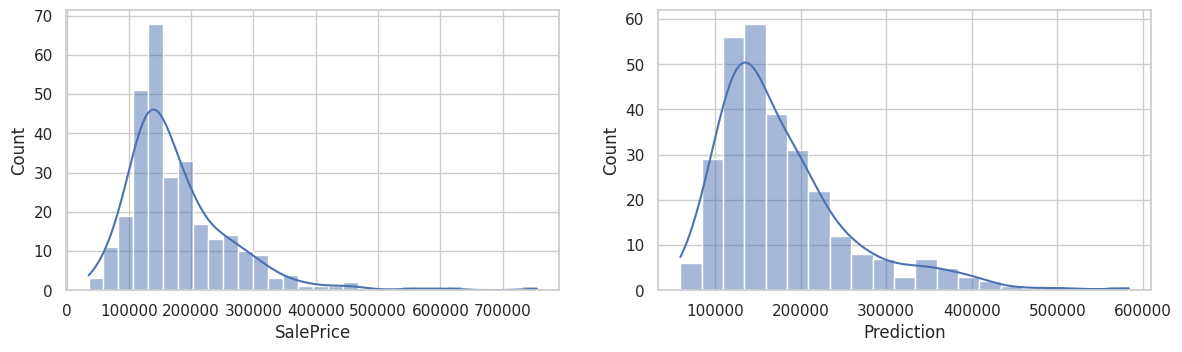

In [ ]:
#test
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.histplot(data=precision_test_df,x='SalePrice',kde=True)
plt.subplot(2,2,2)
sns.histplot(data=precision_test_df,x='Prediction',kde=True);

In [ ]:
precision_test_df.describe()

Prediction      SalePrice     Difference
count     287.000000     287.000000     287.000000
mean   169024.718750  175581.836237    6557.122577
std     26283.238281   66928.169091   69079.846032
min    112367.710938   68400.000000 -145899.953125
25%    146919.289062  131500.000000  -36909.515625
50%    167461.406250  157000.000000   -5117.406250
75%    185146.625000  210000.000000   40680.054688
max    277361.031250  437154.000000  268778.187500

## submissions

In [ ]:
### para enviar
model = StackingRegressor(estimators=[('RF',model1),
                                        ('LGBM',model2),
                                        ('XGB',model3)])
model.fit(X_train,y_train)
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)



[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4021
[LightGBM] [Info] Number of data points in the train set: 1145, number of used features: 98
[LightGBM] [Info] Start training from score 12.029355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [ ]:
print(X_train.shape)
print(test_df[l].shape)

(1145, 113)
(1459, 113)


In [ ]:
z = pd.DataFrame()
z['Id'] = test_df['Id']

In [ ]:
tk = np.exp(model.predict(test_df[l]))
z['SalePrice'] = tk

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


In [ ]:
z

Id      SalePrice
0     1461  192017.404249
1     1462  215330.632962
2     1463  241332.976476
3     1464  230827.718050
4     1465  246296.572759
...    ...            ...
1454  2915  143168.890150
1455  2916  148388.188563
1456  2917  253492.651757
1457  2918  229073.968935
1458  2919  211381.737058

[1459 rows x 2 columns]

In [ ]:
z.to_csv('t9.csv',index=False)